In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns" , None)
%matplotlib inline

In [2]:
df = pd.read_csv("weatherAUS.csv")
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  
0       NaN     16.9     21.8        No      0.0           No  
1       NaN     17.2     24.3        No      0.0           No  
2       2.0     21.0     23.2        No      0.0           No  
3       NaN     18.1     26.5        No      1.0           No  
4       8.0     17.8     29.7        No      0.2           No

In [3]:
#Freedman-Diaconic Choice : Used to calculate binwidth.

def fdchoice(i):
    iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
    fd = (2*iqr)/(df[i].dropna().shape[0]**(1/3))
    return fd

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
print("No. of continous features in the dataset: ",df.select_dtypes(float).shape[1])
print("No. of categorical features in the dataset: ",df.select_dtypes(object).shape[1])

No. of continous features in the dataset:  17
No. of categorical features in the dataset:  7


In [6]:
print("No. of duplicated rows in the data: ",len(df[df.duplicated()]))
print("Data Shape: ",df.shape)                                     

No. of duplicated rows in the data:  0
Data Shape:  (142193, 24)


We have 142193 unique records and 24 different features in our data. 

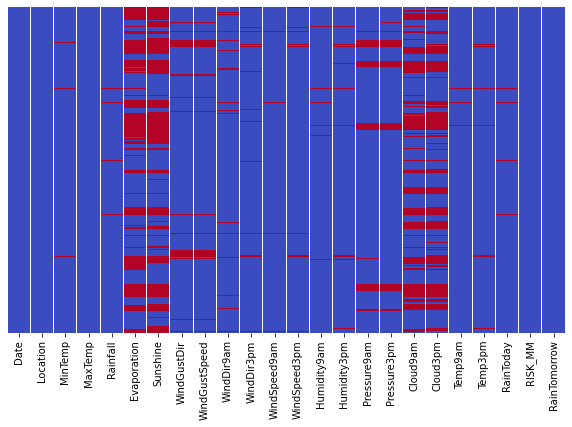

In [7]:
plt.figure(figsize = (10,6))
sns.heatmap(df.isnull(),cmap = "coolwarm", cbar = False,yticklabels = False)
plt.show()

In [8]:
print("Missing Data in percentage:-")
round((df.isnull().sum()/df.shape[0])*100,2)

Missing Data in percentage:-


Date              0.00
Location          0.00
MinTemp           0.45
MaxTemp           0.23
Rainfall          0.99
Evaporation      42.79
Sunshine         47.69
WindGustDir       6.56
WindGustSpeed     6.52
WindDir9am        7.04
WindDir3pm        2.66
WindSpeed9am      0.95
WindSpeed3pm      1.85
Humidity9am       1.25
Humidity3pm       2.54
Pressure9am       9.86
Pressure3pm       9.83
Cloud9am         37.74
Cloud3pm         40.15
Temp9am           0.64
Temp3pm           1.92
RainToday         0.99
RISK_MM           0.00
RainTomorrow      0.00
dtype: float64

As we can see from the heatmap and the table below it, Evaporation, Sunshine, Cloud9am and Cloud3pm has the most percentage of data missing.

**Now let us look at all the features to get a complete idea of our data.**

In [9]:
#Creating columns for "Month" and "Year" using the "Date" feature.

df['Month']=pd.DatetimeIndex(df["Date"]).month
df['Year']=pd.DatetimeIndex(df["Date"]).year

### Date & Location

In [10]:
print("Missing Values:-")
round((df[['Date','Location']].isnull().sum()/df.shape[0])*100,2)

Missing Values:-


Date        0.0
Location    0.0
dtype: float64

No missing values in both the featurs.

In [11]:
print("Years in our data: ",np.sort(df["Year"].unique()))
print("No. of Locations in our data: ",df['Location'].nunique())

Years in our data:  [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
No. of Locations in our data:  49


Therefore, we have data on weather for 49 different locations across Australia starting from 2007 to 2017.

In [12]:
for i in range(2007,2018):
    x=df[df["Year"]==i]
    print("\nYear: %d\n"%i)
    for j in range(1,13):
        print("Month: %2d\t%2d Locations"%(j,x[x['Month']==j]['Location'].nunique()))


Year: 2007

Month:  1	 0 Locations
Month:  2	 0 Locations
Month:  3	 0 Locations
Month:  4	 0 Locations
Month:  5	 0 Locations
Month:  6	 0 Locations
Month:  7	 0 Locations
Month:  8	 0 Locations
Month:  9	 0 Locations
Month: 10	 0 Locations
Month: 11	 1 Locations
Month: 12	 1 Locations

Year: 2008

Month:  1	 1 Locations
Month:  2	 2 Locations
Month:  3	 2 Locations
Month:  4	 2 Locations
Month:  5	 2 Locations
Month:  6	 2 Locations
Month:  7	 8 Locations
Month:  8	 8 Locations
Month:  9	 8 Locations
Month: 10	 8 Locations
Month: 11	 8 Locations
Month: 12	23 Locations

Year: 2009

Month:  1	45 Locations
Month:  2	45 Locations
Month:  3	46 Locations
Month:  4	46 Locations
Month:  5	46 Locations
Month:  6	46 Locations
Month:  7	46 Locations
Month:  8	46 Locations
Month:  9	46 Locations
Month: 10	46 Locations
Month: 11	46 Locations
Month: 12	46 Locations

Year: 2010

Month:  1	46 Locations
Month:  2	46 Locations
Month:  3	46 Locations
Month:  4	46 Locations
Month:  5	46 Locations
Month

Looking at the year wise data we can say that we have the data for November,2007 - June,2017. For the year 2007-2008 data for only few location is available

In [13]:
print("Month wise no. of records:-\n")
for i in range(1,13):
    print("Month %2d:%8d"%(i,df[df["Month"]==i].shape[0]))

Month wise no. of records:-

Month  1:   12921
Month  2:   10525
Month  3:   13036
Month  4:   11306
Month  5:   13055
Month  6:   12389
Month  7:   11779
Month  8:   11762
Month  9:   11345
Month 10:   11804
Month 11:   11461
Month 12:   10810


We have almost equal no. of records for each month.

In [14]:
print("Location wise no. of records:-\n")
for i in df['Location'].unique():
    print("%-16s:%10d"%(i,df[df["Location"]==i].shape[0]))

Location wise no. of records:-

Albury          :      3011
BadgerysCreek   :      2928
Cobar           :      2988
CoffsHarbour    :      2953
Moree           :      2854
Newcastle       :      2955
NorahHead       :      2929
NorfolkIsland   :      2964
Penrith         :      2964
Richmond        :      2951
Sydney          :      3337
SydneyAirport   :      3005
WaggaWagga      :      2976
Williamtown     :      2553
Wollongong      :      2983
Canberra        :      3418
Tuggeranong     :      2998
MountGinini     :      2907
Ballarat        :      3028
Bendigo         :      3034
Sale            :      3000
MelbourneAirport:      3009
Melbourne       :      2435
Mildura         :      3007
Nhil            :      1569
Portland        :      2996
Watsonia        :      2999
Dartmoor        :      2943
Brisbane        :      3161
Cairns          :      2988
GoldCoast       :      2980
Townsville      :      3033
Adelaide        :      3090
MountGambier    :      3030
Nuriootpa       

### MinTemp & MaxTemp

In [15]:
print("Missing Values:-")
round((df[['MinTemp','MaxTemp']].isnull().sum()/df.shape[0])*100,2)

Missing Values:-


MinTemp    0.45
MaxTemp    0.23
dtype: float64

"MinTemp" and "MaxTemp" have very low percentage of its data missing, 0.45% and 0.23% respectively.

In [16]:
df[['MinTemp','MaxTemp']].describe()

MinTemp        MaxTemp
count  141556.000000  141871.000000
mean       12.186400      23.226784
std         6.403283       7.117618
min        -8.500000      -4.800000
25%         7.600000      17.900000
50%        12.000000      22.600000
75%        16.800000      28.200000
max        33.900000      48.100000

In [17]:
df[['MinTemp','MaxTemp']].skew()

MinTemp    0.023900
MaxTemp    0.224917
dtype: float64

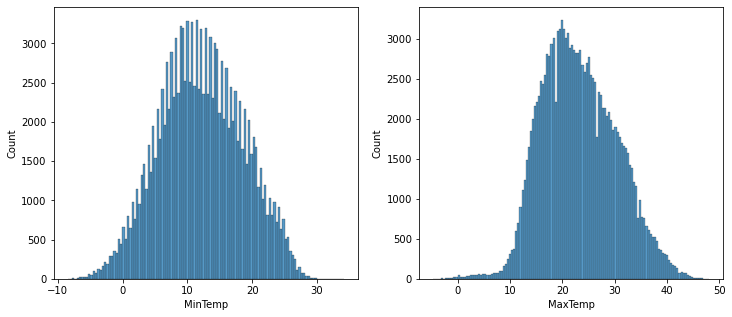

In [18]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['MinTemp'],binwidth=fdchoice("MinTemp"))

plt.subplot(1,2,2)
sns.histplot(df['MaxTemp'],binwidth=fdchoice("MaxTemp"))
plt.show()

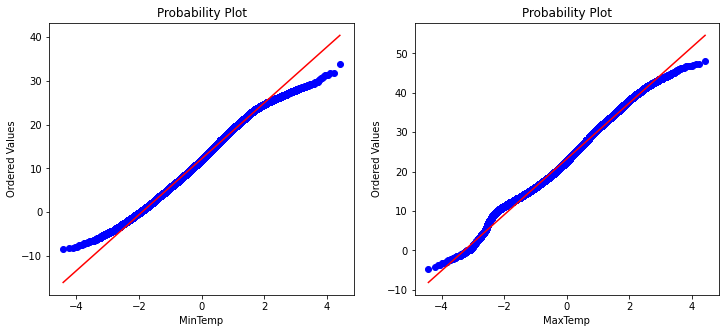

In [19]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
st.probplot(df["MinTemp"].dropna(),dist='norm',plot=plt)
plt.xlabel("MinTemp")

plt.subplot(1,2,2)
st.probplot(df["MaxTemp"].dropna(),dist='norm',plot=plt)
plt.xlabel("MaxTemp")
plt.show()

By looking at the histogram and QQ plot we can say that both the features almost follows a normal distribution.

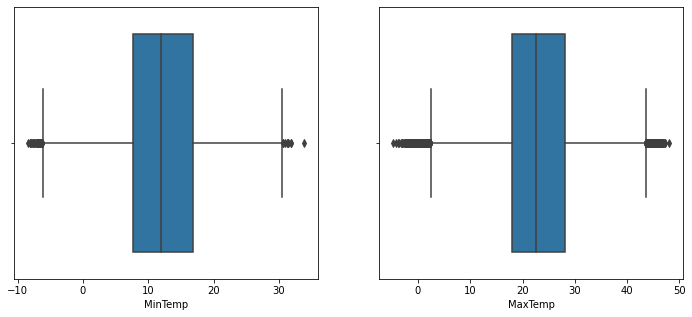

In [20]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.boxplot(df['MinTemp'])

plt.subplot(1,2,2)
sns.boxplot(df['MaxTemp'])
plt.show()

Now, let us look at the distribution of these two features at each month and at each location.

DISTRIBUTION AT EACH MONTH

Month: 1


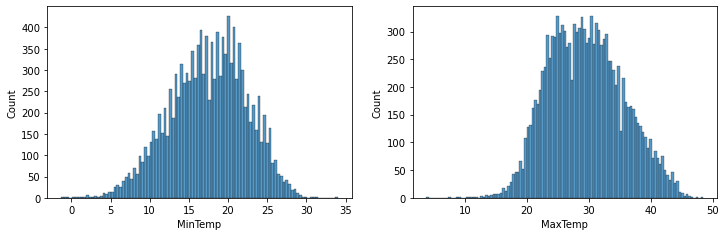

Month: 2


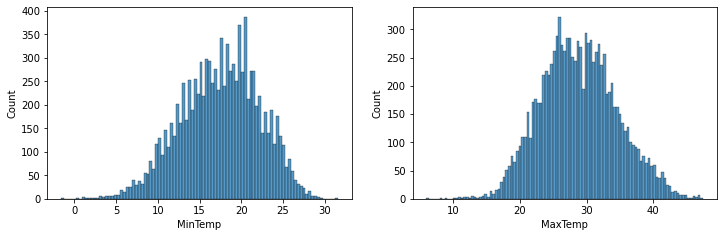

Month: 3


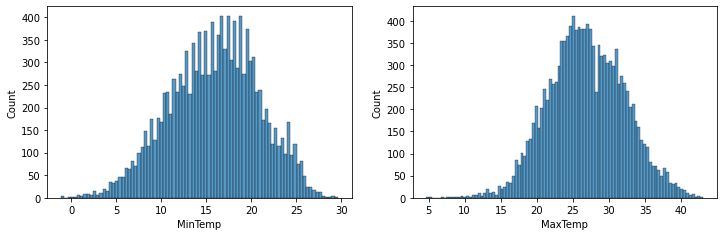

Month: 4


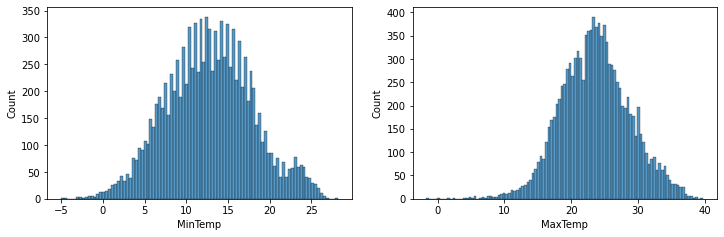

Month: 5


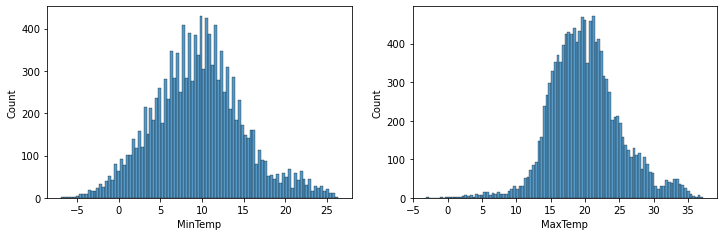

Month: 6


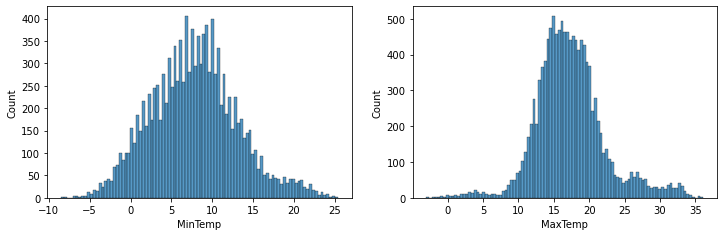

Month: 7


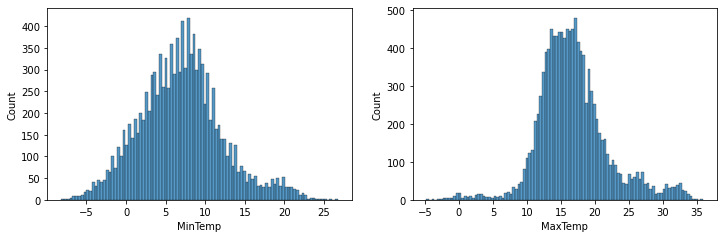

Month: 8


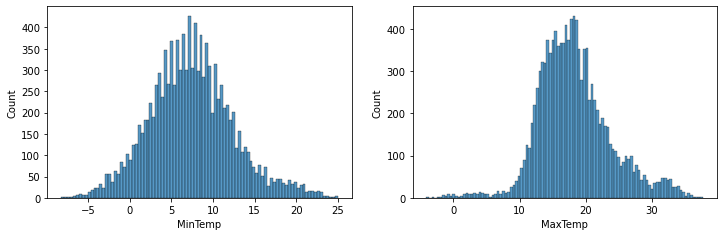

Month: 9


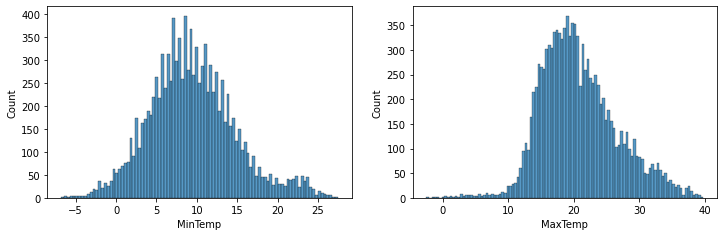

Month: 10


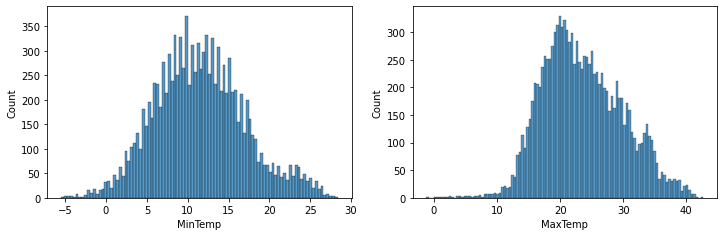

Month: 11


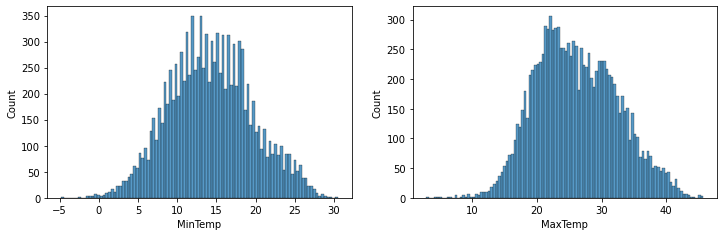

Month: 12


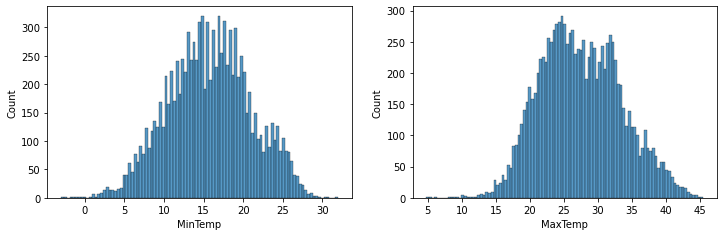

In [21]:
print("DISTRIBUTION AT EACH MONTH\n")
y=0
for i in range(1,13):
    j=i+y
    x = df[df["Month"]==i]
    print("Month: %d"%i)
    plt.figure(figsize=(12,50))
    plt.subplot(12,2,j)
    sns.histplot(x['MinTemp'],binwidth=fdchoice("MinTemp"))
    plt.subplot(12,2,j+1)
    sns.histplot(x['MaxTemp'],binwidth=fdchoice("MaxTemp"))
    y=i
    plt.show()

DISTRIBUTION AT EACH LOCATION

1. Albury


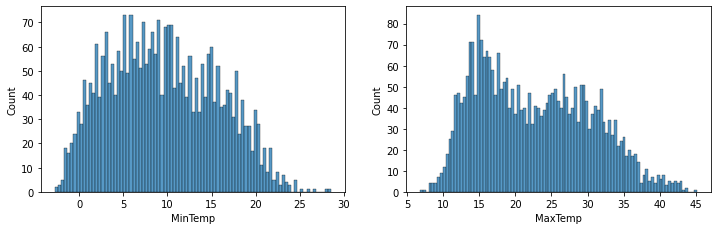

2. BadgerysCreek


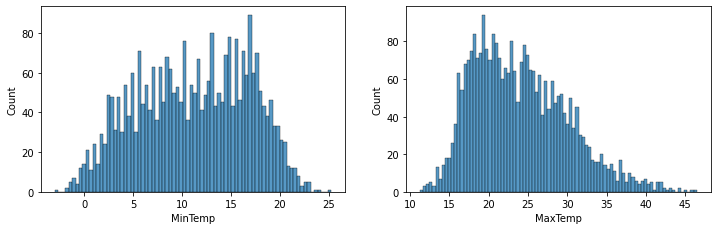

3. Cobar


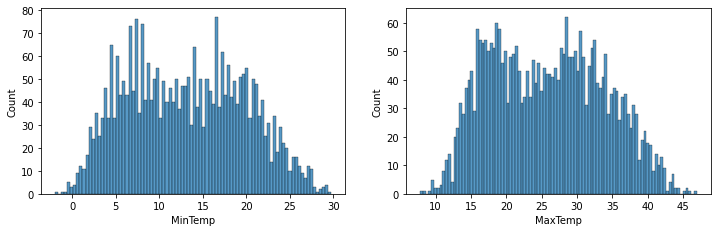

4. CoffsHarbour


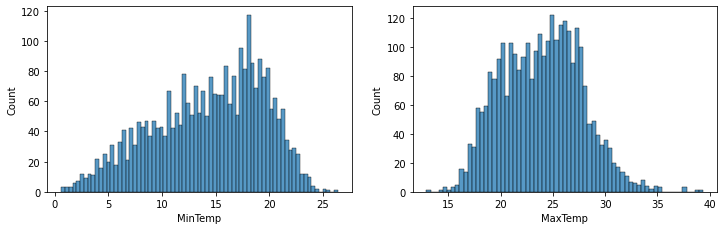

5. Moree


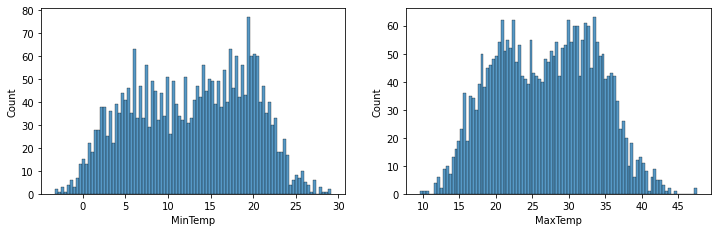

6. Newcastle


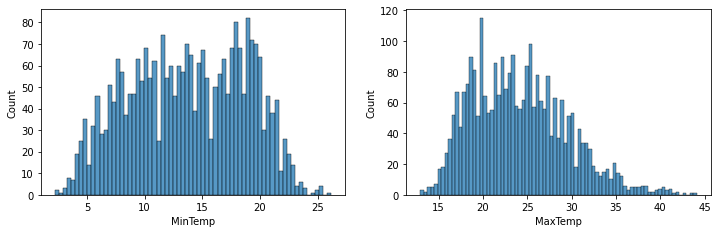

7. NorahHead


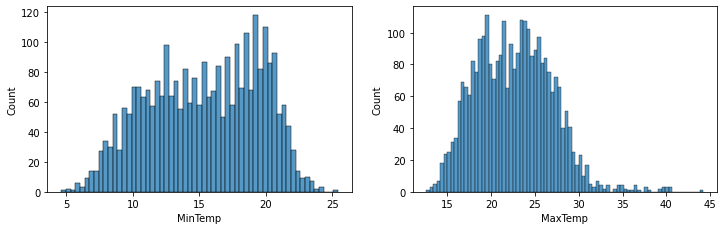

8. NorfolkIsland


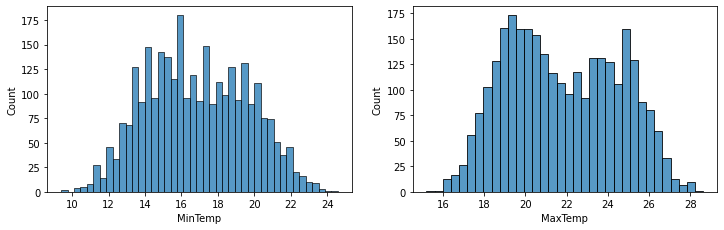

9. Penrith


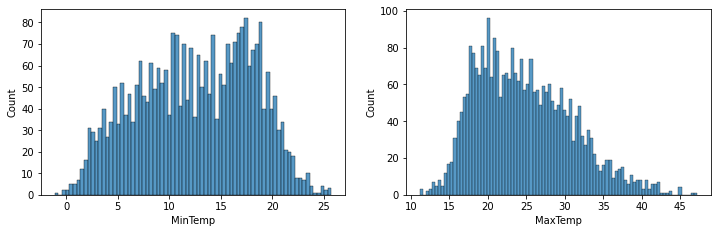

10. Richmond


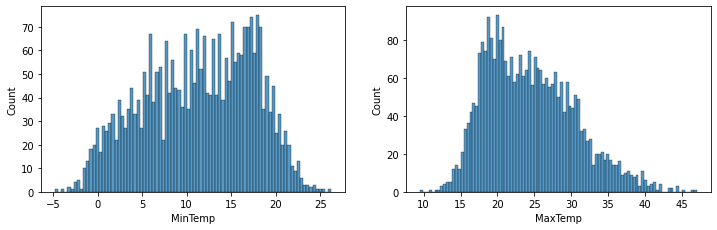

11. Sydney


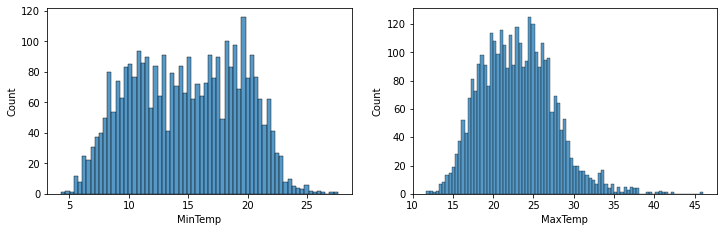

12. SydneyAirport


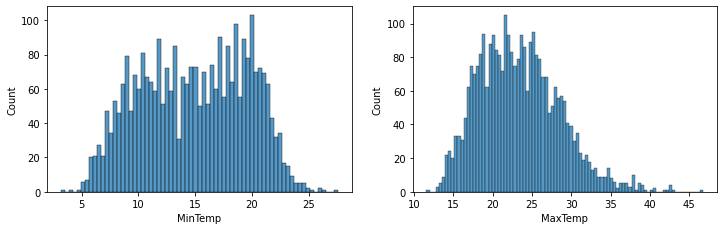

13. WaggaWagga


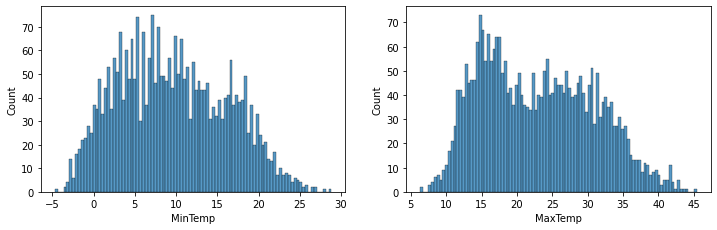

14. Williamtown


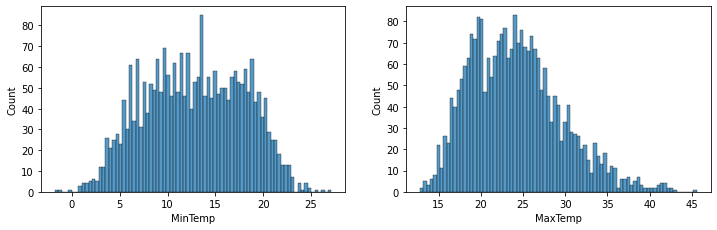

15. Wollongong


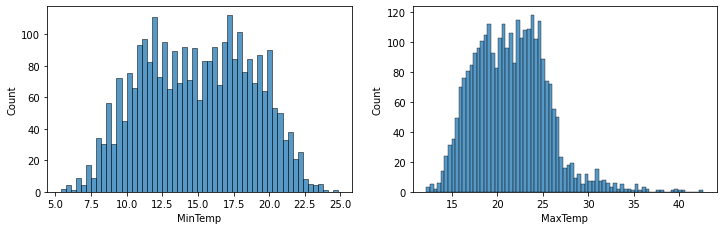

16. Canberra


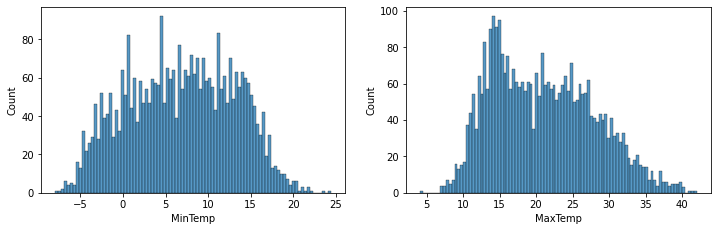

17. Tuggeranong


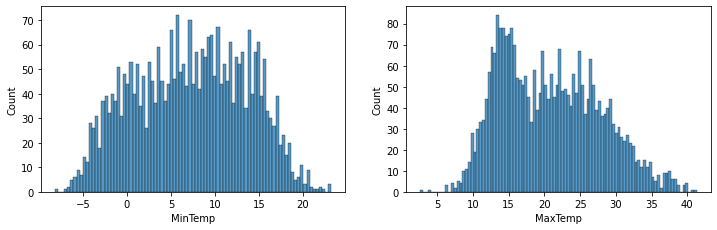

18. MountGinini


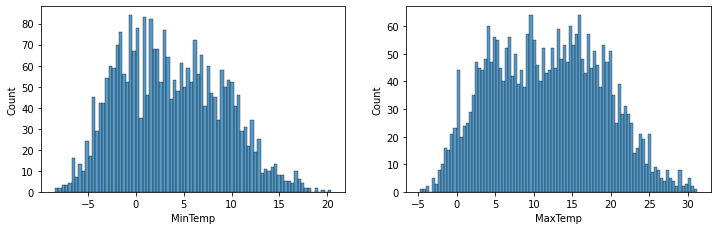

19. Ballarat


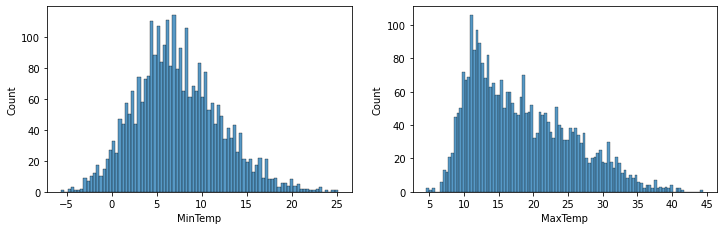

20. Bendigo


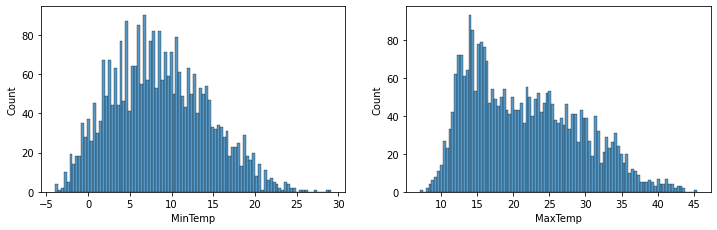

21. Sale


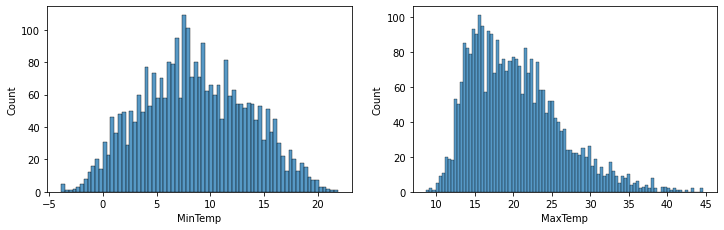

22. MelbourneAirport


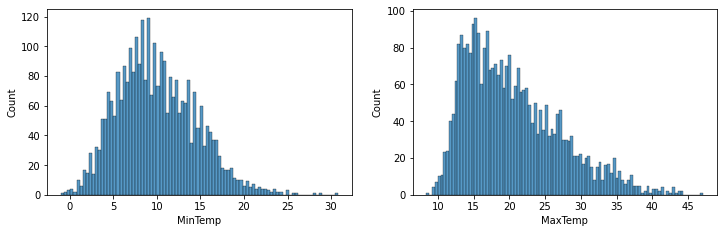

23. Melbourne


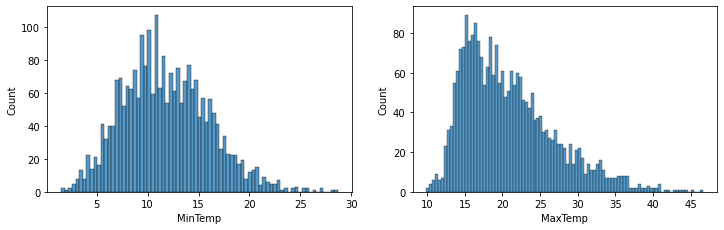

24. Mildura


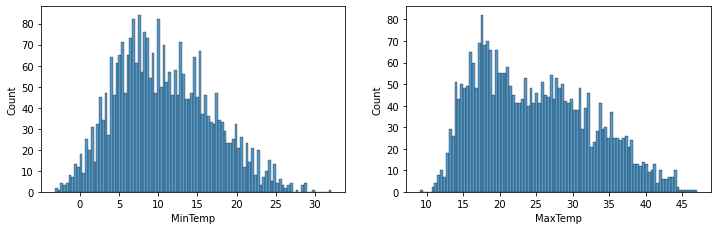

25. Nhil


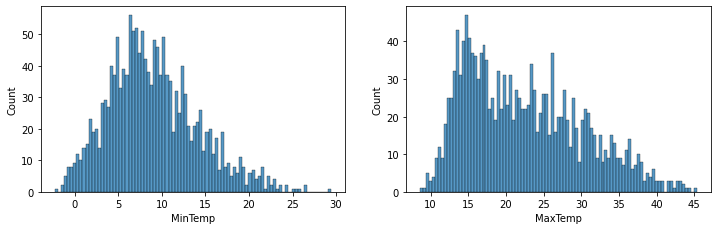

26. Portland


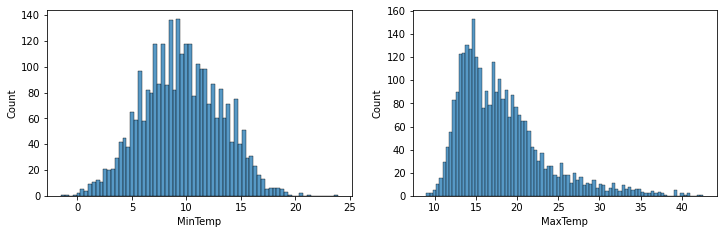

27. Watsonia


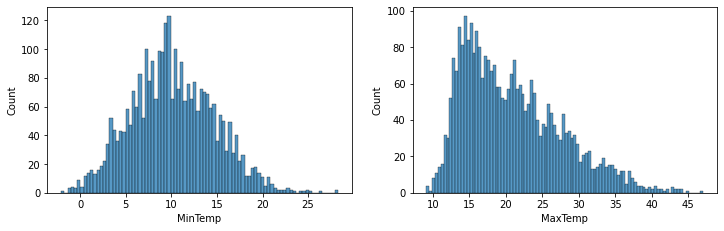

28. Dartmoor


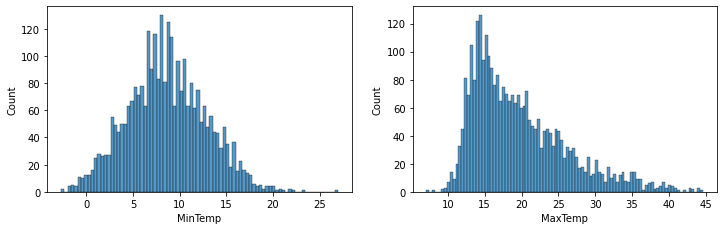

29. Brisbane


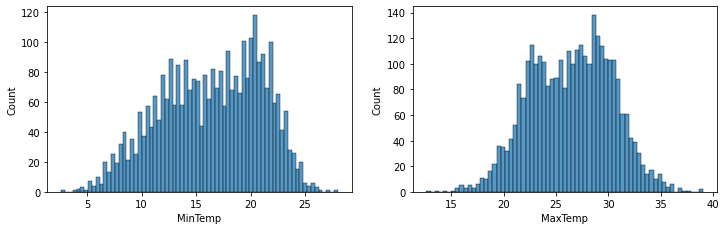

30. Cairns


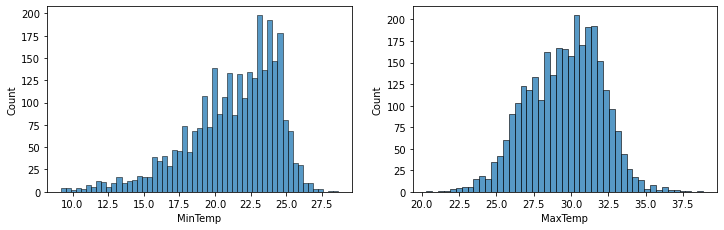

31. GoldCoast


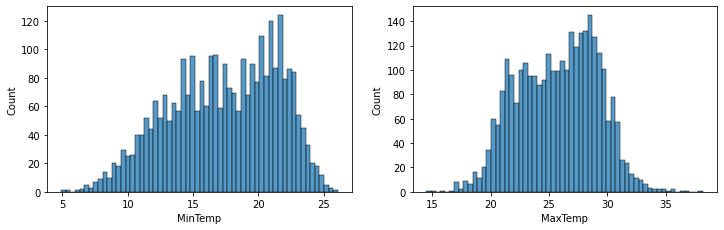

32. Townsville


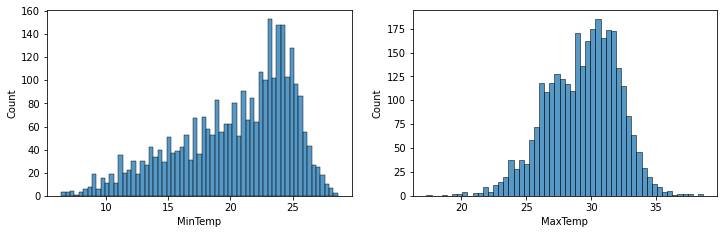

33. Adelaide


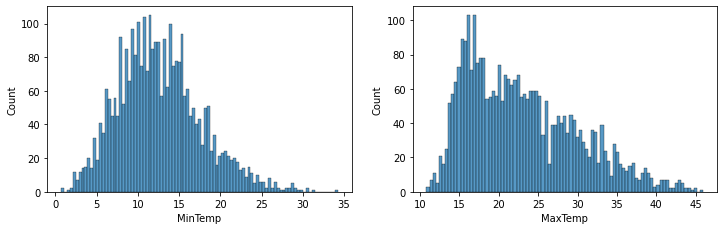

34. MountGambier


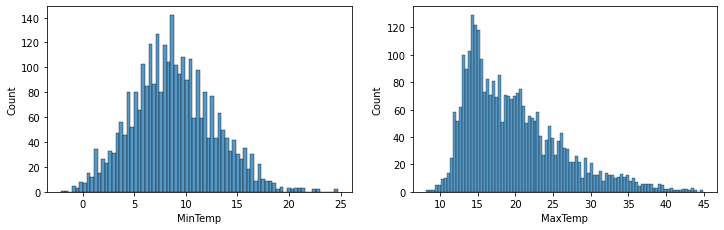

35. Nuriootpa


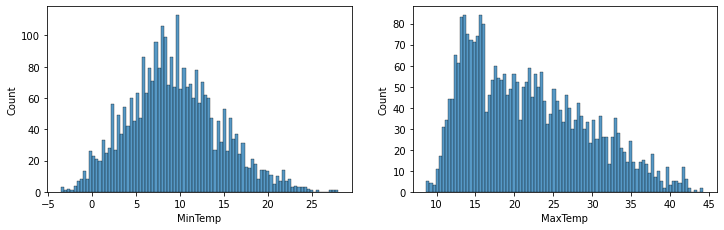

36. Woomera


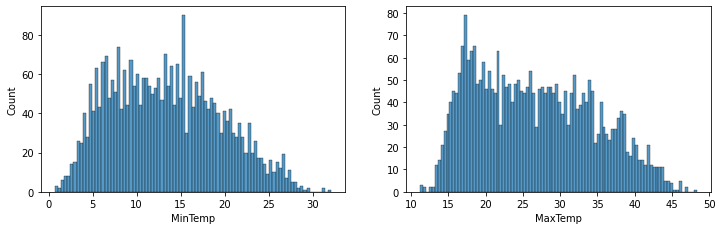

37. Albany


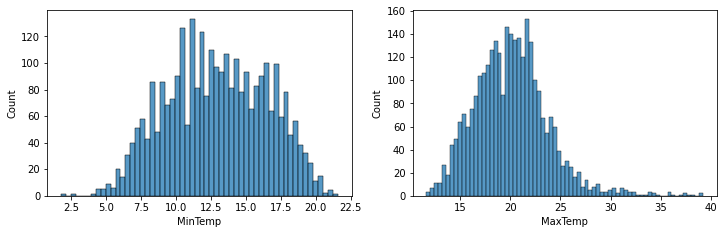

38. Witchcliffe


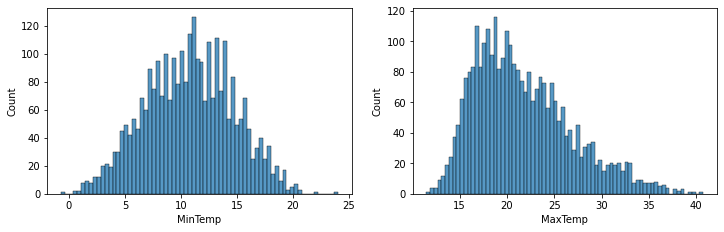

39. PearceRAAF


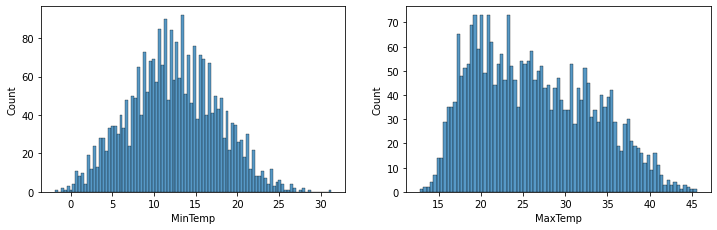

40. PerthAirport


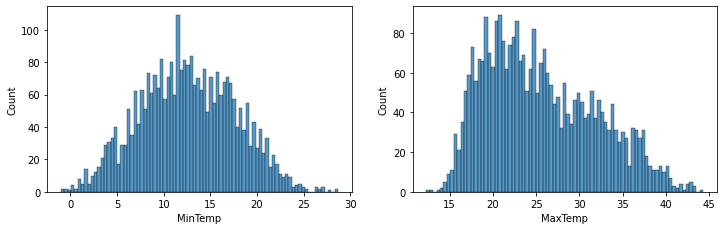

41. Perth


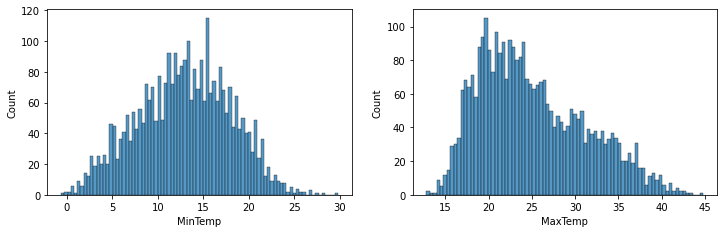

42. SalmonGums


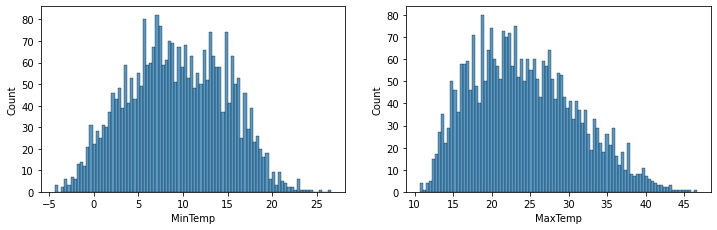

43. Walpole


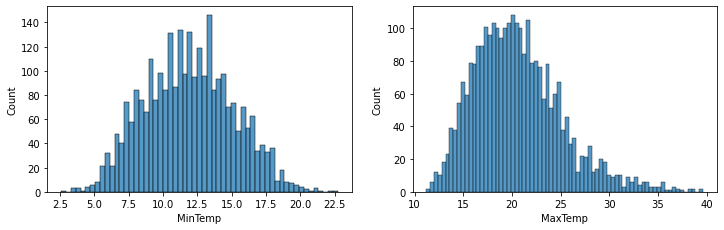

44. Hobart


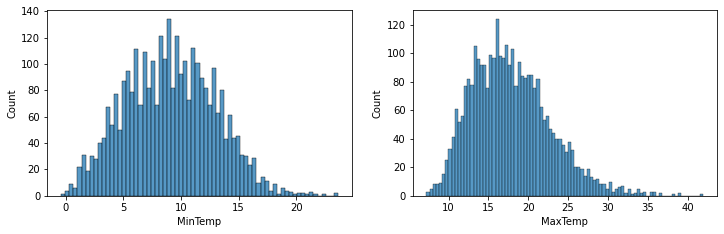

45. Launceston


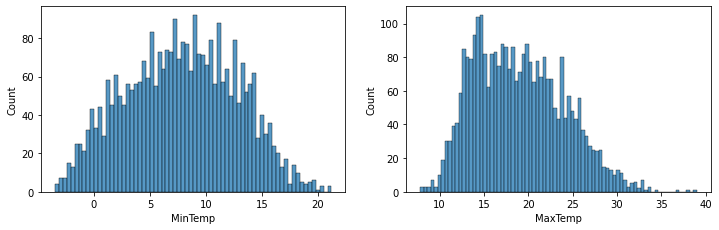

46. AliceSprings


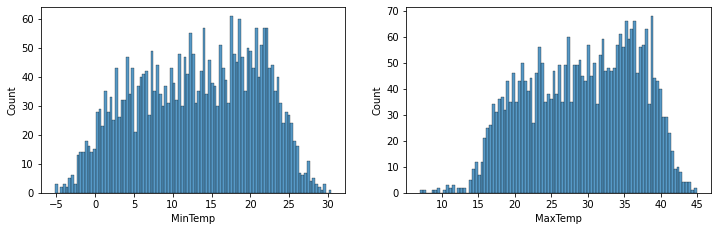

47. Darwin


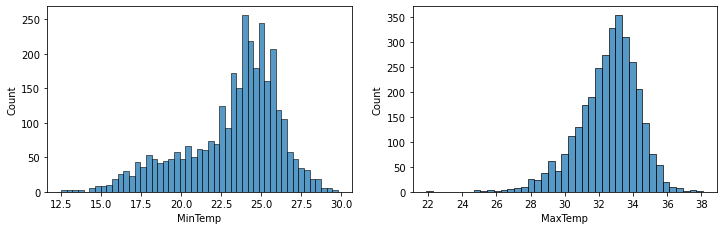

48. Katherine


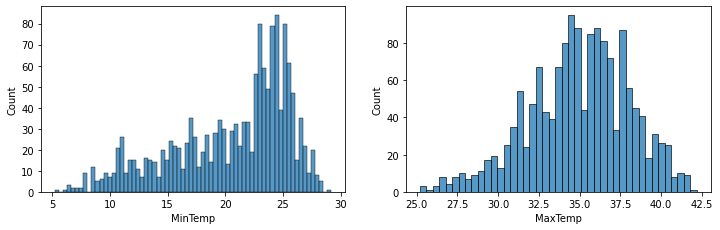

49. Uluru


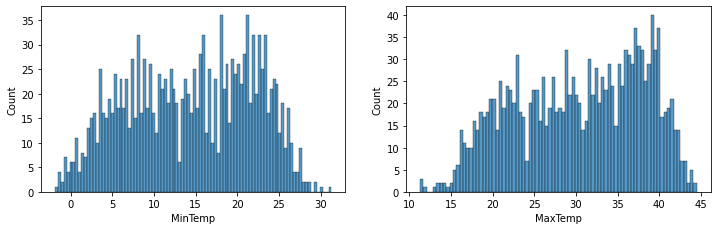

In [22]:
print("DISTRIBUTION AT EACH LOCATION\n")
y=0
z=0
for i in df['Location'].unique():
    y=y+1
    k=y+z
    x=df[df['Location']==i]
    print("%d. %s"%(y,i))
    plt.figure(figsize=(12,200))
    plt.subplot(49,2,k)
    sns.histplot(x['MinTemp'],binwidth=fdchoice("MinTemp"))
    plt.subplot(49,2,k+1)
    sns.histplot(x['MaxTemp'],binwidth=fdchoice("MaxTemp"))
    z=y
    plt.show()

The features show almost similar pattern when plotted against each month but different pattern when plotted against each location.

In [23]:
df.groupby('Month')[['MinTemp','MaxTemp']].describe()

MinTemp                                                    MaxTemp  \
         count       mean       std  min   25%   50%   75%   max    count   
Month                                                                       
1      12855.0  17.520778  4.848748 -1.3  14.2  17.8  21.0  33.9  12890.0   
2      10476.0  17.500239  4.674782 -1.6  14.2  17.8  20.8  31.4  10504.0   
3      12974.0  15.904347  4.917132 -1.1  12.5  16.1  19.4  29.6  13005.0   
4      11248.0  12.831979  5.176496 -5.0   9.2  12.8  16.3  27.9  11271.0   
5      12998.0   9.618572  5.364938 -6.9   6.1   9.6  12.8  26.1  13029.0   
6      12308.0   7.815031  5.289130 -8.5   4.2   7.7  11.0  25.1  12366.0   
7      11737.0   6.951308  5.199473 -8.2   3.5   6.9   9.9  26.6  11754.0   
8      11723.0   7.465145  5.041254 -8.2   4.2   7.3  10.5  24.8  11736.0   
9      11301.0   9.460189  5.344973 -6.8   5.9   9.1  12.6  27.4  11324.0   
10     11745.0  11.531145  5.507025 -5.5   7.7  11.3  15.0  28.2  11763.0   
11     11428.0  14.299624  5.317298 -4.8  10.5  14.2  17.9  30.3  11441.0   
12     10763.0  15.771514  5.229717 -3.0  12.1  15.8  19.3  31.9  10788.0   

                                                         
            mean       std  min   25%   50%   75%   max  
Month                                                    
1      29.547362  6.025999  3.8  25.0  29.2  33.7  48.1  
2      28.877704  5.693200  6.0  24.9  28.7  32.6  47.3  
3      26.886744  5.245831  4.7  23.3  26.8  30.6  43.0  
4      23.611845  5.159313 -1.7  20.1  23.5  26.9  39.7  
5      20.047202  5.040826 -3.1  16.7  19.8  22.8  37.0  
6      17.324778  4.945122 -3.0  14.3  16.9  19.7  36.0  
7      16.764242  5.179098 -4.8  13.6  16.2  19.1  35.5  
8      18.258930  5.473973 -4.1  14.7  17.8  21.0  37.5  
9      20.772510  5.794576 -2.5  16.7  20.0  24.1  39.4  
10     23.540695  6.294675 -1.2  18.9  22.8  27.9  42.6  
11     26.165571  6.295014  3.0  21.5  25.7  30.7  45.5  
12     27.526390  5.967574  4.8  23.1  27.2  31.8  45.1

In [24]:
df.groupby('Location')[['MinTemp','MaxTemp']].describe()

MinTemp                                                  \
                   count       mean       std   min     25%    50%   75%   
Location                                                                   
Adelaide          3088.0  12.628368  4.984603   0.7   9.100  12.10  15.6   
Albany            2957.0  12.948461  3.551401   1.8  10.300  12.90  15.8   
Albury            3005.0   9.520899  6.062028  -2.8   4.700   9.10  14.3   
AliceSprings      3030.0  13.125182  7.749125  -5.2   6.700  13.70  19.7   
BadgerysCreek     2916.0  11.136900  5.626884  -3.0   6.600  11.40  15.9   
Ballarat          3027.0   7.355302  4.716594  -5.6   4.200   7.00  10.3   
Bendigo           3033.0   8.591065  5.699438  -4.0   4.300   8.20  12.5   
Brisbane          3155.0  16.410998  4.610584   2.6  12.800  16.80  20.3   
Cairns            2987.0  21.199197  3.192651   9.2  19.400  21.80  23.7   
Canberra          3413.0   6.827688  6.249856  -8.0   1.800   7.00  11.9   
Cobar             2984.0  13.120342  6.717495  -2.0   7.400  13.00  18.5   
CoffsHarbour      2951.0  14.365774  5.127619   0.6  10.600  15.00  18.4   
Dartmoor          2937.0   8.619816  4.171992  -2.7   5.700   8.50  11.4   
Darwin            3191.0  23.210530  2.968628  12.5  21.600  23.90  25.3   
GoldCoast         2979.0  17.341490  4.113360   4.9  14.200  17.60  20.9   
Hobart            3188.0   9.079141  3.897257  -0.4   6.100   9.00  11.9   
Katherine         1515.0  20.534983  5.107353   5.2  17.000  22.40  24.5   
Launceston        3025.0   7.833818  4.944642  -3.5   4.100   7.90  11.5   
Melbourne         2434.0  11.788127  4.234600   1.5   8.700  11.40  14.6   
MelbourneAirport  3009.0   9.973945  4.481929  -1.0   6.700   9.50  13.0   
Mildura           3007.0  10.733954  6.057295  -3.2   6.200  10.10  15.0   
Moree             2852.0  12.786255  6.822882  -3.3   7.000  13.30  18.6   
MountGambier      3029.0   8.827468  4.002389  -2.1   6.100   8.60  11.4   
MountGinini       2850.0   3.651193  5.358365  -8.5  -0.600   3.10   7.6   
Newcastle         2669.0  13.740240  5.004004   2.2   9.700  13.80  18.0   
Nhil              1569.0   8.992798  5.108704  -2.3   5.400   8.40  12.2   
NorahHead         2919.0  15.375197  4.143838   4.6  12.000  15.60  19.0   
NorfolkIsland     2963.0  16.839960  2.761043   9.4  14.700  16.70  19.0   
Nuriootpa         2991.0   9.366433  5.149120  -3.5   5.800   9.00  12.6   
PearceRAAF        2740.0  12.386314  5.262169  -1.9   8.700  12.30  16.0   
Penrith           2954.0  12.533649  5.521531  -1.1   8.200  12.80  17.2   
Perth             3193.0  12.922706  5.087817  -0.6   9.200  13.10  16.6   
PerthAirport      3009.0  12.580359  5.093569  -1.0   8.900  12.50  16.3   
Portland          2987.0   9.585537  3.588237  -1.5   7.100   9.50  12.1   
Richmond          2939.0  11.346070  6.119001  -4.8   6.500  11.70  16.5   
Sale              2999.0   8.561220  4.911735  -3.9   4.900   8.30  12.2   
SalmonGums        2948.0   9.302578  5.486149  -4.4   5.275   9.20  13.6   
Sydney            3334.0  14.865057  4.553641   4.3  11.000  14.90  18.7   
SydneyAirport     3004.0  14.894041  4.638850   3.2  11.000  15.10  18.9   
Townsville        3031.0  20.411250  4.560145   6.4  17.400  21.50  24.0   
Tuggeranong       2997.0   7.245612  6.349884  -8.2   2.100   7.40  12.4   
Uluru             1518.0  14.406983  7.460797  -1.9   8.100  14.90  20.9   
WaggaWagga        2976.0   9.562030  6.538360  -4.7   4.300   9.10  14.7   
Walpole           2807.0  11.915711  3.211140   2.6   9.500  11.90  14.1   
Watsonia          2993.0  10.126228  4.544291  -2.1   7.000   9.80  13.3   
Williamtown       2552.0  12.820376  5.142979  -1.8   8.800  12.90  17.1   
Witchcliffe       2944.0  10.756861  3.917129  -0.7   7.900  10.80  13.6   
Wollongong        2972.0  14.949058  3.817223   5.4  11.800  15.00  18.0   
Woomera           2986.0  13.313898  6.170035   0.7   8.200  13.05  17.8   

                       MaxTemp                                  

In [25]:
df[["MinTemp","MaxTemp"]].corr()

MinTemp   MaxTemp
MinTemp  1.000000  0.736267
MaxTemp  0.736267  1.000000

"MinTemp" and "MaxTemp" are positively correlated (0.736267).

### Rinfall

In [26]:
print("Missing Values:-")
round((df['Rainfall'].isnull().sum()/df.shape[0])*100,2)

Missing Values:-


0.99

Rainfall has 0.99% of its data missing.

In [27]:
df['Rainfall'].describe()

count    140787.000000
mean          2.349974
std           8.465173
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [28]:
df['Rainfall'].skew()

9.88806106787276

"Rainfall" is highly positively skewed.

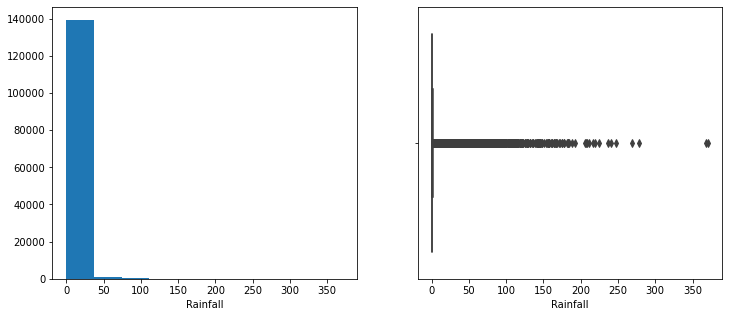

In [29]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.hist(df['Rainfall'])
plt.xlabel("Rainfall")

plt.subplot(1,2,2)
sns.boxplot(df['Rainfall'])
plt.show()

In [30]:
(df['Rainfall'].value_counts()/df.shape[0])*100

0.0      63.487654
0.2       6.107896
0.4       2.637261
0.6       1.801776
0.8       1.426231
           ...    
74.4      0.000703
60.6      0.000703
7.9       0.000703
145.6     0.000703
128.2     0.000703
Name: Rainfall, Length: 679, dtype: float64

Majority of the Rainfall values is around 0.

In [31]:
df.groupby('Month')["Rainfall"].describe()

count      mean        std  min  25%  50%  75%    max
Month                                                         
1      12797.0  2.719036  11.011081  0.0  0.0  0.0  0.2  278.4
2      10411.0  3.174075  12.727706  0.0  0.0  0.0  0.4  367.6
3      12885.0  2.801304  10.260722  0.0  0.0  0.0  0.6  165.2
4      11210.0  2.314764   8.659620  0.0  0.0  0.0  0.6  240.0
5      12931.0  1.978896   6.643206  0.0  0.0  0.0  0.8  182.6
6      12258.0  2.781114   8.677159  0.0  0.0  0.0  1.2  219.6
7      11660.0  2.179314   5.868792  0.0  0.0  0.0  1.4  111.0
8      11648.0  2.029610   5.885960  0.0  0.0  0.0  1.2  192.0
9      11222.0  1.875851   5.437502  0.0  0.0  0.0  0.8   83.8
10     11710.0  1.610734   6.031456  0.0  0.0  0.0  0.4  206.2
11     11352.0  2.273758   8.256584  0.0  0.0  0.0  0.6  371.0
12     10703.0  2.476483   8.632370  0.0  0.0  0.0  0.6  206.8

In [32]:
df.groupby('Location')["Rainfall"].describe()

count      mean        std  min  25%  50%  75%    max
Location                                                                
Adelaide          3020.0  1.572185   4.588956  0.0  0.0  0.0  0.8   75.2
Albany            2996.0  2.255073   5.106656  0.0  0.0  0.0  1.8   49.4
Albury            2991.0  1.925710   6.249052  0.0  0.0  0.0  0.4  104.2
AliceSprings      3025.0  0.869355   4.432703  0.0  0.0  0.0  0.0   62.0
BadgerysCreek     2877.0  2.207925   7.431759  0.0  0.0  0.0  0.4  116.0
Ballarat          3017.0  1.688830   4.675222  0.0  0.0  0.0  1.2   58.6
Bendigo           3030.0  1.621452   5.188193  0.0  0.0  0.0  0.4   66.4
Brisbane          3132.0  3.160536  11.602227  0.0  0.0  0.0  0.6  182.6
Cairns            2964.0  5.765317  18.347196  0.0  0.0  0.0  2.6  278.4
Canberra          3402.0  1.735038   5.709046  0.0  0.0  0.0  0.2   87.0
Cobar             2980.0  1.129262   4.409303  0.0  0.0  0.0  0.0   68.0
CoffsHarbour      2940.0  5.054592  17.446440  0.0  0.0  0.0  2.0  371.0
Dartmoor          2939.0  2.148554   4.984170  0.0  0.0  0.2  1.8   73.6
Darwin            3192.0  5.094048  16.452478  0.0  0.0  0.0  1.8  367.6
GoldCoast         2924.0  3.728933  12.828752  0.0  0.0  0.0  1.2  183.4
Hobart            3183.0  1.604273   4.408170  0.0  0.0  0.0  1.0   71.6
Katherine         1545.0  3.135599  11.312976  0.0  0.0  0.0  0.0  167.0
Launceston        3020.0  2.012219   5.396842  0.0  0.0  0.0  0.8   88.0
Melbourne         2298.0  1.837772   5.188695  0.0  0.0  0.0  1.2   82.2
MelbourneAirport  3009.0  1.451977   4.592725  0.0  0.0  0.0  0.8   75.8
Mildura           3005.0  0.945025   5.054718  0.0  0.0  0.0  0.0  155.0
Moree             2791.0  1.603296   6.514413  0.0  0.0  0.0  0.0  113.0
MountGambier      3022.0  2.087359   5.185557  0.0  0.0  0.2  1.8   84.6
MountGinini       2816.0  3.245241   8.973172  0.0  0.0  0.0  1.8  107.6
Newcastle         2929.0  3.153022  10.862951  0.0  0.0  0.0  1.0  240.0
Nhil              1565.0  0.932907   3.247399  0.0  0.0  0.0  0.2   65.6
NorahHead         2888.0  3.382479   9.401368  0.0  0.0  0.0  1.6  126.4
NorfolkIsland     2944.0  3.137568   9.711373  0.0  0.0  0.2  1.8  156.8
Nuriootpa         2996.0  1.381375   4.383055  0.0  0.0  0.0  0.4   76.6
PearceRAAF        2646.0  1.634354   5.243816  0.0  0.0  0.0  0.0   62.4
Penrith           2911.0  2.135143   7.199444  0.0  0.0  0.0  0.4  115.4
Perth             3193.0  1.906295   5.789950  0.0  0.0  0.0  0.2  114.4
PerthAirport      3009.0  1.761648   5.375192  0.0  0.0  0.0  0.2   76.6
Portland          2984.0  2.531032   5.528353  0.0  0.0  0.2  2.6   72.0
Richmond          2906.0  2.152581   7.381323  0.0  0.0  0.0  0.4  113.4
Sale              2992.0  1.512667   4.465043  0.0  0.0  0.0  0.8   55.6
SalmonGums        2941.0  1.032302   3.670994  0.0  0.0  0.0  0.2   55.4
Sydney            3331.0  3.330231   9.895172  0.0  0.0  0.0  1.4  119.4
SydneyAirport     3001.0  2.995335   9.191482  0.0  0.0  0.0  1.2  106.8
Townsville        3027.0  3.488603  14.999287  0.0  0.0  0.0  0.2  236.8
Tuggeranong       2959.0  2.159040   7.638957  0.0  0.0  0.0  0.2   93.0
Uluru             1502.0  0.707324   4.177148  0.0  0.0  0.0  0.0   83.8
WaggaWagga        2958.0  1.706085   5.921205  0.0  0.0  0.0  0.2  110.8
Walpole           2770.0  2.877329   6.332016  0.0  0.0  0.2  2.2   93.2
Watsonia          2990.0  1.847692   5.423598  0.0  0.0  0.0  1.0   87.4
Williamtown       2376.0  3.510985  11.874383  0.0  0.0  0.0  1.4  225.0
Witchcliffe       2924.0  2.899658   7.351780  0.0  0.0  0.0  2.0   99.4
Wollongong        2943.0  3.589127  11.865796  0.0  0.0  0.0  1.0  192.0
Woomera           2984.0  0.489946   2.735389  0.0  0.0  0.0  0.0   66.4

### Evaporation & Sunshine

In [33]:
print("Missing Values:-")
round((df[['Evaporation','Sunshine']].isnull().sum()/df.shape[0])*100,2)

Missing Values:-


Evaporation    42.79
Sunshine       47.69
dtype: float64

"Evaporation" and "Sunshine" has majority of its data missing. 42.79% and 47.69% respectively.

In [34]:
df[['Evaporation','Sunshine']].describe()

Evaporation      Sunshine
count  81350.000000  74377.000000
mean       5.469824      7.624853
std        4.188537      3.781525
min        0.000000      0.000000
25%        2.600000      4.900000
50%        4.800000      8.500000
75%        7.400000     10.600000
max      145.000000     14.500000

In [35]:
df[['Evaporation','Sunshine']].skew()

Evaporation    3.746834
Sunshine      -0.502911
dtype: float64

"Evaporation" is positively skewed (3.74) and "Sunshine" is negatively skewed (-0.5)

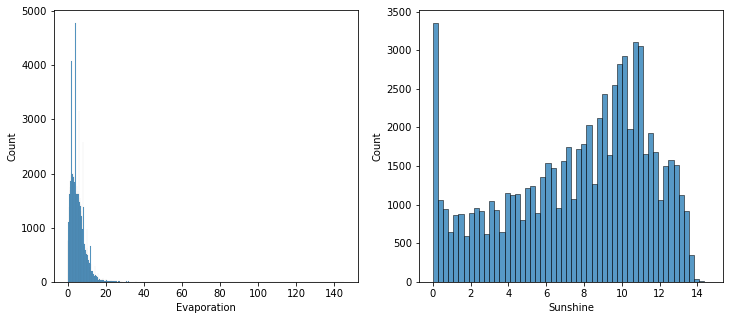

In [36]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['Evaporation'],binwidth=fdchoice("Evaporation"))

plt.subplot(1,2,2)
sns.histplot(df['Sunshine'],binwidth=fdchoice("Sunshine"))
plt.show()

None of the two feature follows a normal distribution.

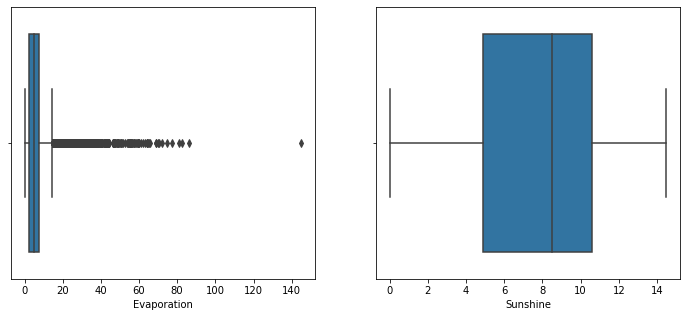

In [37]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.boxplot(df['Evaporation'])

plt.subplot(1,2,2)
sns.boxplot(df['Sunshine'])
plt.show()

In [38]:
df.groupby('Month')[['Evaporation','Sunshine']].describe()

Evaporation                                                 Sunshine  \
            count      mean       std  min  25%  50%   75%    max    count   
Month                                                                        
1          7313.0  8.773171  5.032562  0.0  6.0  8.0  10.6   82.4   6833.0   
2          5990.0  7.651018  4.250110  0.0  5.0  7.0   9.4   72.2   5578.0   
3          7468.0  6.237989  3.652869  0.0  4.0  5.8   7.8   65.4   6960.0   
4          6388.0  4.547511  2.939056  0.0  2.8  4.0   5.8   55.6   5841.0   
5          7296.0  3.244134  2.246294  0.0  1.6  2.8   4.2   28.4   6518.0   
6          6886.0  2.518705  1.970926  0.0  1.2  2.0   3.4   20.6   6272.0   
7          6975.0  2.699269  2.177380  0.0  1.2  2.2   3.6   46.2   6286.0   
8          6835.0  3.616533  2.541204  0.0  2.0  3.0   4.6   55.0   6200.0   
9          6655.0  4.917265  3.248443  0.0  2.8  4.2   6.4   50.8   6014.0   
10         6809.0  6.379571  3.950607  0.0  4.0  5.8   8.0   68.8   6223.0   
11         6616.0  7.465236  4.697677  0.0  4.8  6.8   9.0   86.2   6073.0   
12         6119.0  8.046298  4.949860  0.0  5.2  7.4  10.0  145.0   5579.0   

                                                       
           mean       std  min  25%   50%   75%   max  
Month                                                  
1      9.208942  4.094386  0.0  6.6  10.6  12.7  14.3  
2      8.607494  3.978772  0.0  6.1  10.0  12.0  13.7  
3      7.646279  3.626406  0.0  5.1   8.7  10.8  12.7  
4      7.107208  3.388899  0.0  4.7   8.1  10.1  11.9  
5      6.337496  3.322188  0.0  3.7   7.1   9.3  11.8  
6      5.660379  3.340310  0.0  2.9   6.0   8.7  11.3  
7      6.069790  3.294878  0.0  3.4   6.6   9.0  11.5  
8      7.171661  3.243728  0.0  5.0   7.9  10.0  11.7  
9      7.698770  3.259259  0.0  5.6   8.7  10.5  11.9  
10     8.500080  3.546652  0.0  6.3   9.6  11.4  13.4  
11     8.685394  3.930401  0.0  6.1   9.8  12.0  14.2  
12     8.975372  4.093840  0.0  6.2  10.2  12.5  14.5

In [39]:
df.groupby('Location')[['Evaporation','Sunshine']].describe()

Evaporation                                                   \
                       count       mean       std  min  25%  50%   75%    max   
Location                                                                        
Adelaide              1649.0   5.824924  5.583272  0.0  2.0  4.2   7.2   43.4   
Albany                2736.0   4.207273  2.787815  0.0  2.2  3.8   5.8   33.6   
Albury                   0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
AliceSprings          2820.0   9.029929  5.377389  0.0  4.8  8.2  12.0   50.2   
BadgerysCreek            0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
Ballarat                 0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
Bendigo               1185.0   3.851730  2.848017  0.0  1.4  3.1   5.8   15.4   
Brisbane              3142.0   5.408848  2.604122  0.0  3.4  5.2   7.2   44.0   
Cairns                2647.0   6.211976  2.857981  0.2  4.6  6.0   7.4   44.4   
Canberra              1823.0   4.404717  2.941308  0.0  2.2  3.6   6.0   20.0   
Cobar                 2659.0   6.720797  5.493396  0.0  2.8  5.6   9.6   86.2   
CoffsHarbour          1781.0   3.904267  2.019237  0.0  2.4  3.6   5.2   19.8   
Dartmoor              2535.0   3.353097  2.605609  0.0  1.4  2.6   4.8   16.4   
Darwin                3138.0   6.319089  1.869363  0.2  5.2  6.4   7.6   19.2   
GoldCoast                0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
Hobart                3181.0   3.601226  2.428960  0.0  1.8  3.2   5.2   20.2   
Katherine             1473.0   7.333198  2.712289  0.0  5.8  7.2   8.0   31.0   
Launceston             141.0   6.166667  5.352712  0.0  2.6  5.2   8.0   30.4   
Melbourne             2435.0   4.595893  3.327234  0.0  2.0  4.0   6.4   23.8   
MelbourneAirport      3006.0   4.644378  3.337953  0.0  2.2  4.0   6.4   23.8   
Mildura               2890.0   5.935952  3.990785  0.0  2.6  5.2   8.6   23.2   
Moree                 2236.0   7.629964  6.611992  0.2  3.6  6.4   9.8   65.4   
MountGambier          2630.0   3.437072  2.635021  0.0  1.4  2.8   4.8   16.4   
MountGinini              0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
Newcastle                0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
Nhil                     0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
NorahHead                0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
NorfolkIsland         2756.0   4.738026  2.653150  0.0  3.2  4.4   6.0   74.8   
Nuriootpa             2880.0   5.084132  3.861470  0.0  2.0  4.0   7.6   42.6   
PearceRAAF               0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
Penrith                  0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
Perth                 3192.0   5.606579  3.422893  0.0  2.6  4.8   8.2   17.0   
PerthAirport          3008.0   5.662832  3.459991  0.0  2.6  5.0   8.4   17.0   
Portland              2589.0   3.421514  2.637497  0.0  1.4  2.8   4.8   16.4   
Richmond              1596.0   5.259336  4.728393  0.0  2.0  4.0   6.8   37.2   
Sale                  1834.0   3.830098  2.495244  0.0  2.0  3.4   5.4   18.0   
SalmonGums               0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
Sydney                3286.0   5.187432  2.777407  0.0  3.2  4.8   7.0   18.4   
SydneyAirport         2959.0   5.252450  2.802304  0.0  3.2  4.8   7.2   18.4   
Townsville            2944.0   7.197113  2.533200  0.4  5.4  7.0   9.0   30.2   
Tuggeranong              0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
Uluru                    0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
WaggaWagga            2853.0   5.159061  4.197419  0.0  1.8  4.0   8.0   39.4   
Walpole                  0.0        NaN       NaN  NaN  NaN  NaN   NaN    NaN   
Watsonia              2996.0   4.640788  3.336598  0.0  2.2  4.0   6.4   23.8   
Williamtown           1786.0   6.957167  7.230606  0.0  3.2  5.2   7.8  145.0   
Witchcliffe              0.0        NaN       Na

There are 16 locations for which we do not have any data on "Evaporation" and 19 locations for which there is no data on "Sunshine".

### WindGustSpeed, WindSpeed9am & WindSpeed3pm

In [40]:
print("Missing Values:-")
round((df[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']].isnull().sum()/df.shape[0])*100,2)

Missing Values:-


WindGustSpeed    6.52
WindSpeed9am     0.95
WindSpeed3pm     1.85
dtype: float64

"WindGustSpeed", "WindSpeed9am" and "WindSpeed3pm" has 6.52%, 0.95% and 1.85% of its data missing respectively.

In [41]:
df[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']].describe()

WindGustSpeed   WindSpeed9am   WindSpeed3pm
count  132923.000000  140845.000000  139563.000000
mean       39.984292      14.001988      18.637576
std        13.588801       8.893337       8.803345
min         6.000000       0.000000       0.000000
25%        31.000000       7.000000      13.000000
50%        39.000000      13.000000      19.000000
75%        48.000000      19.000000      24.000000
max       135.000000     130.000000      87.000000

In [42]:
df[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']].skew()

WindGustSpeed    0.874305
WindSpeed9am     0.775494
WindSpeed3pm     0.631433
dtype: float64

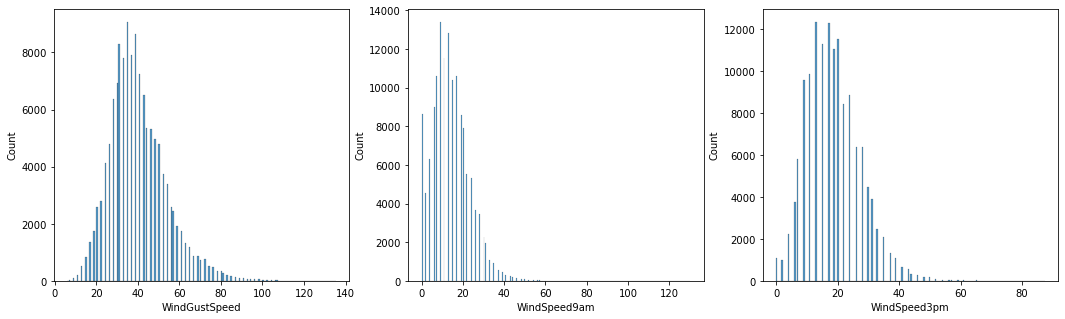

In [43]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(df["WindGustSpeed"],binwidth=fdchoice("WindGustSpeed"))

plt.subplot(1,3,2)
sns.histplot(df["WindSpeed9am"],binwidth=fdchoice("WindSpeed9am"))

plt.subplot(1,3,3)
sns.histplot(df["WindSpeed3pm"],binwidth=fdchoice("WindSpeed3pm"))

plt.show()

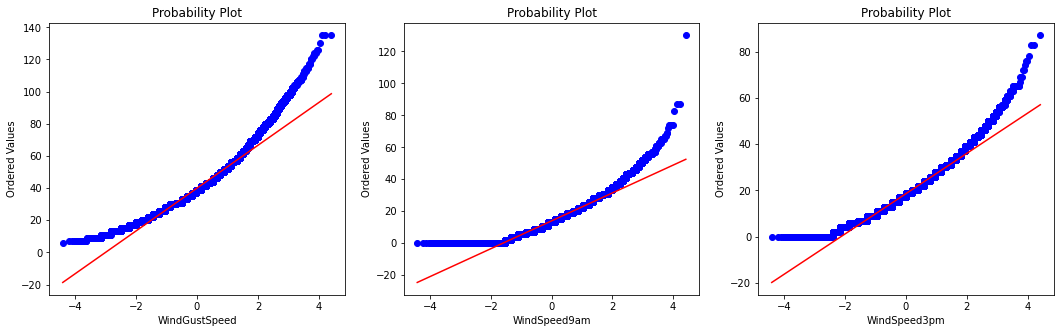

In [44]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)
st.probplot(df["WindGustSpeed"].dropna(),dist='norm',plot=plt)
plt.xlabel("WindGustSpeed")

plt.subplot(1,3,2)
st.probplot(df["WindSpeed9am"].dropna(),dist='norm',plot=plt)
plt.xlabel("WindSpeed9am")

plt.subplot(1,3,3)
st.probplot(df["WindSpeed3pm"].dropna(),dist='norm',plot=plt)
plt.xlabel("WindSpeed3pm")
plt.show()

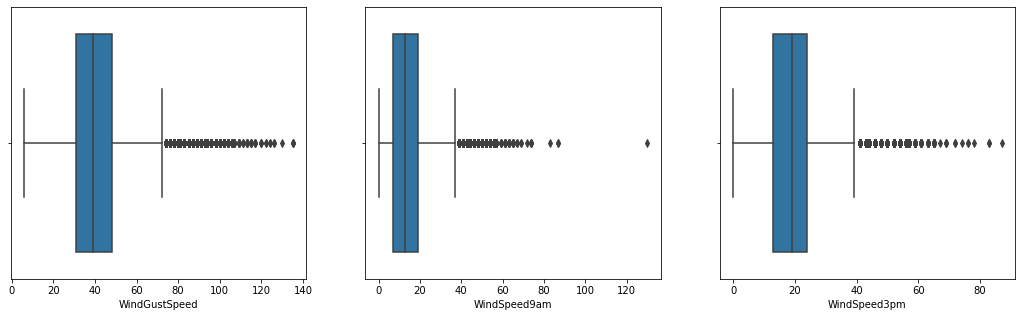

In [45]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(df["WindGustSpeed"])

plt.subplot(1,3,2)
sns.boxplot(df["WindSpeed9am"])

plt.subplot(1,3,3)
sns.boxplot(df["WindSpeed3pm"])
plt.show()

DISTRIBUTION AT EACH MONTH

Month: 1


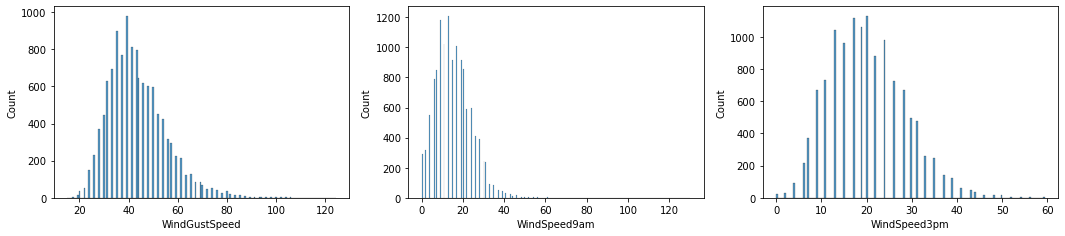

Month: 2


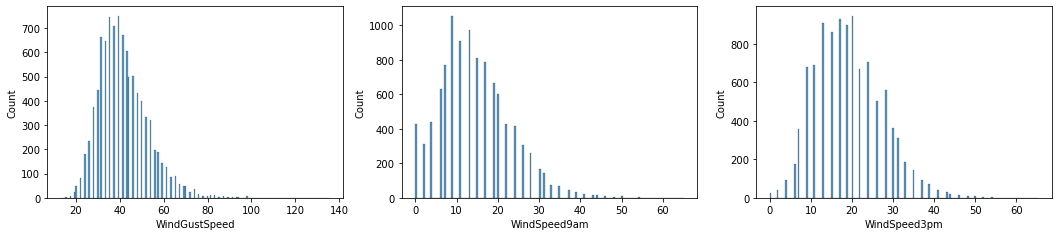

Month: 3


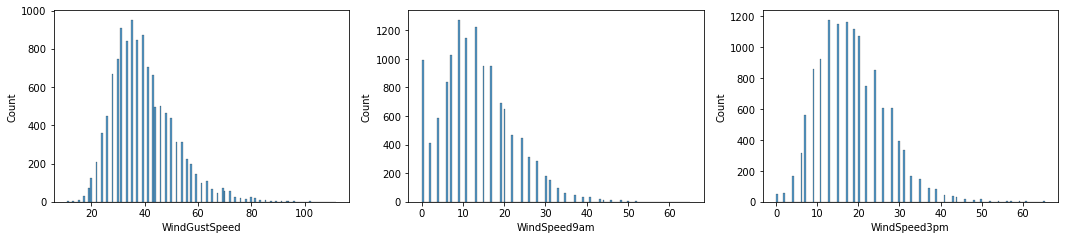

Month: 4


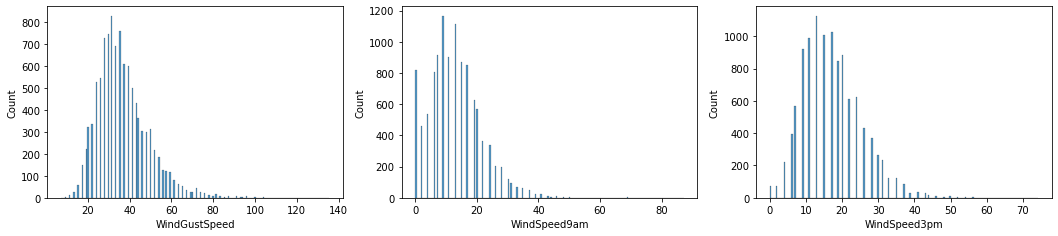

Month: 5


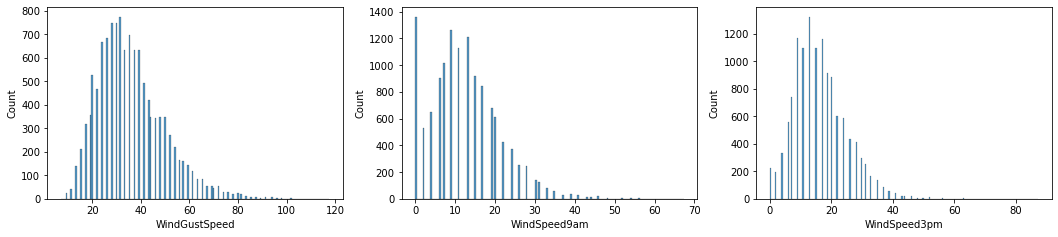

Month: 6


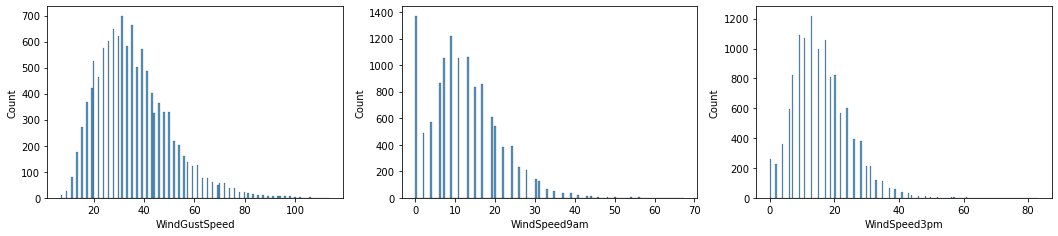

Month: 7


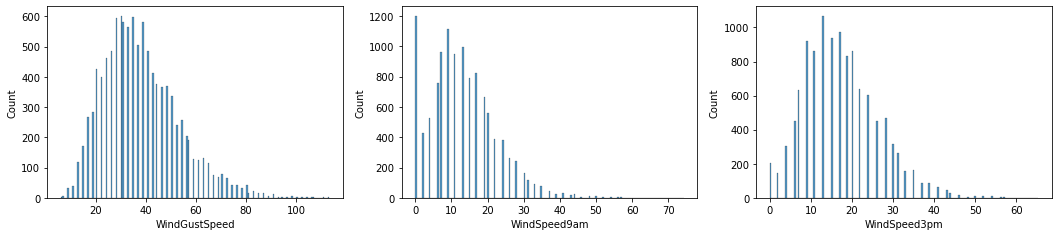

Month: 8


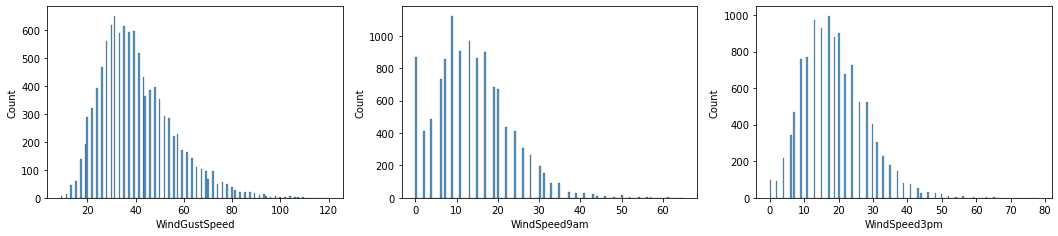

Month: 9


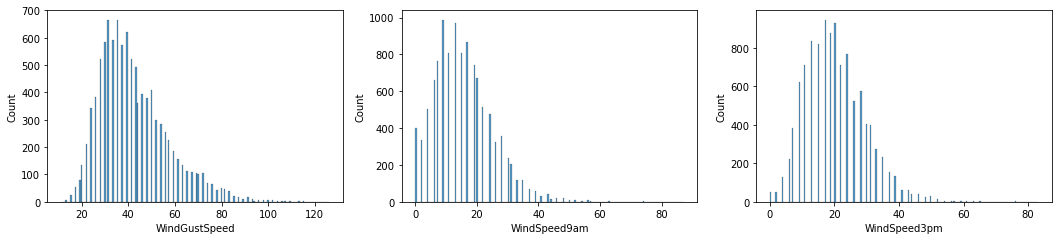

Month: 10


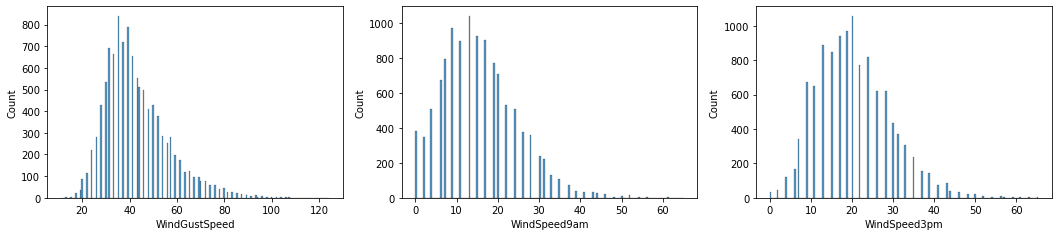

Month: 11


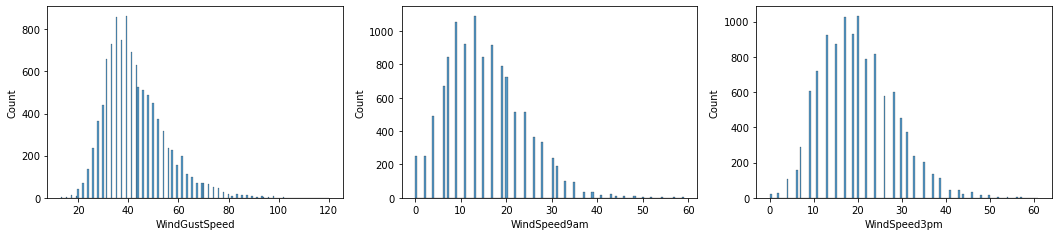

Month: 12


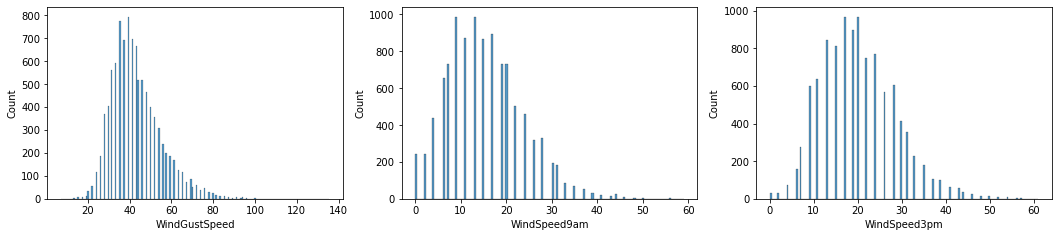

In [46]:
print("DISTRIBUTION AT EACH MONTH\n")
y=0
for i in range(1,13):
    j=i+y
    x = df[df["Month"]==i]
    print("Month: %d"%i)
    plt.figure(figsize=(18,50))
    plt.subplot(12,3,j)
    sns.histplot(x['WindGustSpeed'],binwidth=fdchoice("WindGustSpeed"))
    plt.subplot(12,3,j+1)
    sns.histplot(x['WindSpeed9am'],binwidth=fdchoice("WindSpeed9am"))
    plt.subplot(12,3,j+2)
    sns.histplot(x['WindSpeed3pm'],binwidth=fdchoice("WindSpeed3pm"))
    y=i+i
    plt.show()

DISTRIBUTION AT EACH LOCATION

Albury


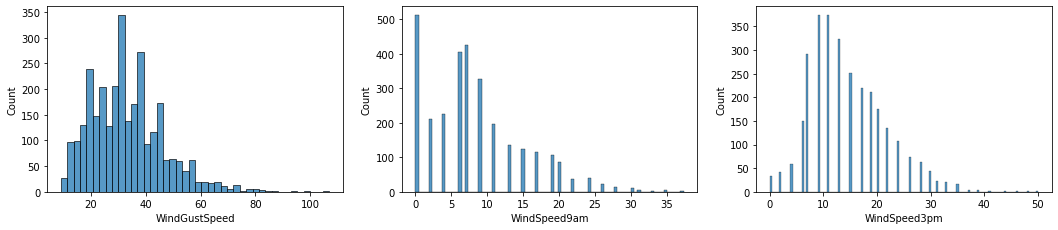

BadgerysCreek


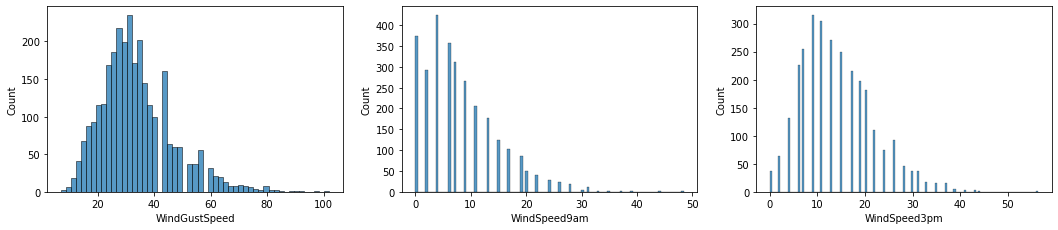

Cobar


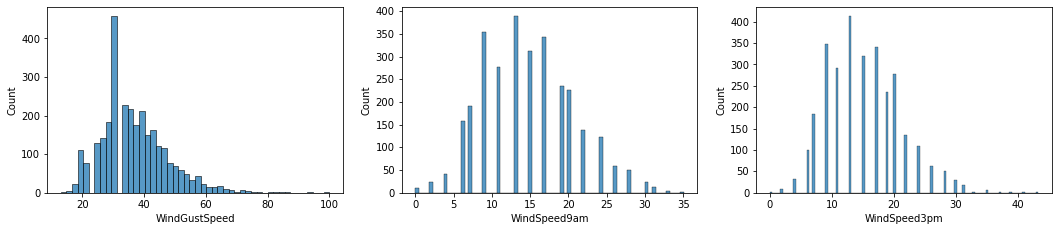

CoffsHarbour


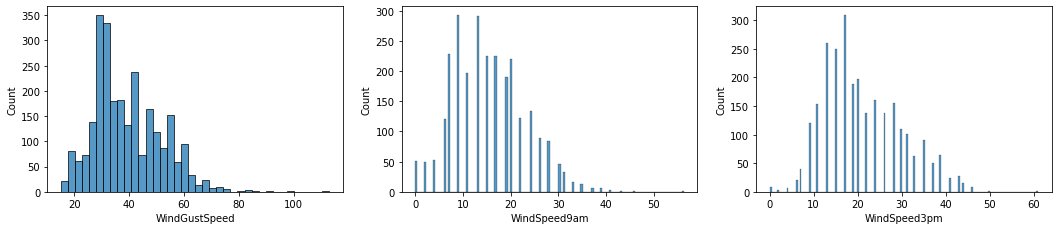

Moree


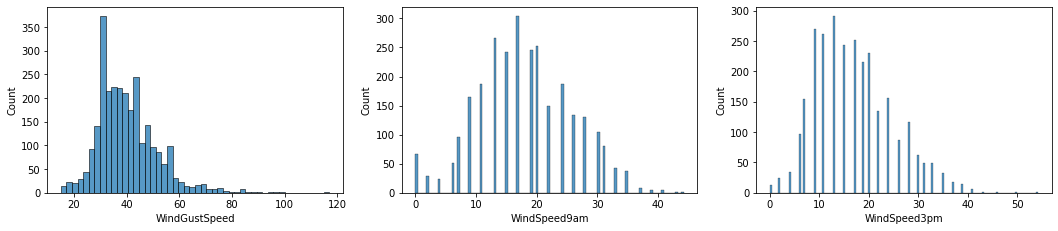

Newcastle


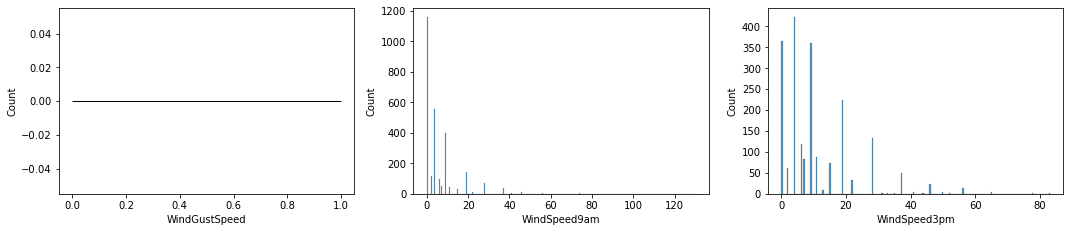

NorahHead


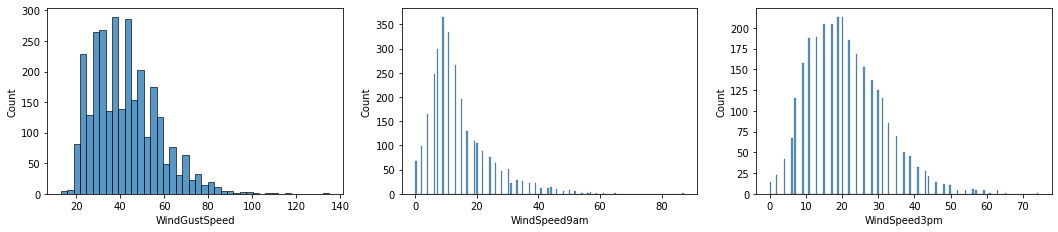

NorfolkIsland


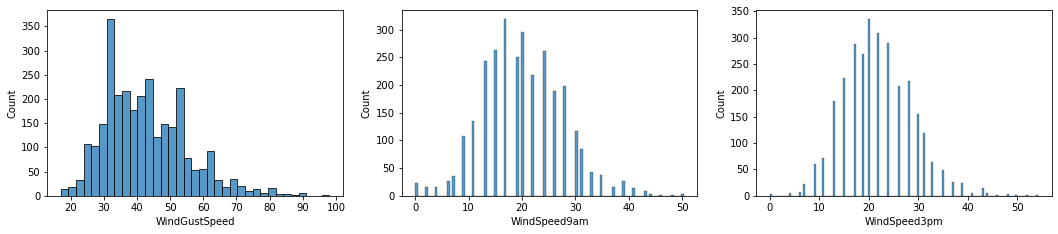

Penrith


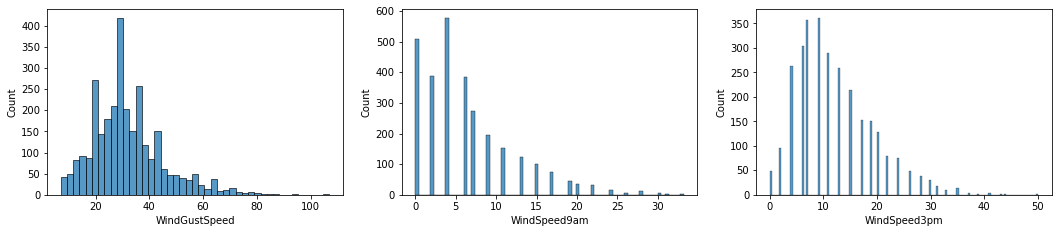

Richmond


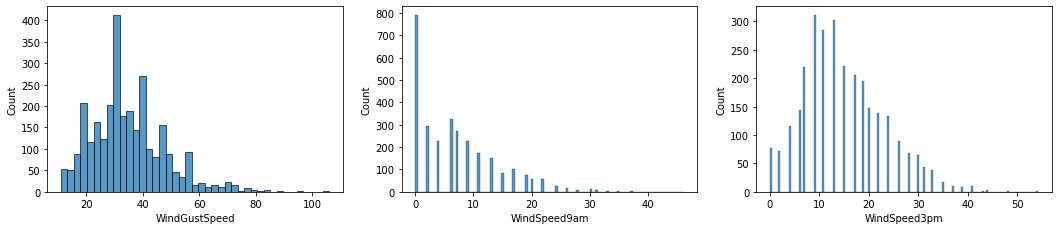

Sydney


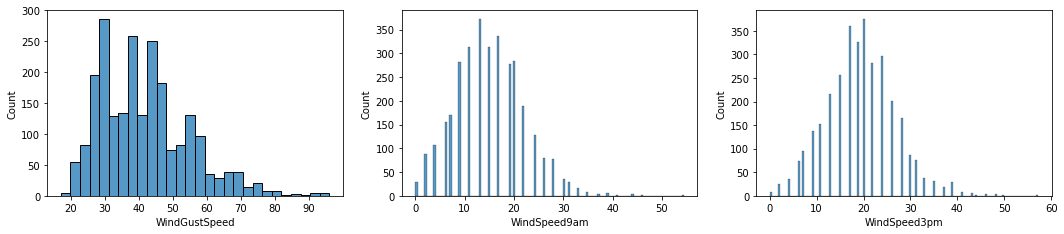

SydneyAirport


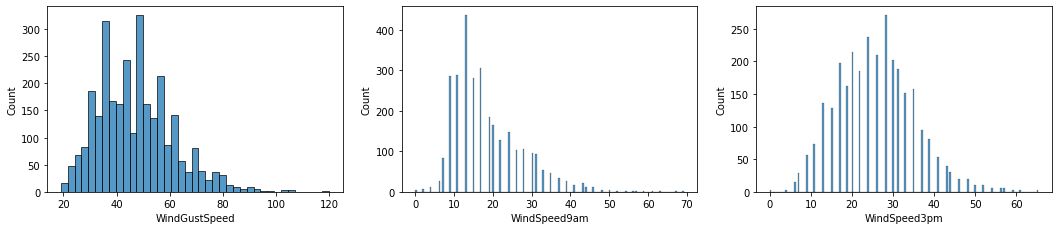

WaggaWagga


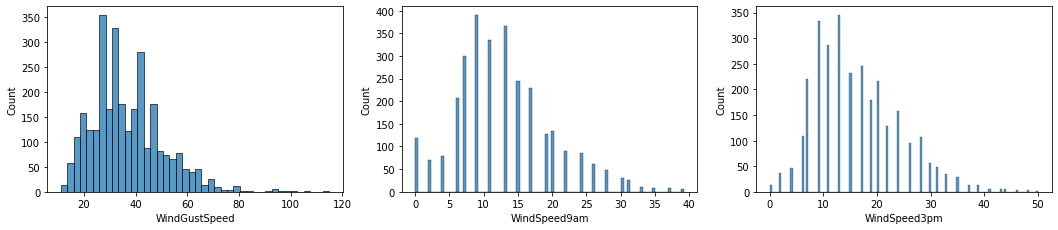

Williamtown


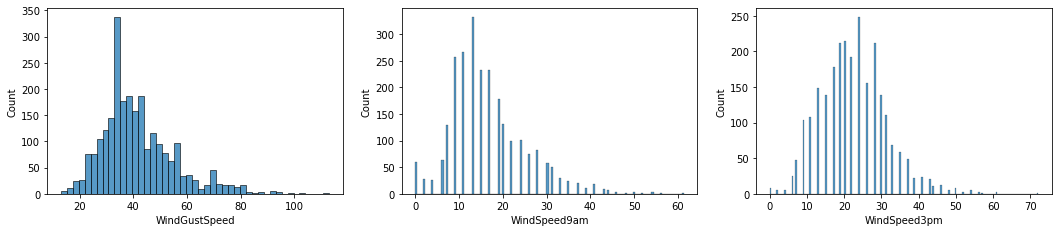

Wollongong


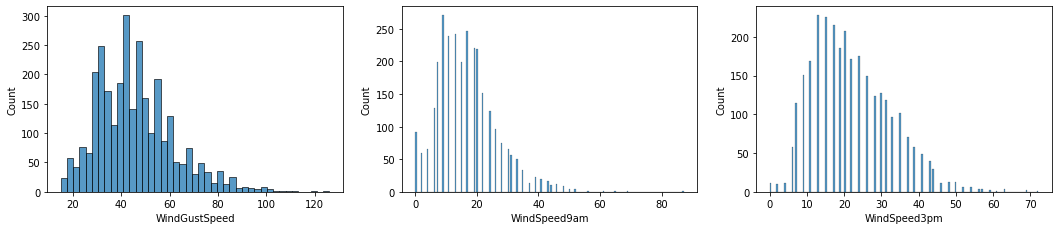

Canberra


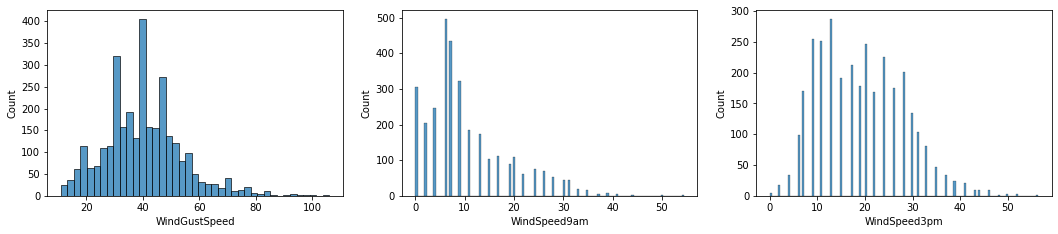

Tuggeranong


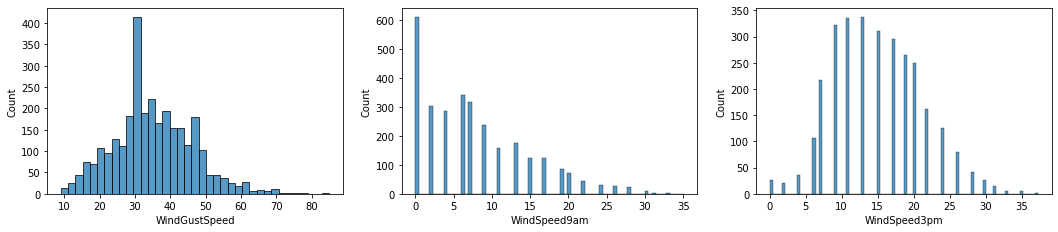

MountGinini


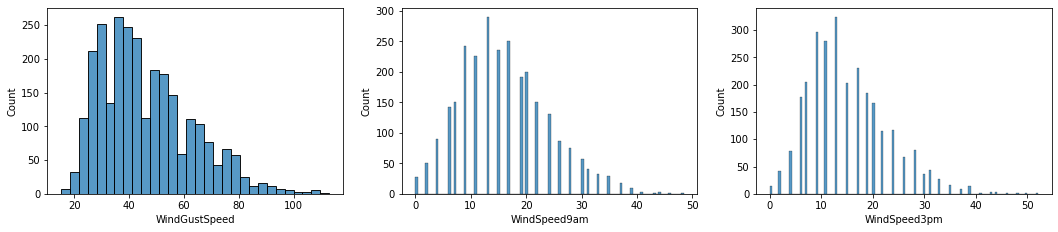

Ballarat


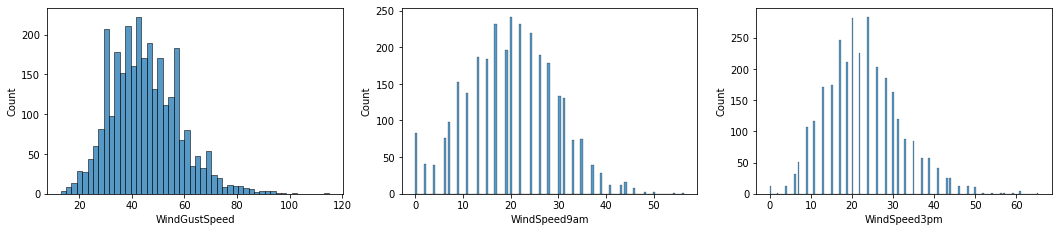

Bendigo


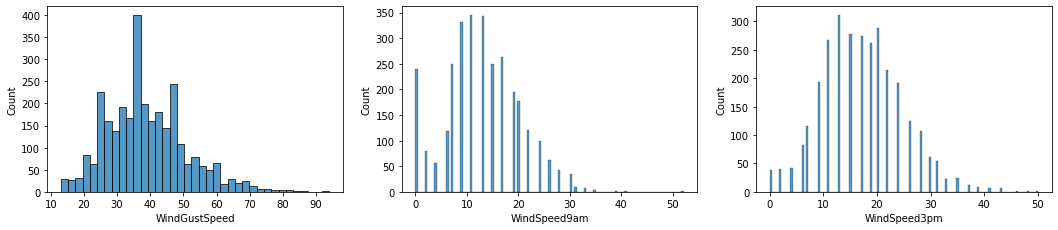

Sale


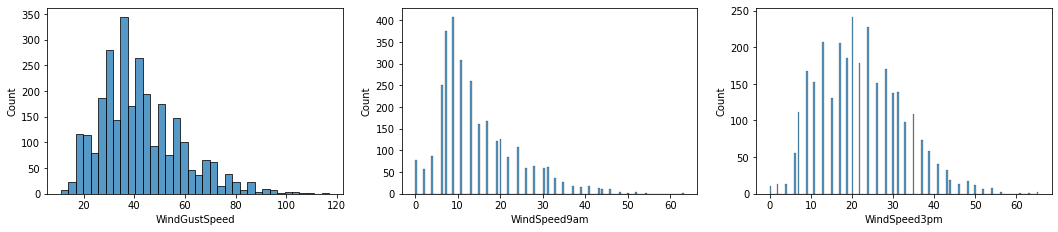

MelbourneAirport


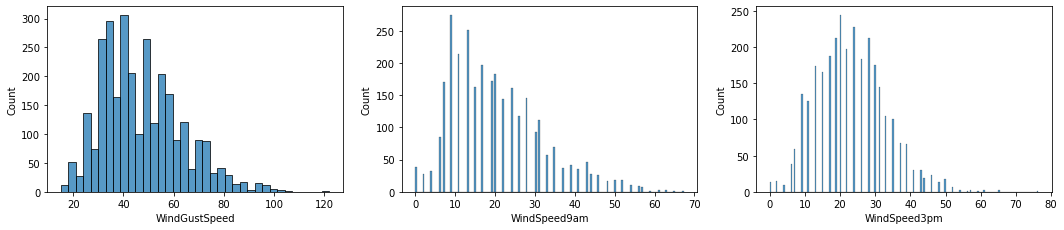

Melbourne


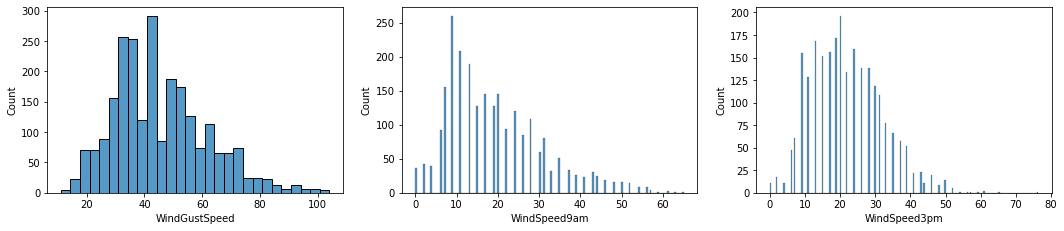

Mildura


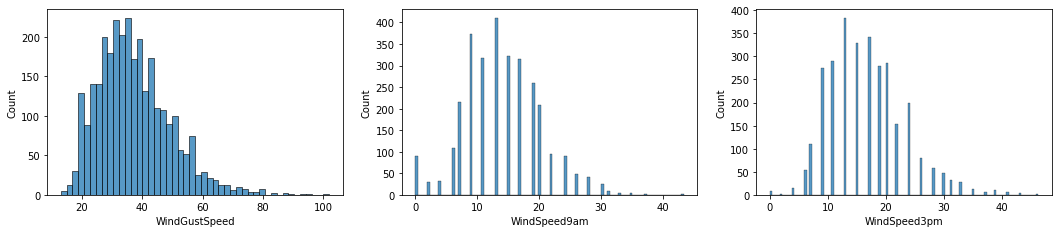

Nhil


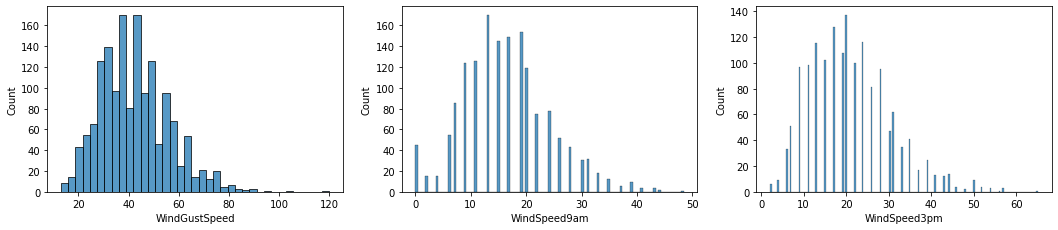

Portland


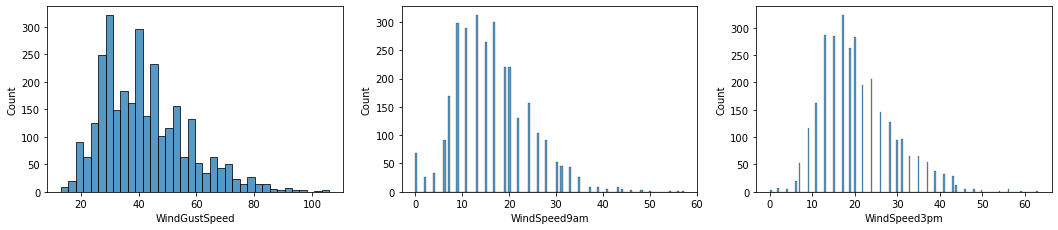

Watsonia


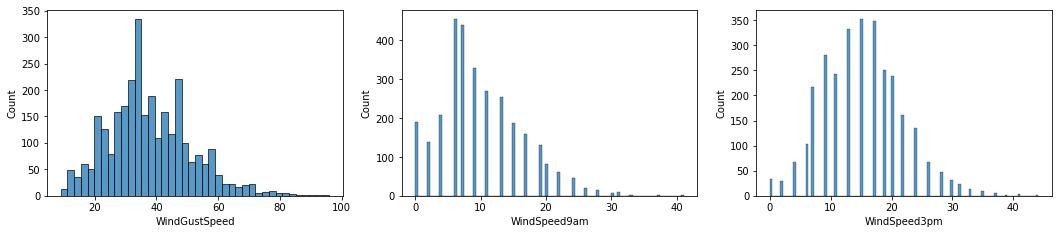

Dartmoor


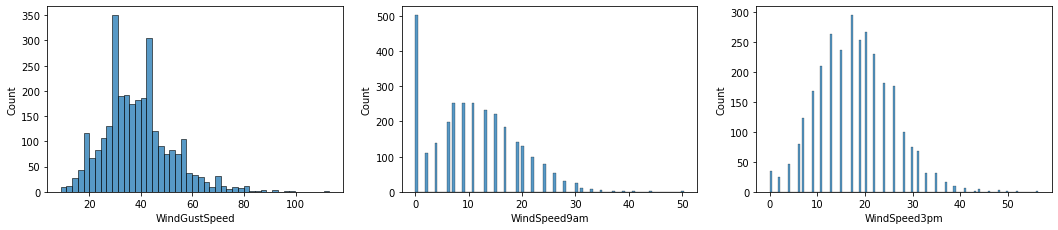

Brisbane


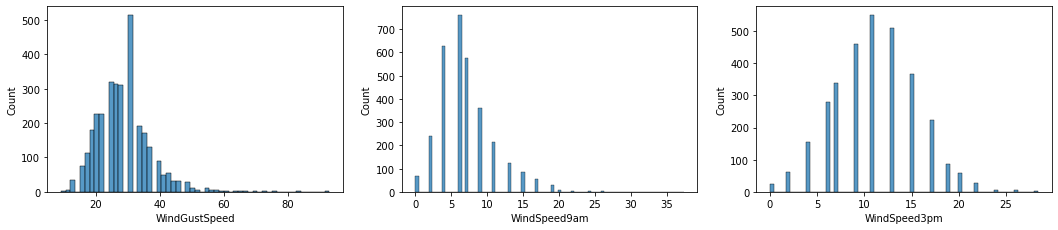

Cairns


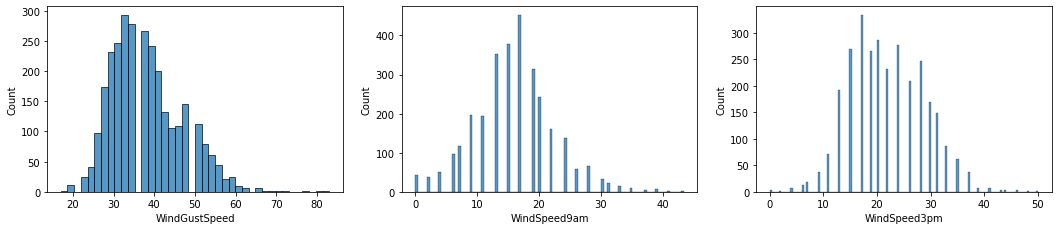

GoldCoast


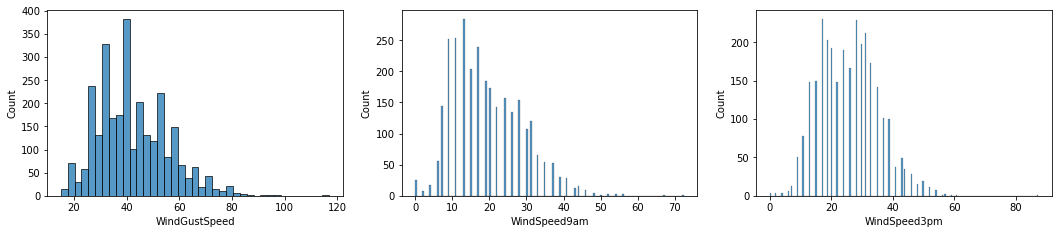

Townsville


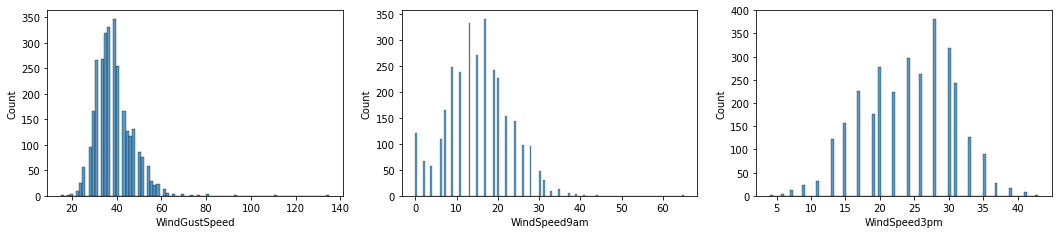

Adelaide


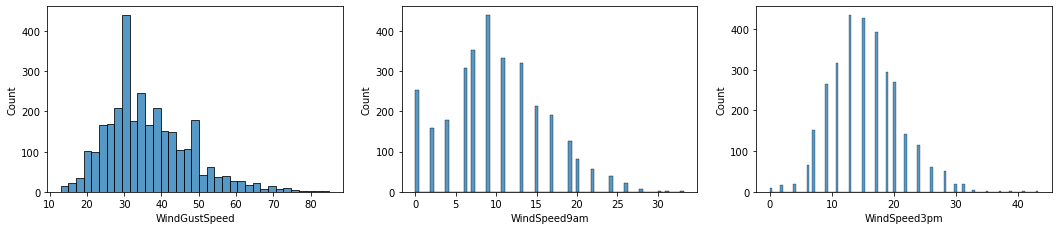

MountGambier


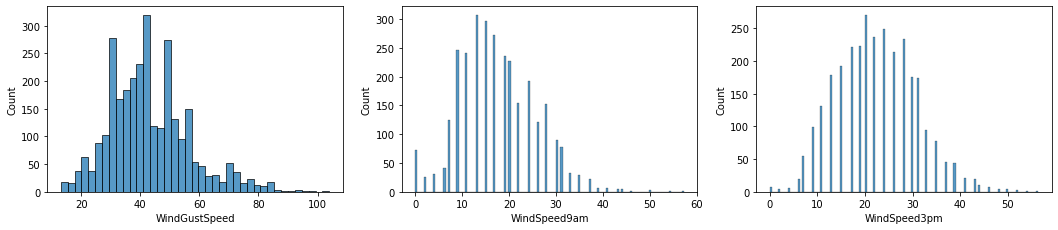

Nuriootpa


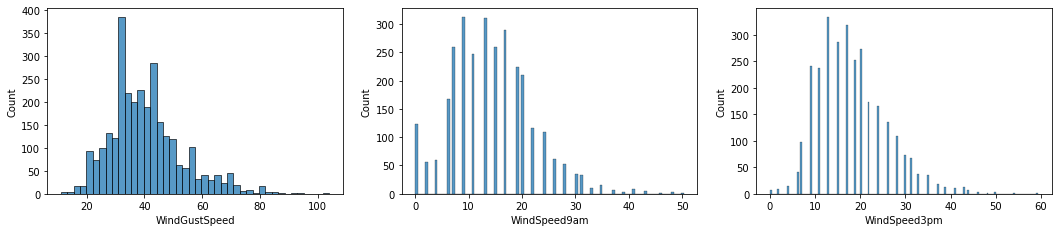

Woomera


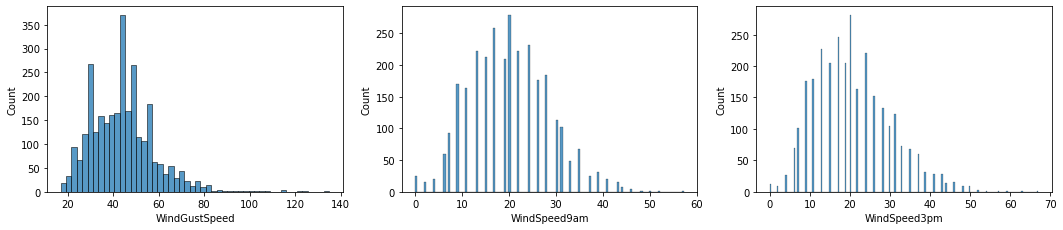

Albany


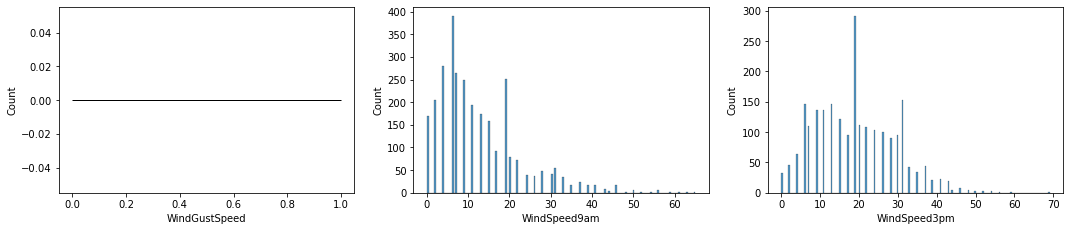

Witchcliffe


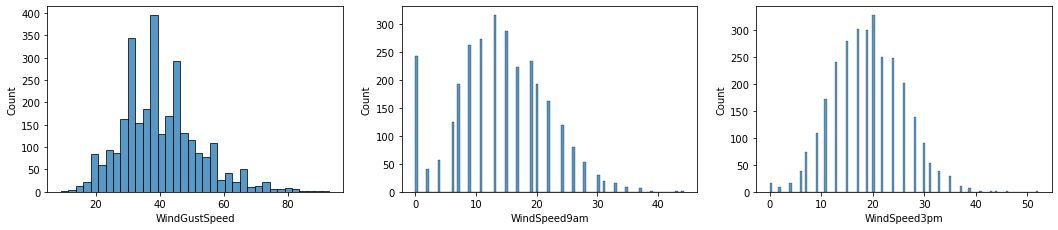

PearceRAAF


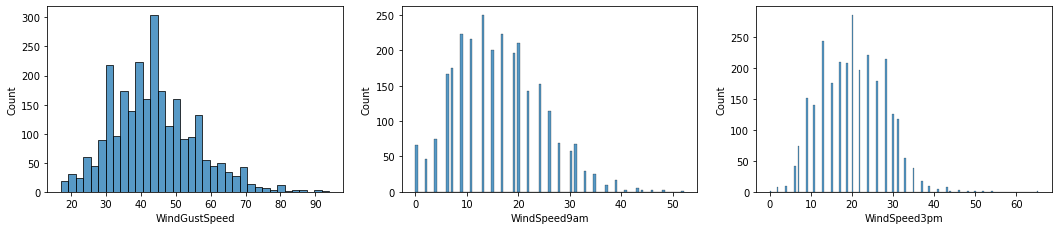

PerthAirport


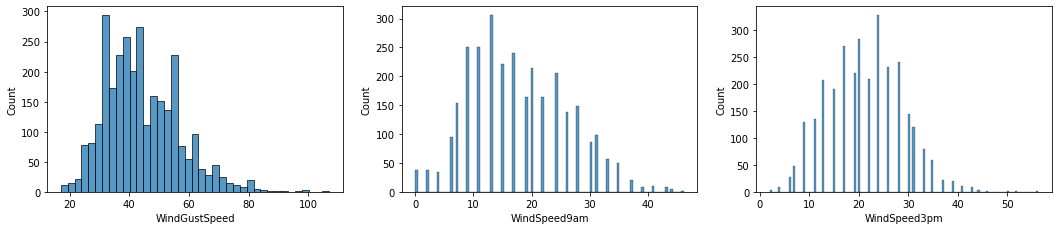

Perth


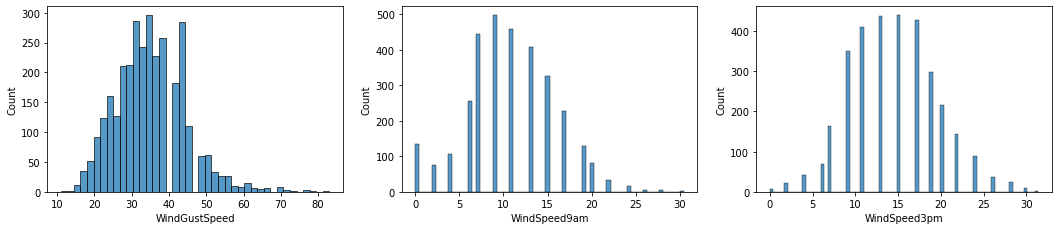

SalmonGums


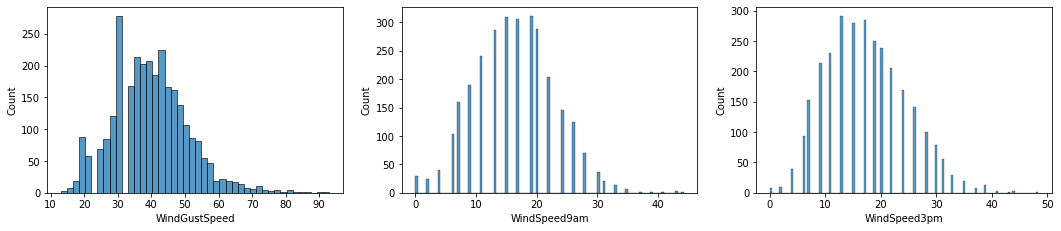

Walpole


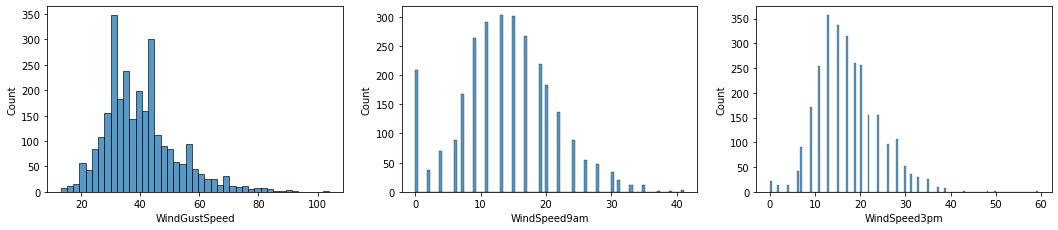

Hobart


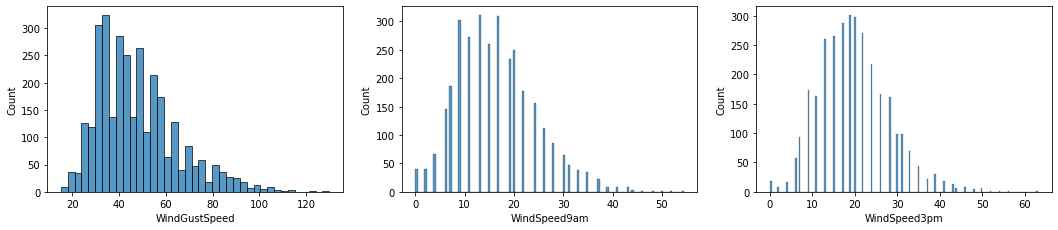

Launceston


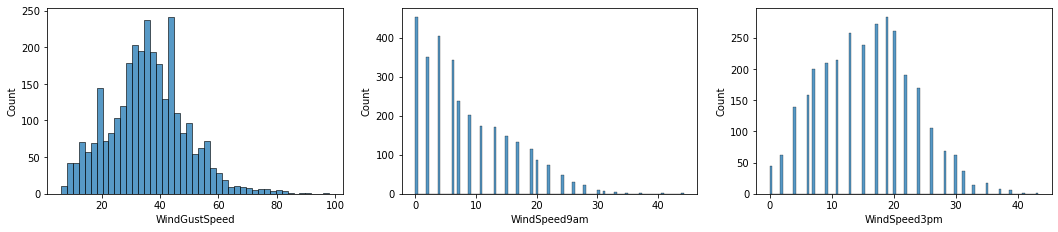

AliceSprings


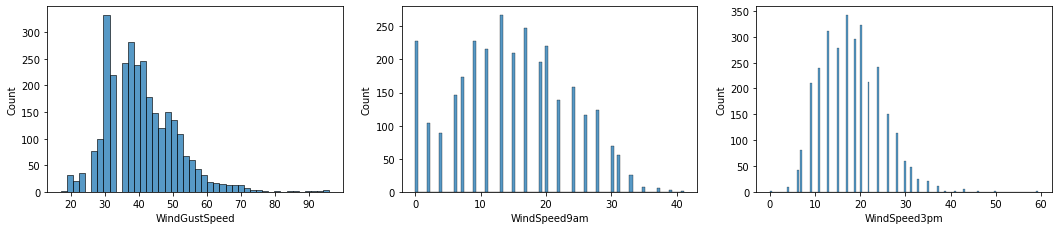

Darwin


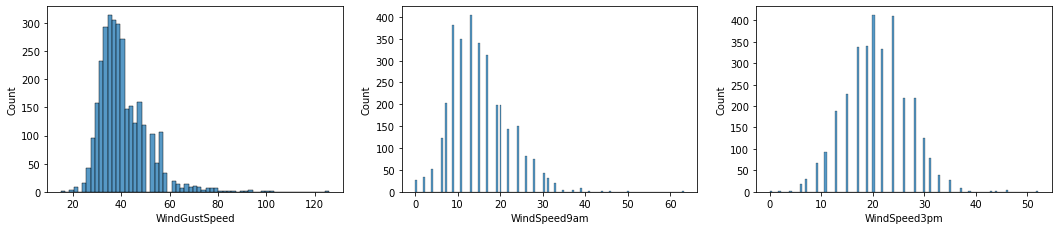

Katherine


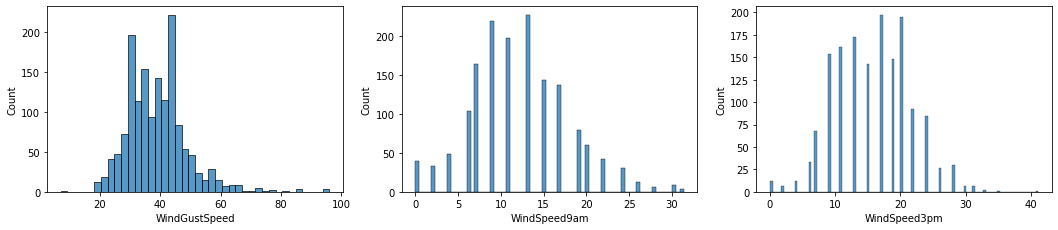

Uluru


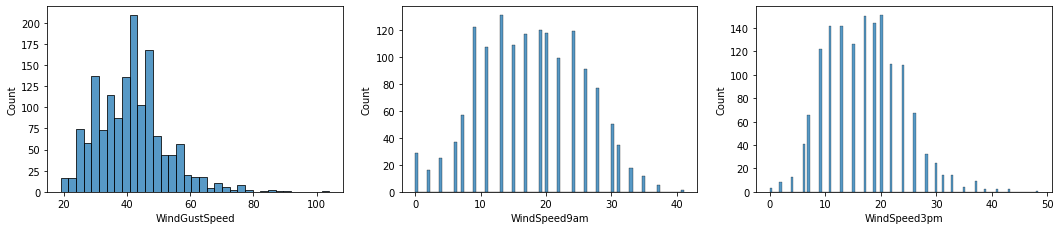

In [47]:
print("DISTRIBUTION AT EACH LOCATION\n")
y=0
z=0
for i in df['Location'].unique():
    a=y+1
    k=a+z
    x=df[df['Location']==i]
    print("%s"%i)
    plt.figure(figsize=(18,200))
    plt.subplot(49,3,k)
    sns.histplot(x['WindGustSpeed'],bins='fd')
    plt.subplot(49,3,k+1)
    sns.histplot(x['WindSpeed9am'],binwidth=fdchoice("WindSpeed9am"))
    plt.subplot(49,3,k+2)
    sns.histplot(x['WindSpeed3pm'],binwidth=fdchoice("WindSpeed3pm"))
    z=y+y
    plt.show()

In [48]:
df.groupby("Month").mean()[["WindGustSpeed","WindSpeed9am","WindSpeed3pm"]]

WindGustSpeed  WindSpeed9am  WindSpeed3pm
Month                                           
1          43.361730     15.297464     20.144392
2          41.457472     14.387998     19.204820
3          39.546399     13.306901     18.444410
4          36.460285     12.837395     17.125909
5          35.721056     12.364471     16.325914
6          35.506375     12.238901     15.839022
7          37.891458     12.921221     17.316817
8          40.245052     13.819246     18.902653
9          42.213311     15.441355     20.156021
10         42.716694     15.409056     20.488791
11         42.582385     15.193429     20.057161
12         43.004769     15.227949     20.184151

In [49]:
df.groupby("Location").mean()[["WindGustSpeed","WindSpeed9am","WindSpeed3pm"]]

WindGustSpeed  WindSpeed9am  WindSpeed3pm
Location                                                   
Adelaide              36.530812      9.954295     15.470665
Albany                      NaN     12.498986     19.001305
Albury                32.953016      8.221816     14.378828
AliceSprings          40.533714     14.728623     18.103665
BadgerysCreek         33.609890      8.047488     14.008262
Ballarat              44.978695     19.978477     22.780496
Bendigo               38.849283     12.934675     17.157374
Brisbane              28.211380      6.950965     11.000633
Cairns                38.067991     15.926372     21.927017
Canberra              40.082174     10.415987     19.125822
Cobar                 36.728814     14.636516     15.128653
CoffsHarbour          39.232197     15.268220     21.211538
Dartmoor              38.896904     10.821429     17.944935
Darwin                40.582355     15.009718     20.832602
GoldCoast             42.472539     19.339783     25.830227
Hobart                47.531398     16.309912     19.813618
Katherine             38.758328     12.131579     15.761108
Launceston            35.630877      8.460165     15.567550
Melbourne             45.425444     19.043157     21.837782
MelbourneAirport      46.919172     20.278923     23.081422
Mildura               37.170829     14.000666     16.691949
Moree                 39.799425     18.024512     16.922940
MountGambier          42.869099     17.521667     22.428146
MountGinini           46.188214     15.922178     15.128915
Newcastle                   NaN      5.985150     10.623558
Nhil                  42.542438     16.443595     20.956023
NorahHead             42.215043     13.912775     21.020240
NorfolkIsland         42.639973     20.168471     21.892640
Nuriootpa             40.660720     14.237345     18.166275
PearceRAAF            43.448549     16.029872     20.261409
Penrith               31.794386      6.343878     11.968168
Perth                 34.882999     10.693392     14.519737
PerthAirport          44.201822     17.753575     21.268285
Portland              42.058883     16.322979     20.774215
Richmond              34.860354      7.018499     14.850359
Sale                  42.474529     14.286620     22.243072
SalmonGums            39.761086     16.286399     17.313228
Sydney                41.761408     15.070674     19.335447
SydneyAirport         47.222072     18.591606     25.778296
Townsville            38.804052     15.224018     24.235818
Tuggeranong           35.189615      7.637647     14.908420
Uluru                 41.369231     17.642809     17.046760
WaggaWagga            36.566147     12.867272     16.164034
Walpole               39.753051     13.883754     17.260839
Watsonia              38.057297      9.922307     15.183789
Williamtown           41.753695     16.496848     22.457973
Witchcliffe           39.980259     13.934510     19.124703
Wollongong            45.695257     16.645249     21.956492
Woomera               44.080962     19.991962     20.613941

For two locations, the data on "WindGustSpeed" is missing.

In [50]:
df[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']].corr()

WindGustSpeed  WindSpeed9am  WindSpeed3pm
WindGustSpeed       1.000000      0.604837      0.686419
WindSpeed9am        0.604837      1.000000      0.519971
WindSpeed3pm        0.686419      0.519971      1.000000

### WindGustDir, WindSpeed9am & WindSpeed3pm

In [51]:
print("Missing Values:-")
round((df[['WindGustDir','WindDir9am','WindDir3pm']].isnull().sum()/df.shape[0])*100,2)

Missing Values:-


WindGustDir    6.56
WindDir9am     7.04
WindDir3pm     2.66
dtype: float64

"WindGustDir", "WindDir9am" and "WindDir3pm" has 6.56%, 7.04% and 2.66% of its data missing respectively.

In [52]:
df.groupby("Location")[['WindGustDir','WindDir9am','WindDir3pm']].agg(lambda x: x.mode())

WindGustDir WindDir9am WindDir3pm
Location                                          
Adelaide                 WSW        NNE        WSW
Albany                    []         NW        ESE
Albury                     W         SE          W
AliceSprings             ESE        ESE        ESE
BadgerysCreek             SW         SW        NNE
Ballarat                   N          N          N
Bendigo                  SSE        SSE          N
Brisbane                   E         SW        ENE
Cairns                    SE        SSE         SE
Canberra                  NW        NNW         NW
Cobar                     SW         NE         SW
CoffsHarbour              NE         SW         NE
Dartmoor                 SSW          N        SSW
Darwin                     E         SE        WNW
GoldCoast                SSE        SSE         SE
Hobart                   NNW        NNW         SE
Katherine                  E         SE        ESE
Launceston               NNW        NNW        NNW
Melbourne                  N          N          S
MelbourneAirport           N          N          S
Mildura                  SSW          S          S
Moree                    NNE        NNE         SW
MountGambier               S          N          S
MountGinini                W          W          W
Newcastle                 []         NW         SE
Nhil                       W          S          W
NorahHead                  S        SSW         NE
NorfolkIsland              E          E         SE
Nuriootpa                 SE         NE        WSW
PearceRAAF                 E          E         SW
Penrith                   SE        SSW         NE
Perth                     SW          E         SW
PerthAirport               E        ENE        WSW
Portland                   W          N          W
Richmond                  SE        SSW         NE
Sale                       W          W          E
SalmonGums               SSW          N          S
Sydney                     W          W          E
SydneyAirport              S         NW         NE
Townsville               ENE         SE        ENE
Tuggeranong              WNW         NW         NW
Uluru                      E          E          E
WaggaWagga               ENE          E        WSW
Walpole                   SE         NW        SSE
Watsonia                 SSW        ENE  [SSW, SW]
Williamtown              WNW        WNW        ESE
Witchcliffe              SSE         SE        SSE
Wollongong                NE         SW         NE
Woomera                  SSE         SE        SSW

Data missing for "WindGustDir" for the same 2 locations as "WindGustSpeed" (Albany & Newcastle)

### Humidity9am & Humidity3pm

In [53]:
print("Missing Values:-")
round((df[['Humidity9am','Humidity3pm']].isnull().sum()/df.shape[0])*100,2)

Missing Values:-


Humidity9am    1.25
Humidity3pm    2.54
dtype: float64

"Humidity9am" and "Humidity3pm" has 1.25% and 2.54% of its data missing respectively.

In [54]:
df[['Humidity9am','Humidity3pm']].describe()

Humidity9am    Humidity3pm
count  140419.000000  138583.000000
mean       68.843810      51.482606
std        19.051293      20.797772
min         0.000000       0.000000
25%        57.000000      37.000000
50%        70.000000      52.000000
75%        83.000000      66.000000
max       100.000000     100.000000

In [55]:
df[['Humidity9am','Humidity3pm']].skew()

Humidity9am   -0.482821
Humidity3pm    0.034515
dtype: float64

"Humidity9am" is negatively skewed.

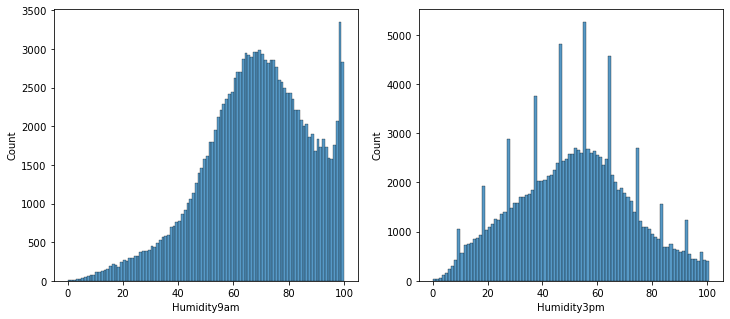

In [56]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['Humidity9am'],binwidth=fdchoice("Humidity9am"))

plt.subplot(1,2,2)
sns.histplot(df['Humidity3pm'],binwidth=fdchoice("Humidity3pm"))
plt.show()

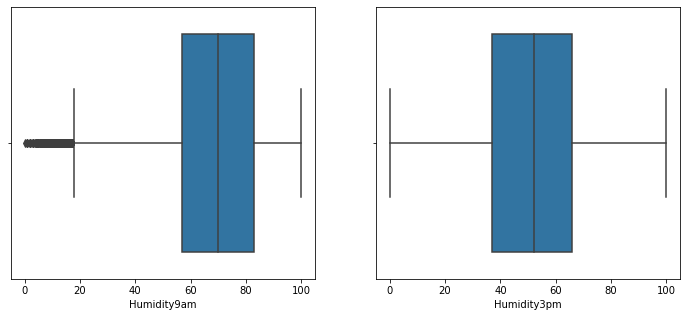

In [57]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.boxplot(df['Humidity9am'])

plt.subplot(1,2,2)
sns.boxplot(df['Humidity3pm'])
plt.show()

In [58]:
df.groupby("Month").mean()[["Humidity9am","Humidity3pm"]]

Humidity9am  Humidity3pm
Month                          
1        62.245485    46.287821
2        66.936925    48.939291
3        70.813463    50.340329
4        70.790388    52.190915
5        74.697111    55.186362
6        79.419405    60.512935
7        77.477703    57.949414
8        71.366348    52.768436
9        64.814755    50.174507
10       62.622861    47.344114
11       61.760000    47.848736
12       61.551750    47.322651

In [59]:
df.groupby("Location").mean()[["Humidity9am","Humidity3pm"]]

Humidity9am  Humidity3pm
Location                                  
Adelaide            59.618476    44.820097
Albany              74.820202    67.392487
Albury              74.108081    47.884935
AliceSprings        39.625165    24.078321
BadgerysCreek       76.893067    51.426648
Ballarat            81.816428    59.045665
Bendigo             70.543084    46.472140
Brisbane            64.014878    53.862627
Cairns              69.902276    61.677376
Canberra            73.216562    45.832648
Cobar               55.158316    33.863557
CoffsHarbour        67.867278    62.237334
Dartmoor            85.216703    62.457749
Darwin              68.486368    51.830094
GoldCoast           66.276094    62.953872
Hobart              65.618943    52.952441
Katherine           63.668016    42.610583
Launceston          79.470569    57.277392
Melbourne           67.320312    50.897446
MelbourneAirport    70.115961    51.171333
Mildura             64.100533    35.404595
Moree               61.217544    35.584767
MountGambier        75.493210    57.315563
MountGinini         77.131725    69.683854
Newcastle           74.011532    57.345455
Nhil                73.038241    44.924793
NorahHead           74.610577    67.538937
NorfolkIsland       70.810071    67.840648
Nuriootpa           66.724265    45.366343
PearceRAAF          60.330783    41.338568
Penrith             75.787124    48.955953
Perth               62.688128    46.906122
PerthAirport        58.775673    41.923205
Portland            78.735663    65.975863
Richmond            76.853255    49.004475
Sale                78.947669    56.371524
SalmonGums          62.812733    40.751355
Sydney              68.229010    54.699158
SydneyAirport       64.810523    53.878374
Townsville          63.948895    57.388724
Tuggeranong         72.796172    47.141614
Uluru               42.420290    23.940132
WaggaWagga          67.902792    42.661626
Walpole             76.005747    66.240575
Watsonia            78.373074    54.732244
Williamtown         71.259623    53.429694
Witchcliffe         71.265757    57.641045
Wollongong          67.673759    65.196965
Woomera             53.118912    28.364372

In [60]:
df[['Humidity9am','Humidity3pm']].corr()

Humidity9am  Humidity3pm
Humidity9am     1.000000     0.667388
Humidity3pm     0.667388     1.000000

### Pressure9am & Pressure3pm

In [61]:
print("Missing Values:-")
round((df[['Pressure9am','Pressure3pm']].isnull().sum()/df.shape[0])*100,2)

Missing Values:-


Pressure9am    9.86
Pressure3pm    9.83
dtype: float64

"Pressure9am" and "Pressure3pm" has almost same amount of its data missing. 9.86% and 9.83% respectively.

In [62]:
df[['Pressure9am','Pressure3pm']].describe()

Pressure9am    Pressure3pm
count  128179.000000  128212.000000
mean     1017.653758    1015.258204
std         7.105476       7.036677
min       980.500000     977.100000
25%      1012.900000    1010.400000
50%      1017.600000    1015.200000
75%      1022.400000    1020.000000
max      1041.000000    1039.600000

In [63]:
df[['Pressure9am','Pressure3pm']].skew()

Pressure9am   -0.096211
Pressure3pm   -0.046198
dtype: float64

Both the features are negatively skewed.

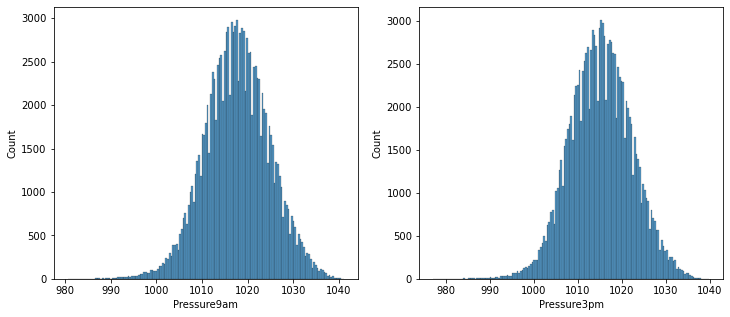

In [64]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['Pressure9am'],binwidth=fdchoice("Pressure9am"))

plt.subplot(1,2,2)
sns.histplot(df['Pressure3pm'],binwidth=fdchoice("Pressure3pm"))
plt.show()

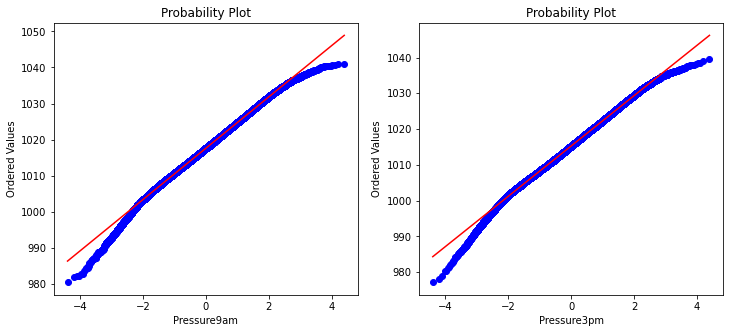

In [65]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
st.probplot(df["Pressure9am"].dropna(),dist='norm',plot=plt)
plt.xlabel("Pressure9am")

plt.subplot(1,2,2)
st.probplot(df["Pressure3pm"].dropna(),dist='norm',plot=plt)
plt.xlabel("Pressure3pm")
plt.show()

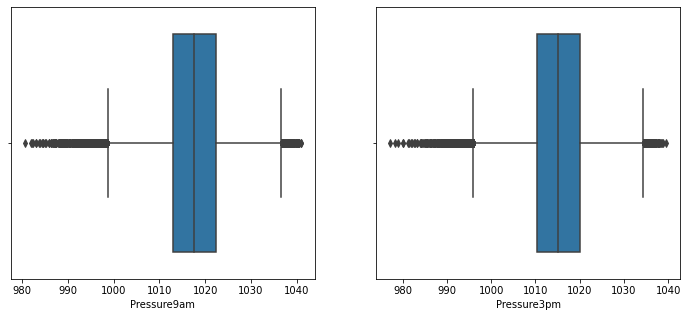

In [66]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.boxplot(df['Pressure9am'])

plt.subplot(1,2,2)
sns.boxplot(df['Pressure3pm'])
plt.show()

DISTRIBUTION AT EACH MONTH

Month: 1


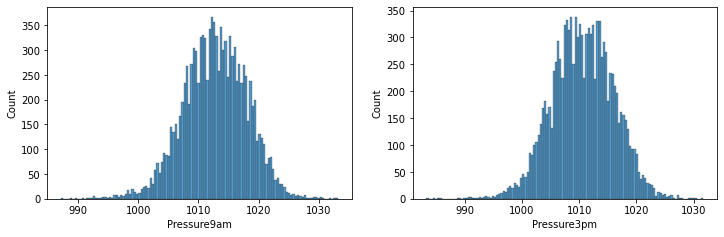

Month: 2


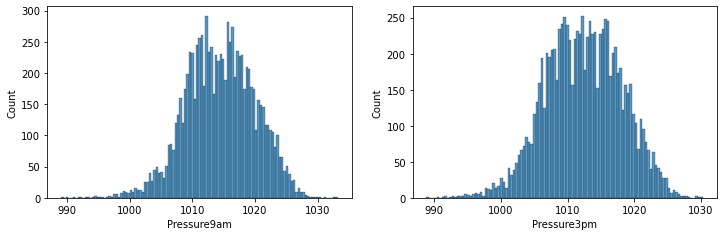

Month: 3


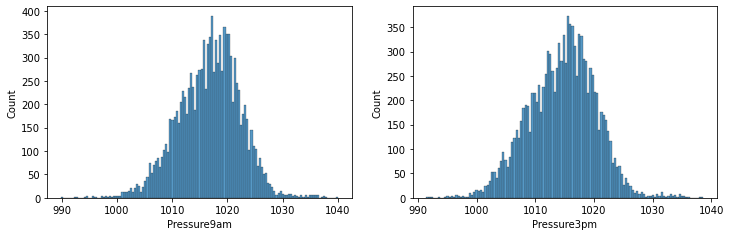

Month: 4


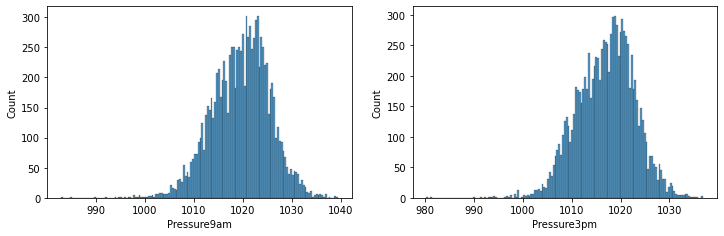

Month: 5


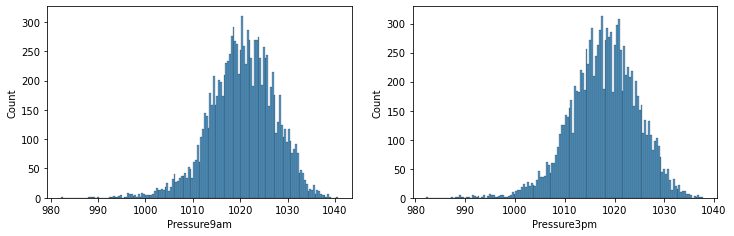

Month: 6


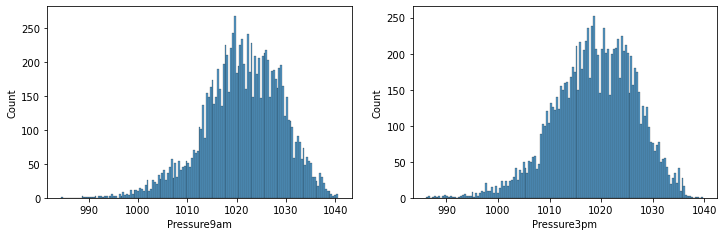

Month: 7


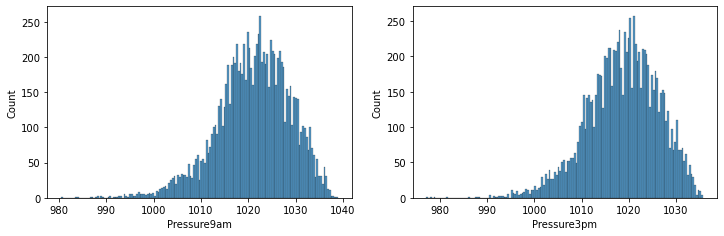

Month: 8


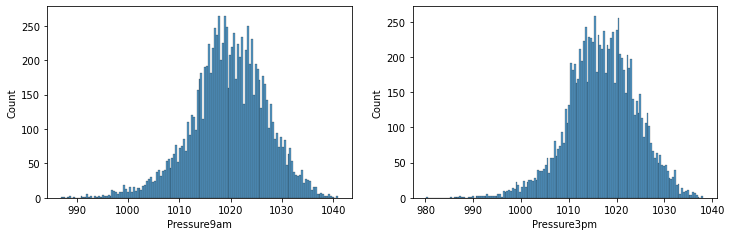

Month: 9


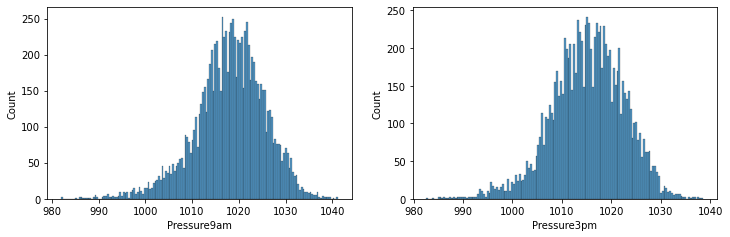

Month: 10


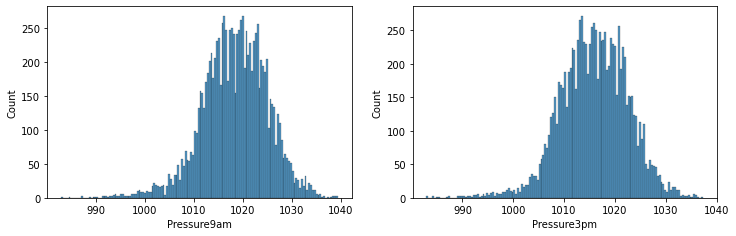

Month: 11


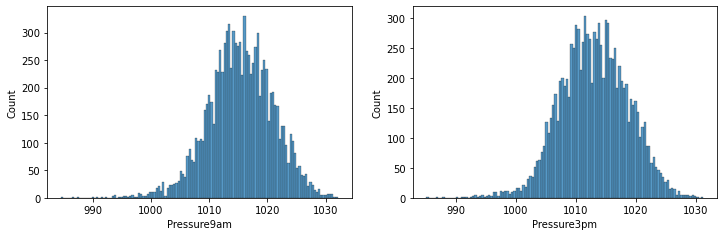

Month: 12


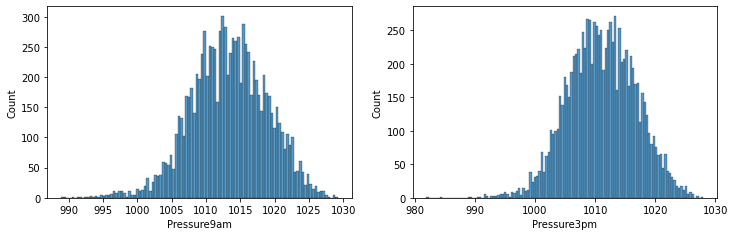

In [67]:
print("DISTRIBUTION AT EACH MONTH\n")
y=0
for i in range(1,13):
    j=i+y
    x = df[df["Month"]==i]
    print("Month: %d"%i)
    plt.figure(figsize=(12,50))
    plt.subplot(12,2,j)
    sns.histplot(x['Pressure9am'],binwidth=fdchoice("Pressure9am"))
    plt.subplot(12,2,j+1)
    sns.histplot(x['Pressure3pm'],binwidth=fdchoice("Pressure3pm"))
    y=i
    plt.show()

DISTRIBUTION AT EACH LOCATION

1. Albury


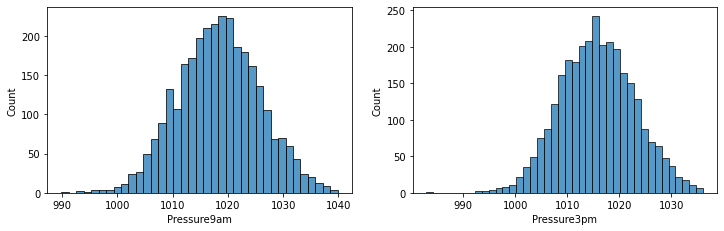

2. BadgerysCreek


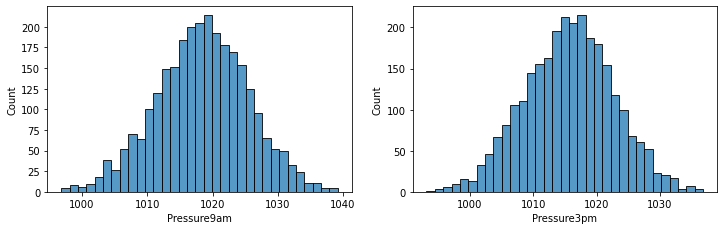

3. Cobar


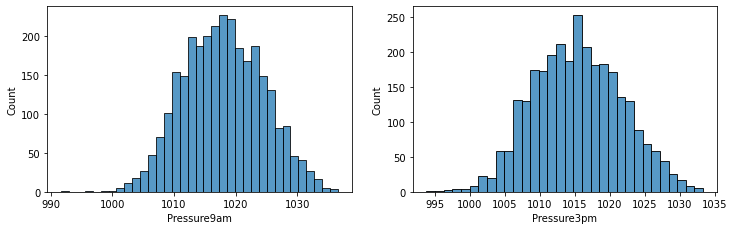

4. CoffsHarbour


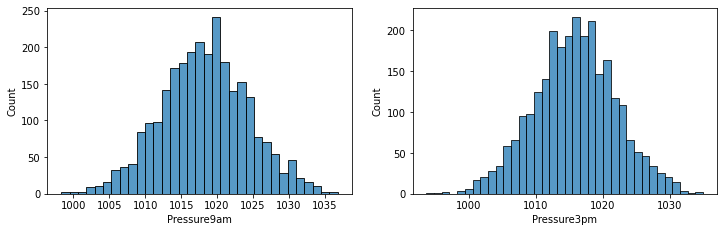

5. Moree


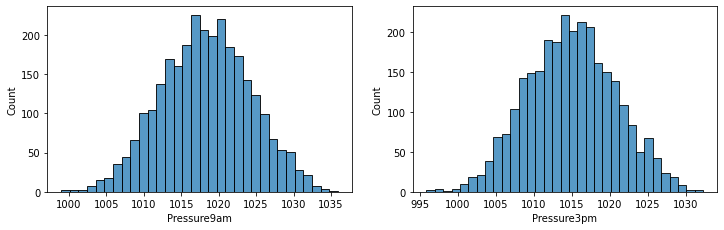

6. Newcastle


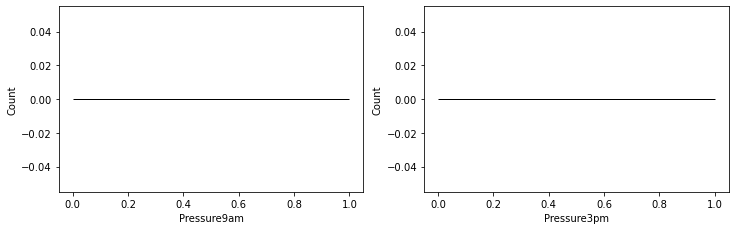

7. NorahHead


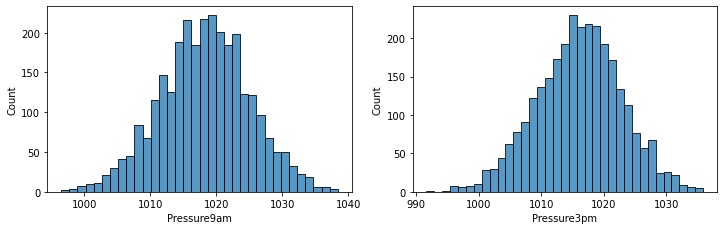

8. NorfolkIsland


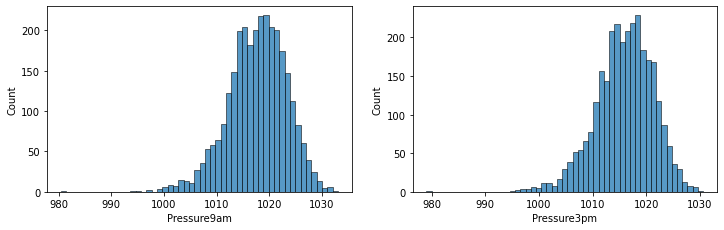

9. Penrith


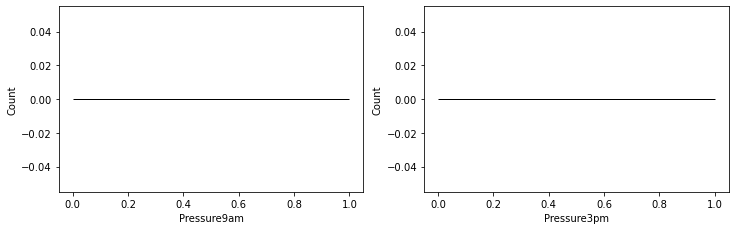

10. Richmond


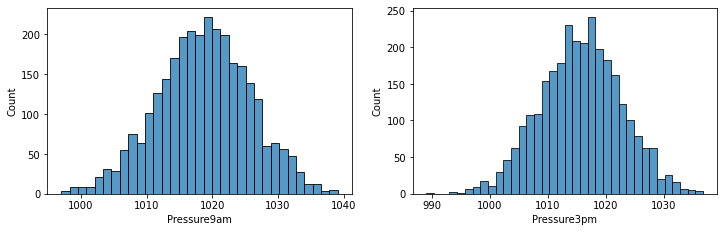

11. Sydney


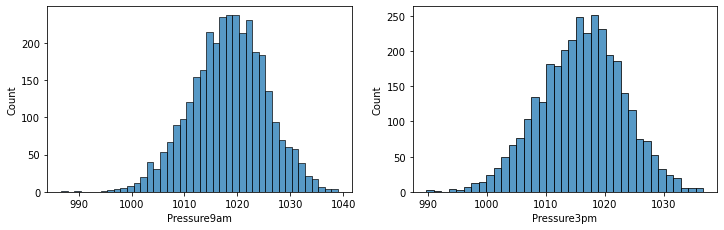

12. SydneyAirport


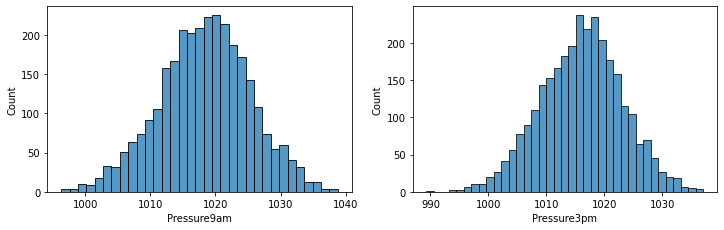

13. WaggaWagga


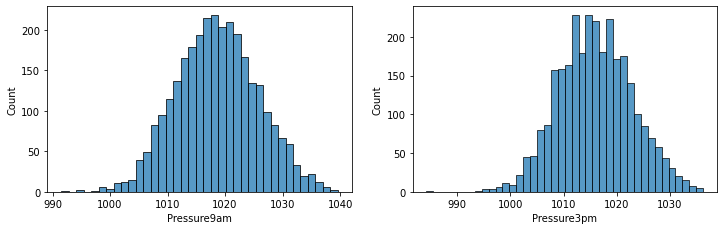

14. Williamtown


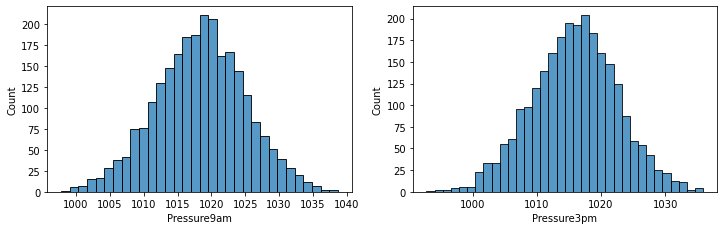

15. Wollongong


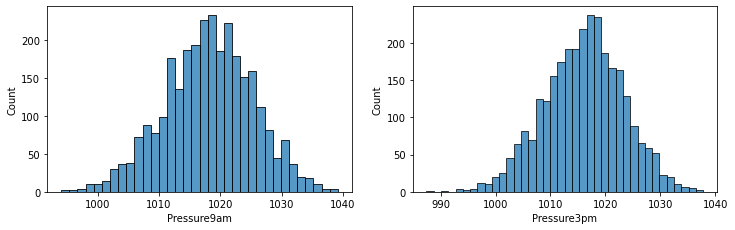

16. Canberra


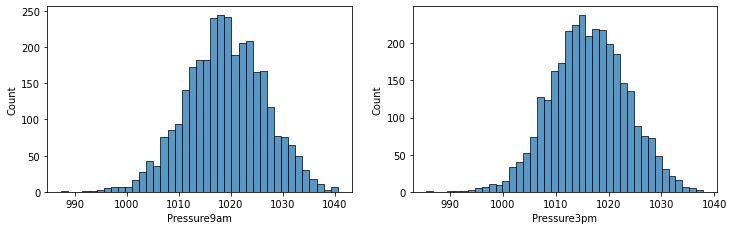

17. Tuggeranong


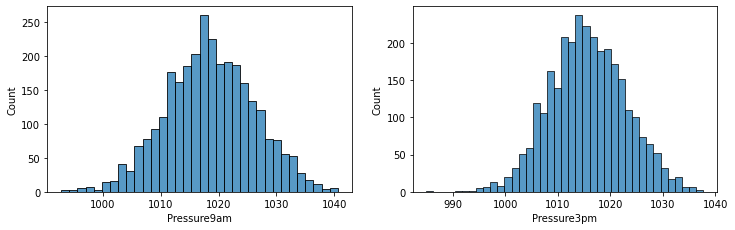

18. MountGinini


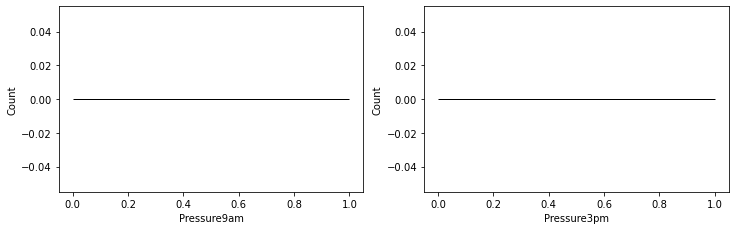

19. Ballarat


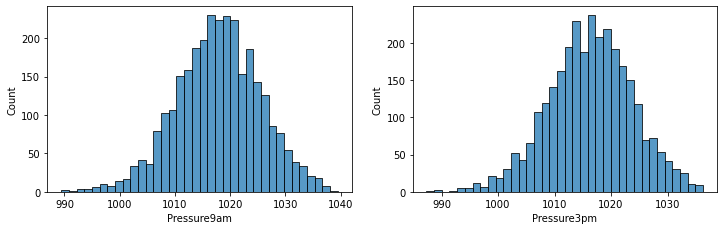

20. Bendigo


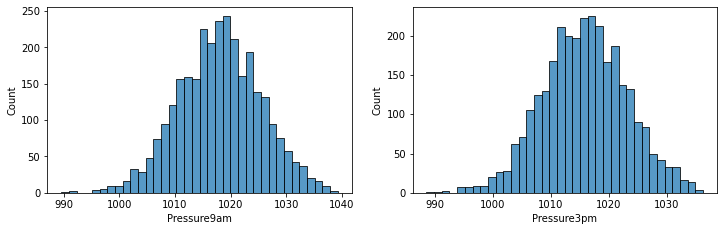

21. Sale


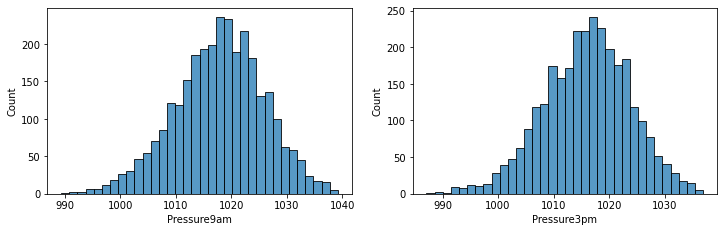

22. MelbourneAirport


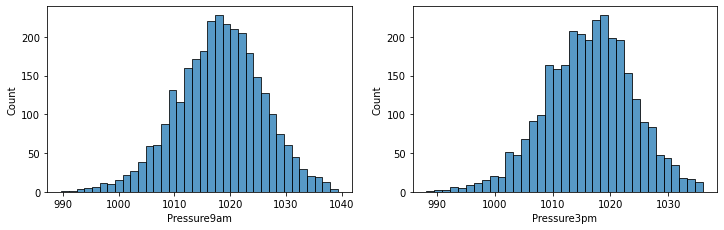

23. Melbourne


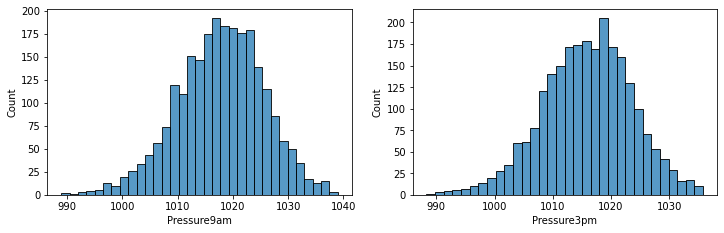

24. Mildura


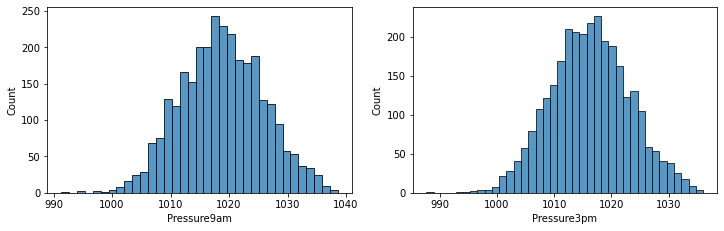

25. Nhil


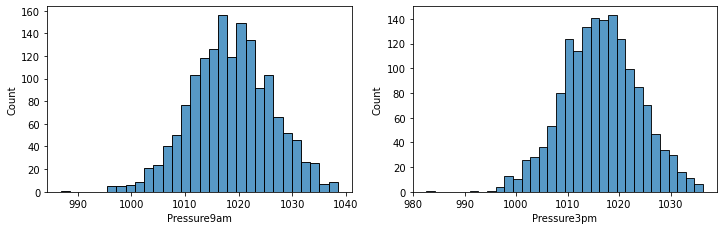

26. Portland


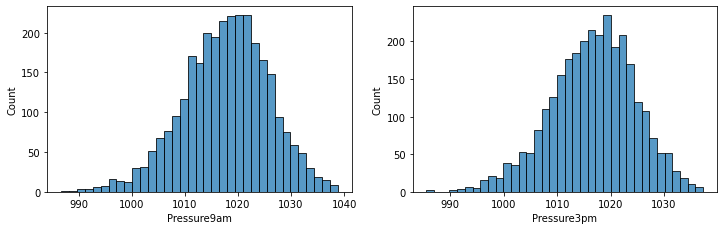

27. Watsonia


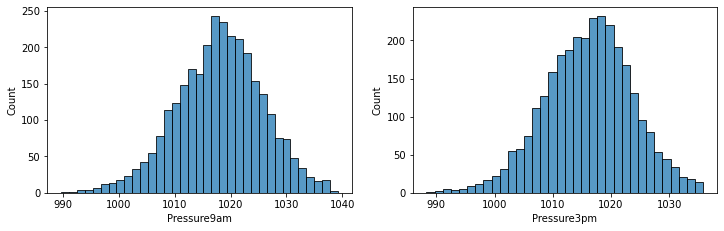

28. Dartmoor


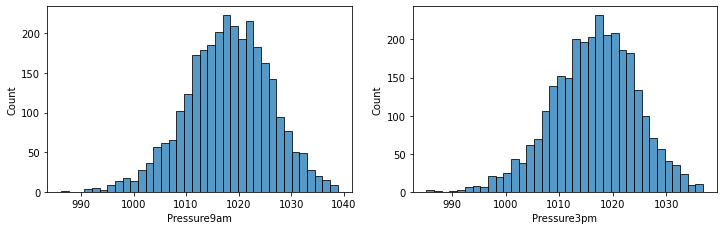

29. Brisbane


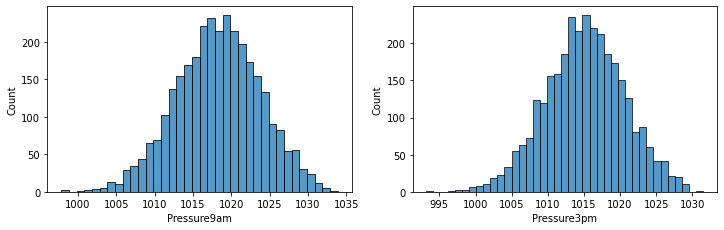

30. Cairns


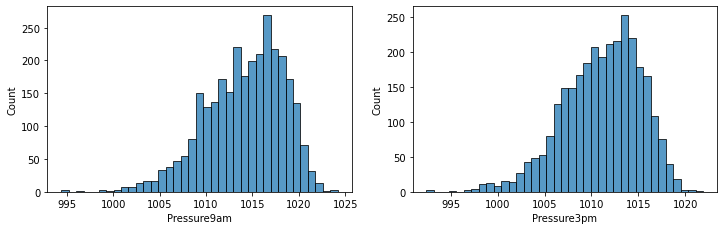

31. GoldCoast


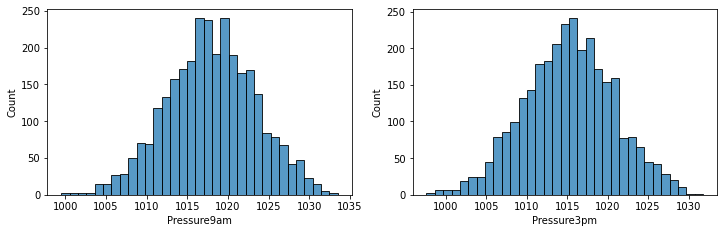

32. Townsville


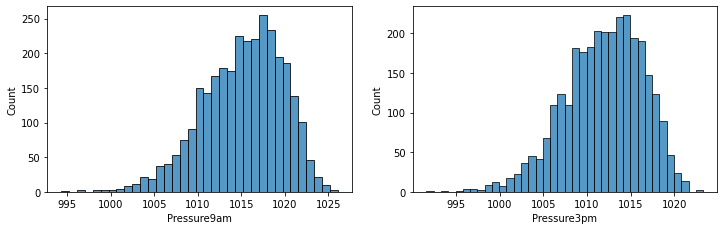

33. Adelaide


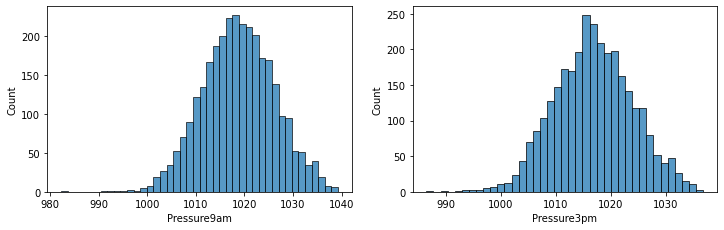

34. MountGambier


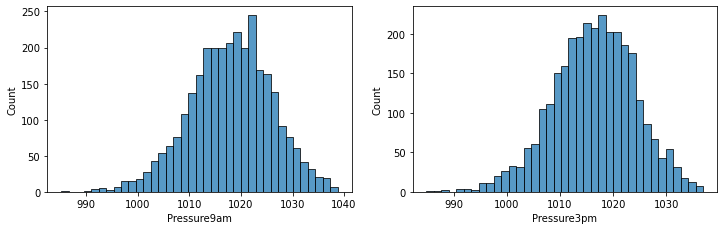

35. Nuriootpa


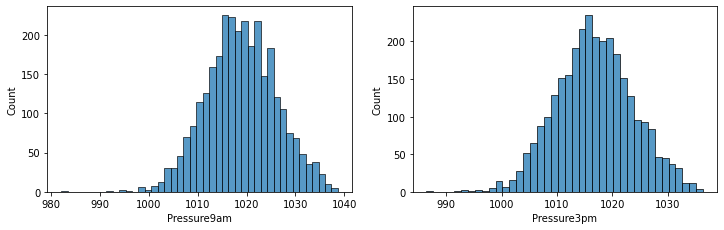

36. Woomera


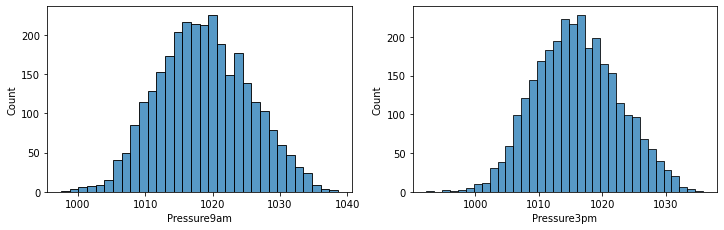

37. Albany


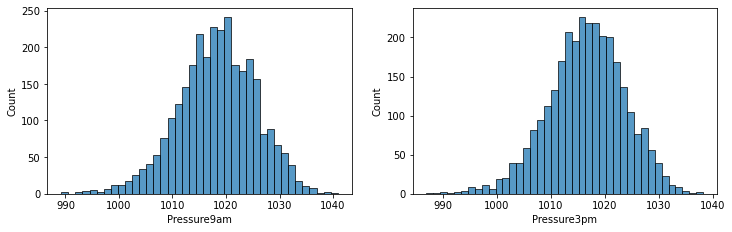

38. Witchcliffe


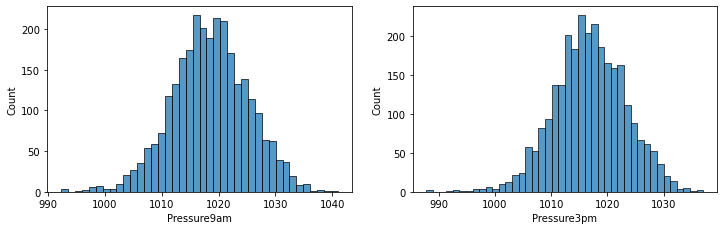

39. PearceRAAF


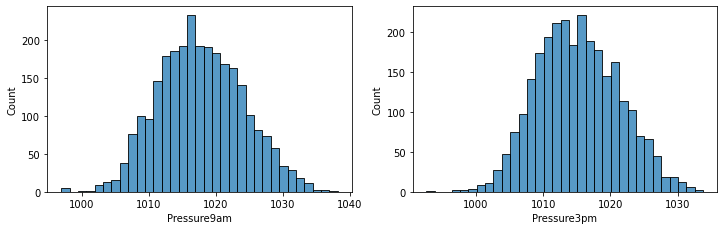

40. PerthAirport


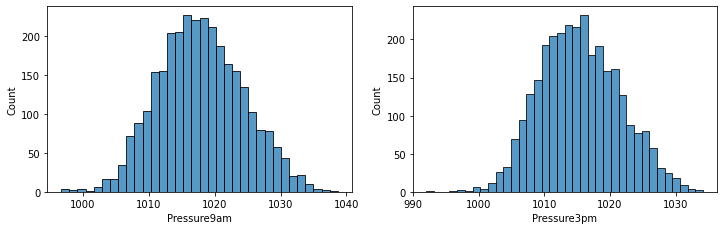

41. Perth


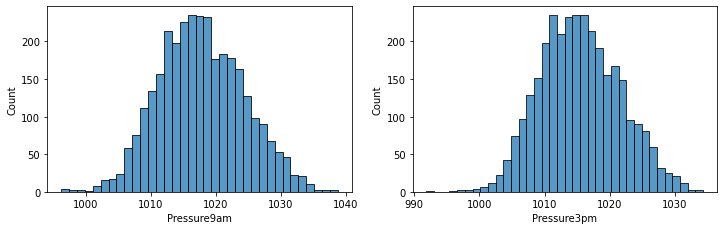

42. SalmonGums


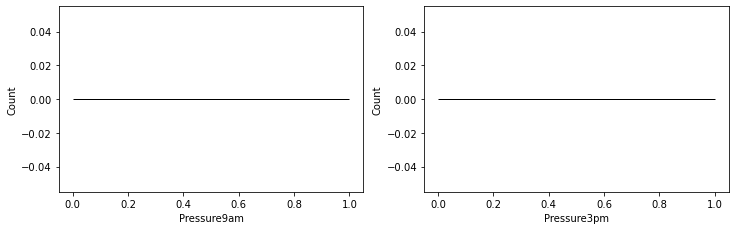

43. Walpole


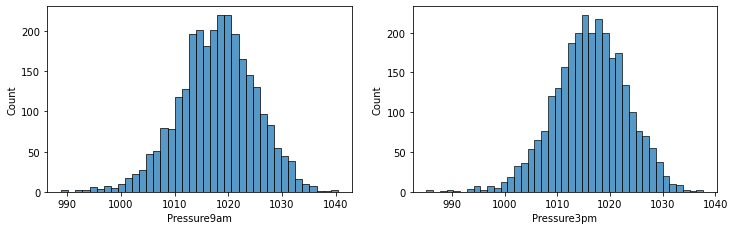

44. Hobart


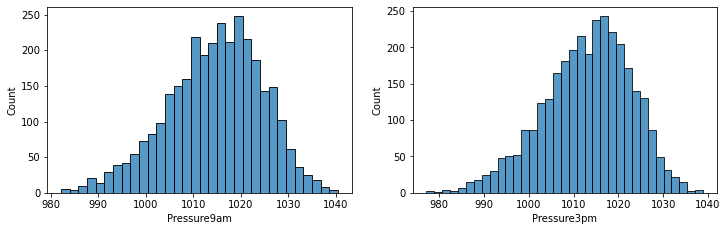

45. Launceston


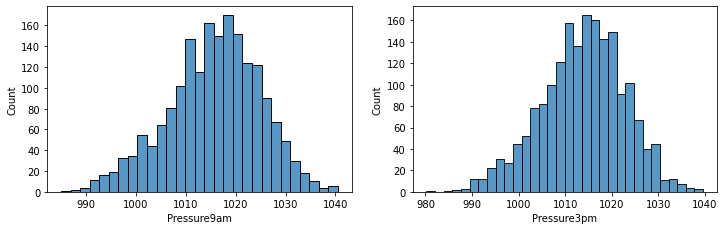

46. AliceSprings


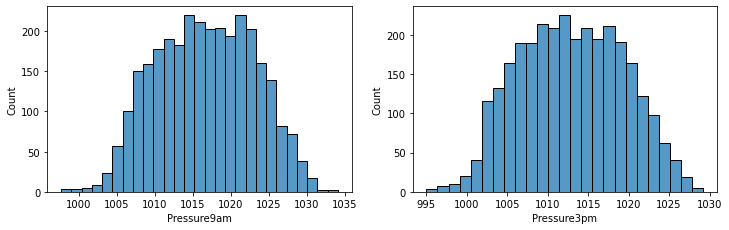

47. Darwin


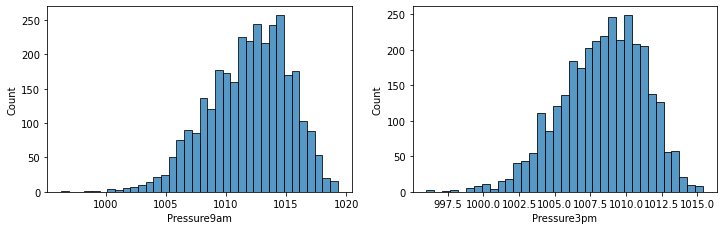

48. Katherine


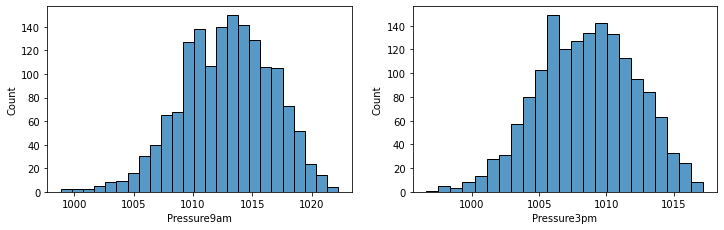

49. Uluru


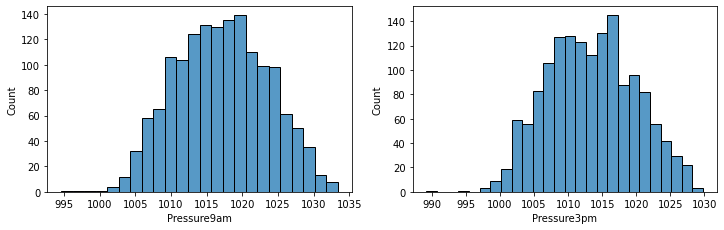

In [68]:
print("DISTRIBUTION AT EACH LOCATION\n")
y=0
z=0
for i in df['Location'].unique():
    y=y+1
    k=y+z
    x=df[df['Location']==i]
    print("%d. %s"%(y,i))
    plt.figure(figsize=(12,200))
    plt.subplot(49,2,k)
    sns.histplot(x['Pressure9am'])
    plt.subplot(49,2,k+1)
    sns.histplot(x['Pressure3pm'])
    z=y
    plt.show()

Both the feature show similar behavior at both slices, Months and Locations.

In [69]:
df.groupby('Month').mean()[["Pressure9am","Pressure3pm"]]

Pressure9am  Pressure3pm
Month                          
1      1012.785742  1010.601596
2      1014.495694  1012.373761
3      1016.769077  1014.558906
4      1019.649115  1017.054824
5      1020.448532  1017.949784
6      1021.194259  1018.869867
7      1021.115173  1018.721077
8      1019.599575  1016.985671
9      1018.067078  1015.264174
10     1018.357838  1015.897892
11     1015.406557  1013.062750
12     1013.334919  1011.127308

In [70]:
a=df.groupby('Location').mean()[["Pressure9am","Pressure3pm"]]
a

Pressure9am  Pressure3pm
Location                                  
Adelaide          1018.727579  1016.772202
Albany            1018.283049  1016.500668
Albury            1018.367253  1015.755504
AliceSprings      1016.699670  1012.884478
BadgerysCreek     1018.450880  1015.632806
Ballarat          1017.855293  1016.274967
Bendigo           1018.024272  1015.869521
Brisbane          1018.246947  1015.116714
Cairns            1014.154284  1011.103447
Canberra          1018.986725  1016.235272
Cobar             1017.995137  1015.330037
CoffsHarbour      1018.222731  1015.833122
Dartmoor          1017.997621  1016.505304
Darwin            1011.888154  1008.348370
GoldCoast         1017.932081  1015.225101
Hobart            1014.526828  1012.955130
Katherine         1012.840244  1008.531660
Launceston        1015.666578  1013.745377
Melbourne         1017.732580  1015.847451
MelbourneAirport  1018.087670  1016.279096
Mildura           1018.771029  1016.262429
Moree             1018.309706  1014.935682
MountGambier      1017.940112  1016.380595
MountGinini               NaN          NaN
Newcastle                 NaN          NaN
Nhil              1018.546335  1016.401402
NorahHead         1018.259033  1016.014824
NorfolkIsland     1017.631360  1015.887576
Nuriootpa         1018.915793  1016.791316
PearceRAAF        1017.746902  1015.177575
Penrith                   NaN          NaN
Perth             1017.784398  1015.420457
PerthAirport      1017.890323  1015.366789
Portland          1017.686260  1016.620194
Richmond          1018.705527  1015.642316
Sale              1017.827294  1015.900637
SalmonGums                NaN          NaN
Sydney            1018.346156  1016.018774
SydneyAirport     1018.360594  1015.969654
Townsville        1015.173129  1011.913914
Tuggeranong       1018.521623  1015.672423
Uluru             1017.109881  1013.308289
WaggaWagga        1018.569120  1015.919724
Walpole           1017.845651  1016.189776
Watsonia          1018.035178  1016.093031
Williamtown       1018.365906  1015.842138
Witchcliffe       1018.473643  1016.804220
Wollongong        1018.112683  1016.023077
Woomera           1018.683317  1016.019926

In [71]:
a[a.isna().any(axis=1)]

Pressure9am  Pressure3pm
Location                             
MountGinini          NaN          NaN
Newcastle            NaN          NaN
Penrith              NaN          NaN
SalmonGums           NaN          NaN

There are 4 location for which the data is missing in both the features

In [72]:
df[['Pressure9am','Pressure3pm']].corr()

Pressure9am  Pressure3pm
Pressure9am     1.000000     0.961348
Pressure3pm     0.961348     1.000000

Very strong positive correlation (0.96) between these two features.

### Cloud9am & Cloud3pm

In [73]:
print("Missing Values:-")
round((df[['Cloud9am','Cloud3pm']].isnull().sum()/df.shape[0])*100,2)

Missing Values:-


Cloud9am    37.74
Cloud3pm    40.15
dtype: float64

"Cloud9am" and "Cloud3pm" has majority of its data missing. (37.74% and 40.15% respectively)

In [74]:
df[['Cloud9am','Cloud3pm']].describe()

Cloud9am      Cloud3pm
count  88536.000000  85099.000000
mean       4.437189      4.503167
std        2.887016      2.720633
min        0.000000      0.000000
25%        1.000000      2.000000
50%        5.000000      5.000000
75%        7.000000      7.000000
max        9.000000      9.000000

Since, cloud features have a range of 0-8. Any value falling beyond this range is wrong. From the feature description we can see that the max value in both the feature is 9. Let's check for these records.

In [75]:
df[df['Cloud9am']>8]

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
30097  2009-09-23    Sydney     17.0     21.8       4.4         11.2   
45981  2012-05-27  Canberra      0.6     14.5       0.0          NaN   

       Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
30097       8.0         NaN            NaN          W          W   
45981       7.8          SW           30.0        NNW        SSW   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
30097          30.0          37.0         40.0         36.0        996.8   
45981           4.0           9.0         99.0         41.0       1022.4   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  RISK_MM  \
30097        997.8       9.0       3.0     17.3     20.9       Yes      0.0   
45981       1020.7       9.0       NaN      4.4     14.2        No      0.0   

      RainTomorrow  Month  Year  
30097           No      9  2009  
45981           No      5  2012

In [76]:
df[df['Cloud3pm']>8]

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
104342  2012-11-02  Woomera     10.6     24.6       0.2         11.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
104342      11.4         SSE           39.0         SE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
104342          26.0          17.0         45.0         13.0       1019.0   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  RISK_MM  \
104342       1015.2       6.0       9.0     14.8     23.7        No      0.0   

       RainTomorrow  Month  Year  
104342           No     11  2012

There are 3 records that lie beyond the range of cloud feature.

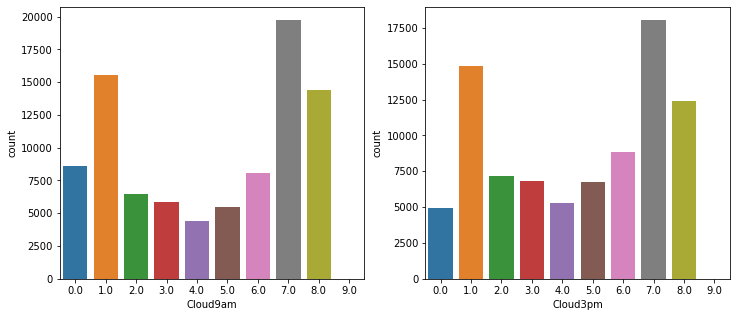

In [77]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(df['Cloud9am'])

plt.subplot(1,2,2)
sns.countplot(df['Cloud3pm'])
plt.show()

DISTRIBUTION AT EACH MONTH

Month: 1


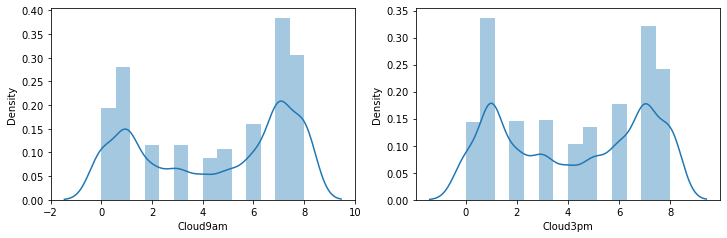

Month: 2


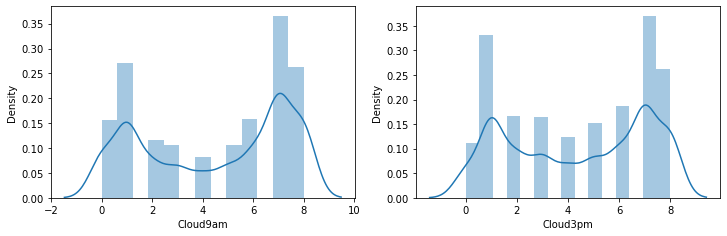

Month: 3


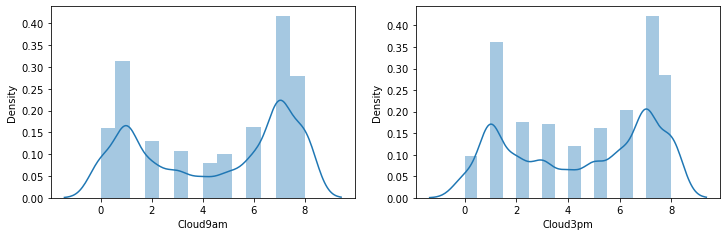

Month: 4


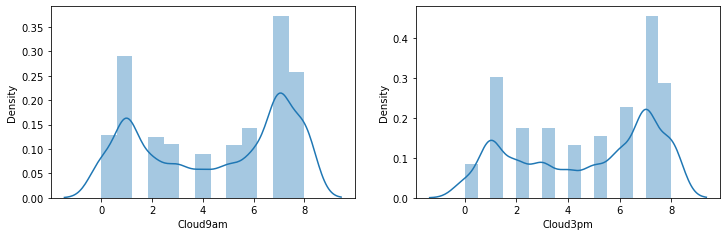

Month: 5


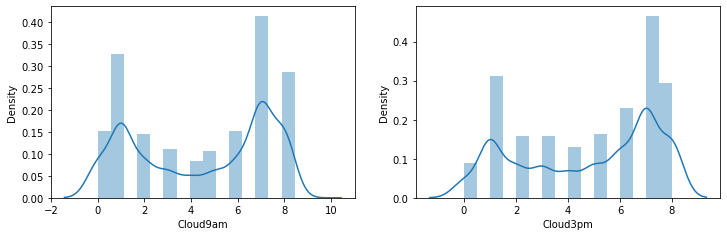

Month: 6


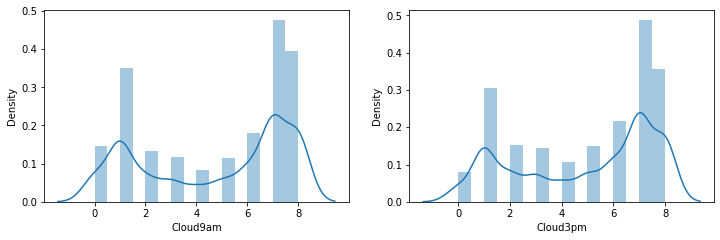

Month: 7


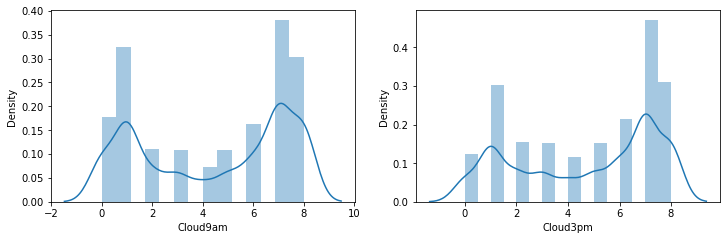

Month: 8


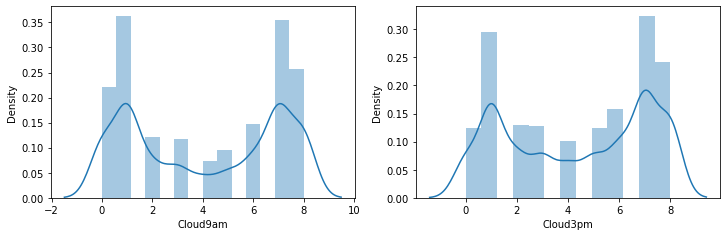

Month: 9


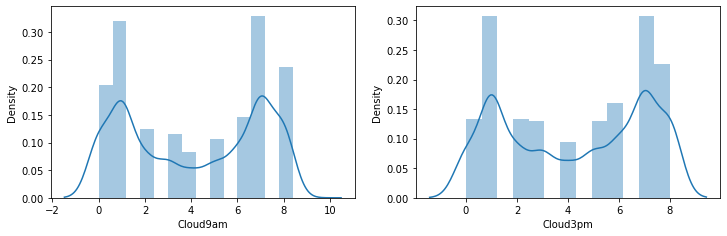

Month: 10


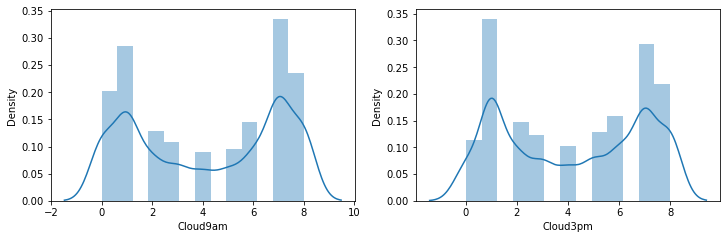

Month: 11


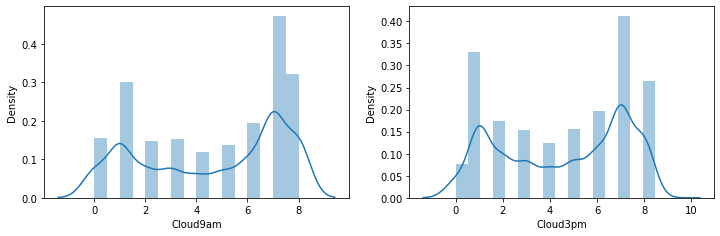

Month: 12


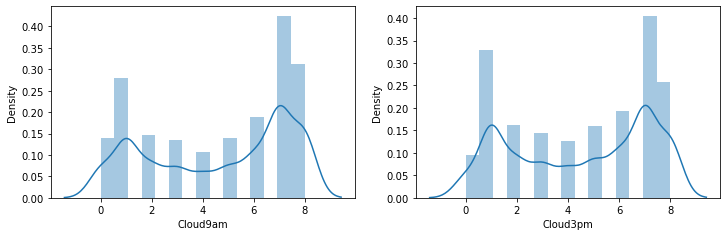

In [78]:
print("DISTRIBUTION AT EACH MONTH\n")
y=0
for i in range(1,13):
    j=i+y
    x = df[df["Month"]==i]
    print("Month: %d"%i)
    plt.figure(figsize=(12,50))
    plt.subplot(12,2,j)
    sns.distplot(x['Cloud9am'])
    plt.subplot(12,2,j+1)
    sns.distplot(x['Cloud3pm'])
    y=i
    plt.show()

In [79]:
df.groupby('Month').mean()[['Cloud9am','Cloud3pm']]

Cloud9am  Cloud3pm
Month                    
1      4.478040  4.225673
2      4.494022  4.397961
3      4.479871  4.488169
4      4.489694  4.682758
5      4.453519  4.722064
6      4.732892  4.894100
7      4.448593  4.687976
8      4.085112  4.375206
9      4.117416  4.261822
10     4.189096  4.187464
11     4.632972  4.557124
12     4.647435  4.510468

In [80]:
a=df.groupby('Location').mean()[['Cloud9am','Cloud3pm']]
a

Cloud9am  Cloud3pm
Location                            
Adelaide               NaN       NaN
Albany            5.190876  4.808703
Albury            6.392356  5.419788
AliceSprings      2.839200  3.245791
BadgerysCreek          NaN       NaN
Ballarat          5.797101  6.286865
Bendigo           4.396618  4.857080
Brisbane          3.918354  3.879076
Cairns            4.557974  4.429907
Canberra          4.873724  4.789279
Cobar             3.298969  3.851135
CoffsHarbour      4.321902  4.492799
Dartmoor               NaN       NaN
Darwin            4.336572  4.311383
GoldCoast              NaN       NaN
Hobart            4.840573  4.963879
Katherine         2.555848  3.169611
Launceston        6.305556  5.729620
Melbourne         5.271069  5.302846
MelbourneAirport  5.246261  5.263298
Mildura           3.385221  3.920951
Moree             3.317166  3.945783
MountGambier      5.518126  5.474675
MountGinini            NaN       NaN
Newcastle         4.125811  4.304535
Nhil                   NaN       NaN
NorahHead              NaN       NaN
NorfolkIsland     4.995866  4.842051
Nuriootpa         4.674783  4.876620
PearceRAAF        3.813877  3.972911
Penrith                NaN       NaN
Perth             3.383579  3.469740
PerthAirport      3.371467  3.444260
Portland          6.334364  6.068604
Richmond          6.242123  5.505172
Sale              5.346314  5.094145
SalmonGums             NaN       NaN
Sydney            4.181523  4.218660
SydneyAirport     4.276574  4.274875
Townsville        4.295701  4.014860
Tuggeranong            NaN       NaN
Uluru             5.588757  4.825980
WaggaWagga        3.837486  4.188432
Walpole                NaN       NaN
Watsonia          5.246082  5.265177
Williamtown       4.553699  4.393242
Witchcliffe            NaN       NaN
Wollongong        6.217095  5.862661
Woomera           2.510468  2.881950

In [81]:
#Locations with data missing for both the features
a[a.isna().any(axis=1)]

Cloud9am  Cloud3pm
Location                         
Adelaide            NaN       NaN
BadgerysCreek       NaN       NaN
Dartmoor            NaN       NaN
GoldCoast           NaN       NaN
MountGinini         NaN       NaN
Nhil                NaN       NaN
NorahHead           NaN       NaN
Penrith             NaN       NaN
SalmonGums          NaN       NaN
Tuggeranong         NaN       NaN
Walpole             NaN       NaN
Witchcliffe         NaN       NaN

There are 12 location for which the data is missing in both the features

In [82]:
df[['Cloud9am','Cloud3pm']].corr()

Cloud9am  Cloud3pm
Cloud9am  1.000000  0.604118
Cloud3pm  0.604118  1.000000

### Temp9am & Temp3pm

In [83]:
print("Missing Values:-")
round((df[['Temp9am','Temp3pm']].isnull().sum()/df.shape[0])*100,2)

Missing Values:-


Temp9am    0.64
Temp3pm    1.92
dtype: float64

Temp9am and Temp3pm has 0.64% and 1.92% of its data missing respectively.

In [84]:
df[['Temp9am','Temp3pm']].describe()

Temp9am        Temp3pm
count  141289.000000  139467.000000
mean       16.987509      21.687235
std         6.492838       6.937594
min        -7.200000      -5.400000
25%        12.300000      16.600000
50%        16.700000      21.100000
75%        21.600000      26.400000
max        40.200000      46.700000

In [85]:
df[['Temp9am','Temp3pm']].skew()

Temp9am    0.091387
Temp3pm    0.240054
dtype: float64

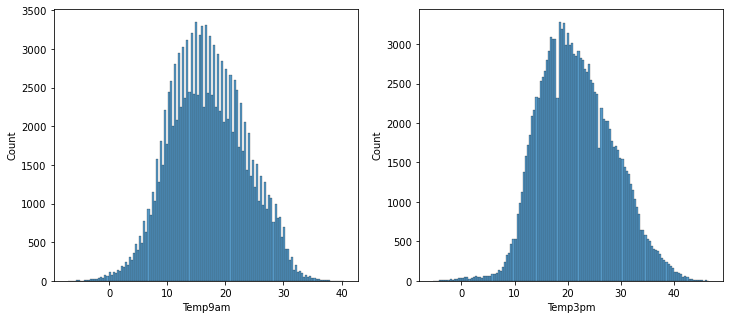

In [86]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['Temp9am'],binwidth=fdchoice("MinTemp"))

plt.subplot(1,2,2)
sns.histplot(df['Temp3pm'],binwidth=fdchoice("MaxTemp"))
plt.show()

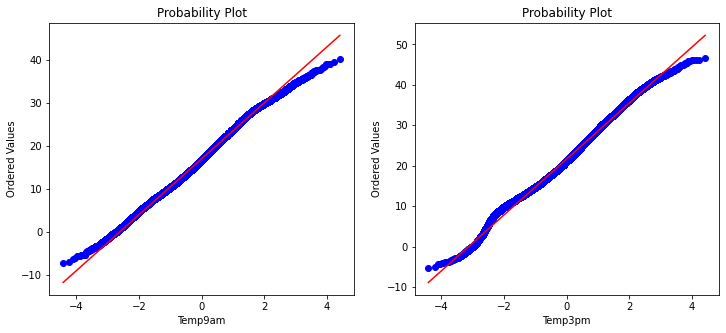

In [87]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
st.probplot(df["Temp9am"].dropna(),dist='norm',plot=plt)
plt.xlabel("Temp9am")

plt.subplot(1,2,2)
st.probplot(df["Temp3pm"].dropna(),dist='norm',plot=plt)
plt.xlabel("Temp3pm")
plt.show()

By looking at the histogram and QQ plot we can say that both the features follows a normal distribution.

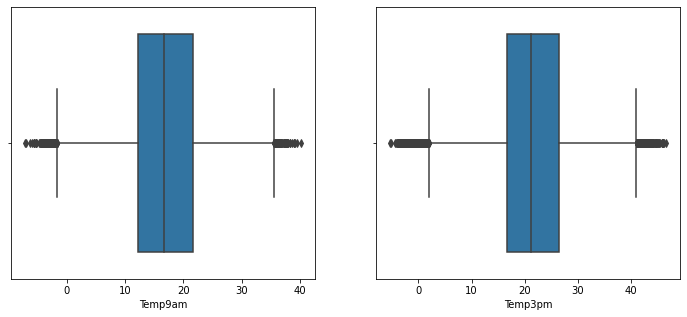

In [88]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.boxplot(df['Temp9am'])

plt.subplot(1,2,2)
sns.boxplot(df['Temp3pm'])
plt.show()

Now, let us look at the distribution of these two features at each month and at each location.

DISTRIBUTION AT EACH MONTH

Month: 1


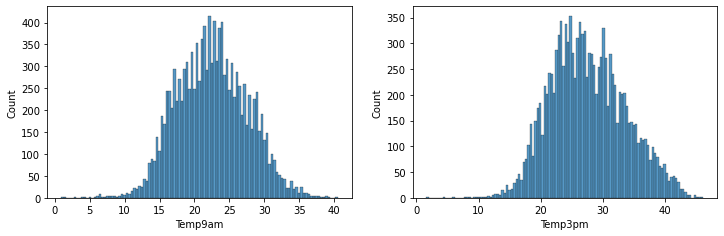

Month: 2


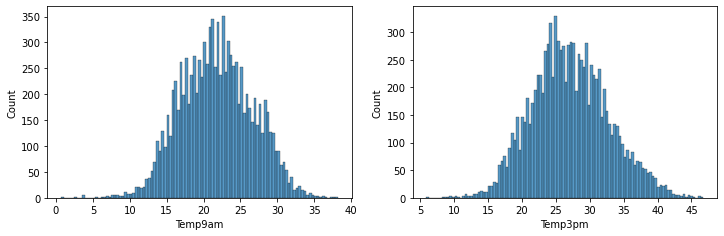

Month: 3


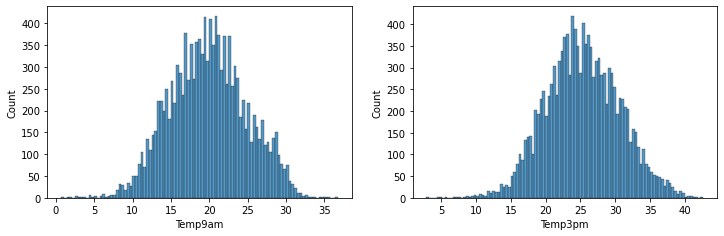

Month: 4


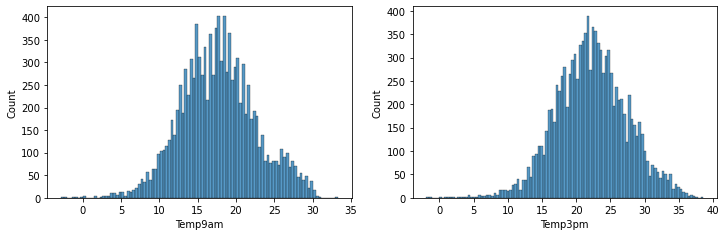

Month: 5


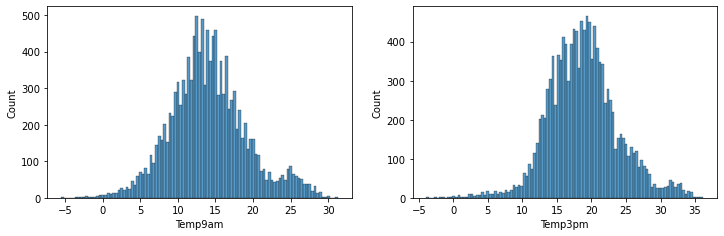

Month: 6


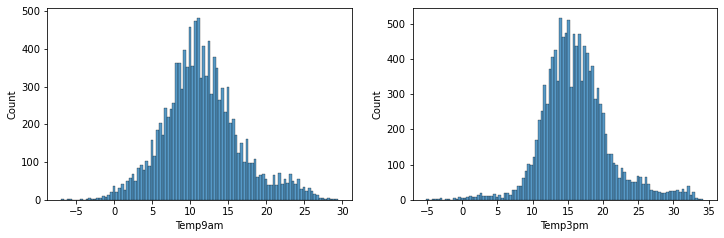

Month: 7


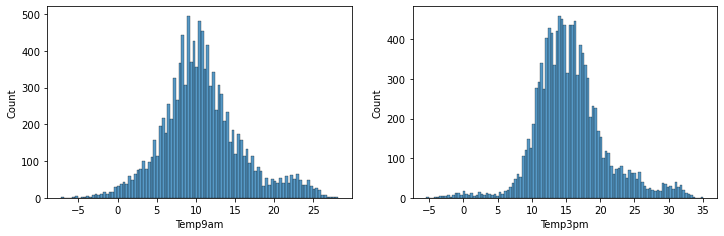

Month: 8


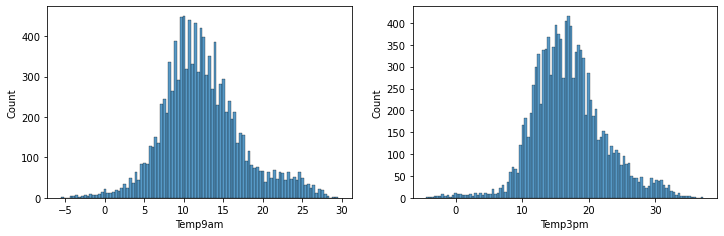

Month: 9


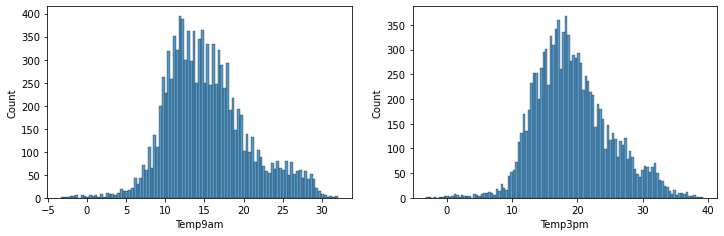

Month: 10


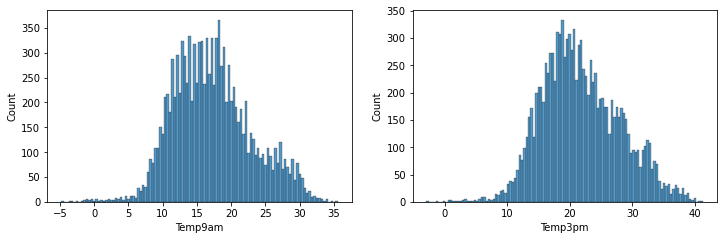

Month: 11


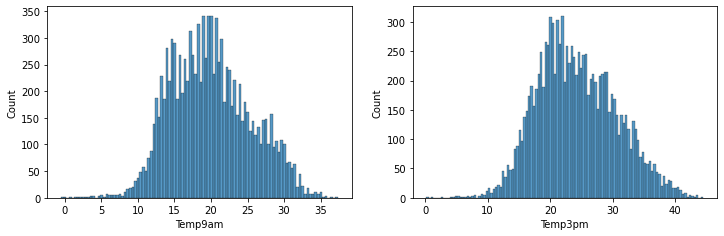

Month: 12


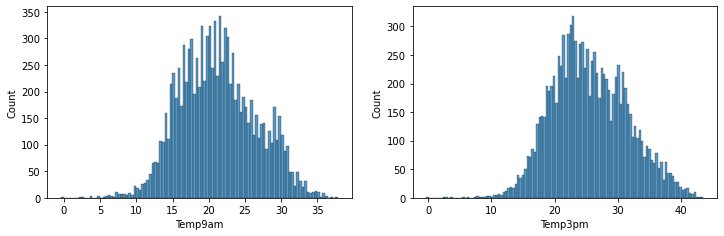

In [89]:
print("DISTRIBUTION AT EACH MONTH\n")
y=0
for i in range(1,13):
    j=i+y
    x = df[df["Month"]==i]
    print("Month: %d"%i)
    plt.figure(figsize=(12,50))
    plt.subplot(12,2,j)
    sns.histplot(x['Temp9am'],binwidth=fdchoice("Temp9am"))
    plt.subplot(12,2,j+1)
    sns.histplot(x['Temp3pm'],binwidth=fdchoice("Temp3pm"))
    y=i
    plt.show()

DISTRIBUTION AT EACH LOCATION

1. Albury


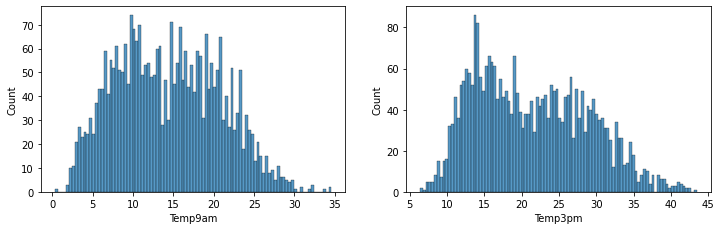

2. BadgerysCreek


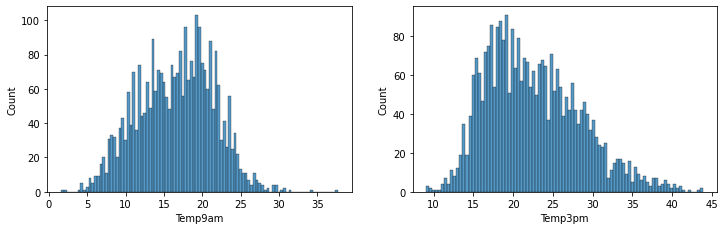

3. Cobar


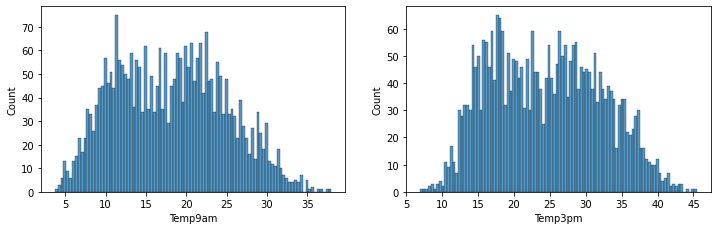

4. CoffsHarbour


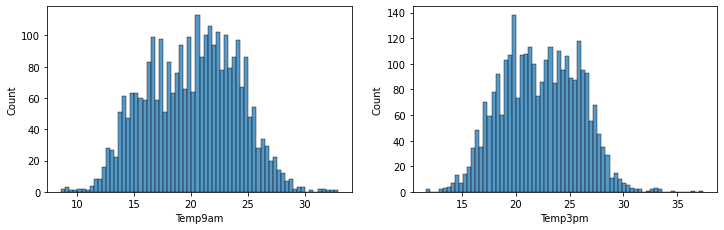

5. Moree


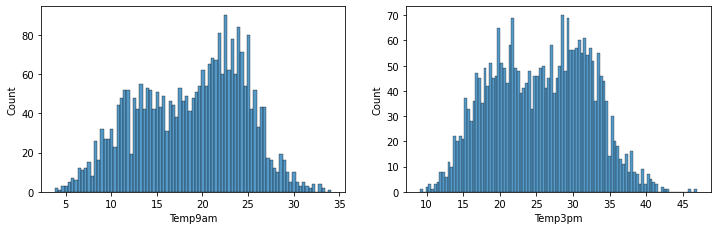

6. Newcastle


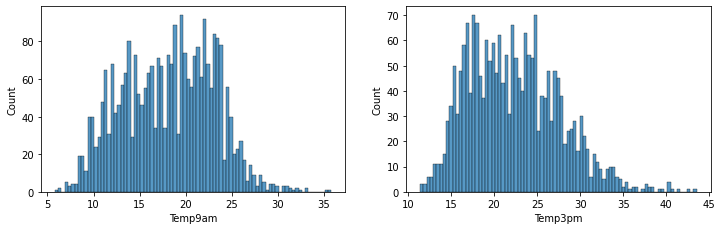

7. NorahHead


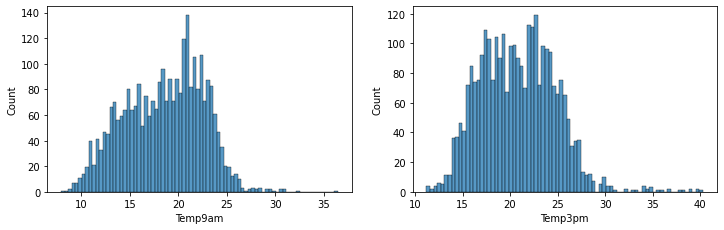

8. NorfolkIsland


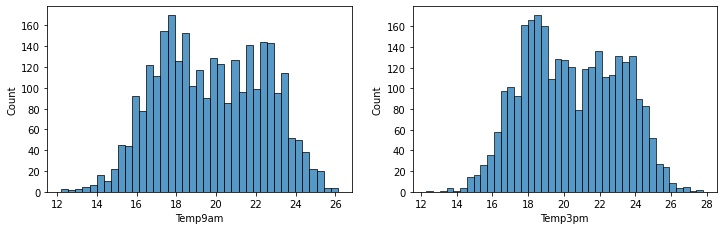

9. Penrith


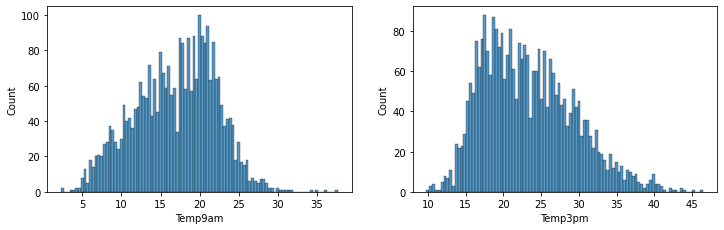

10. Richmond


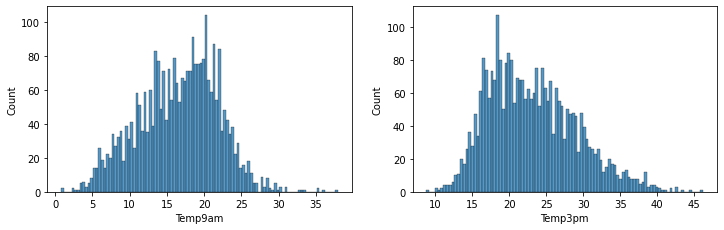

11. Sydney


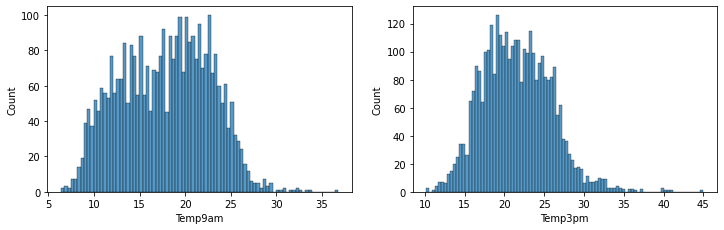

12. SydneyAirport


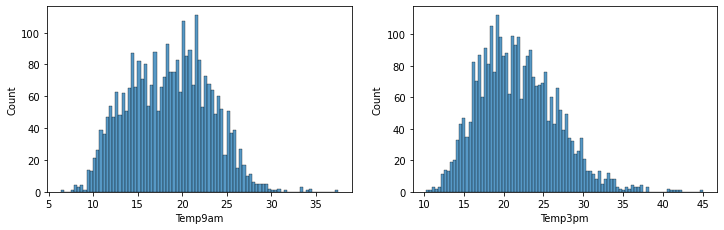

13. WaggaWagga


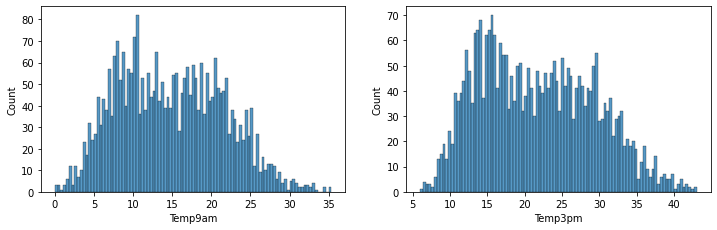

14. Williamtown


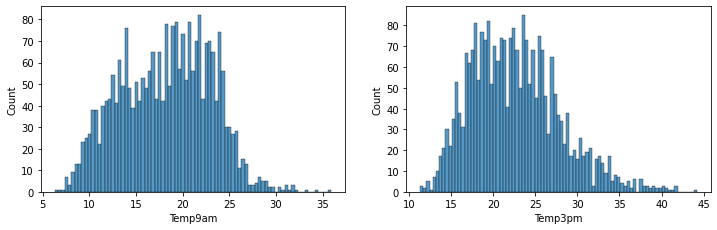

15. Wollongong


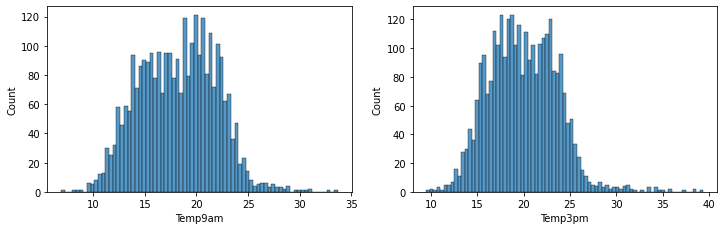

16. Canberra


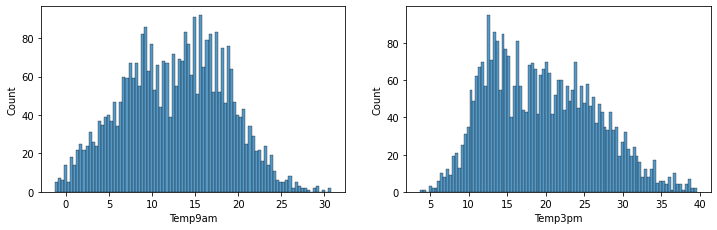

17. Tuggeranong


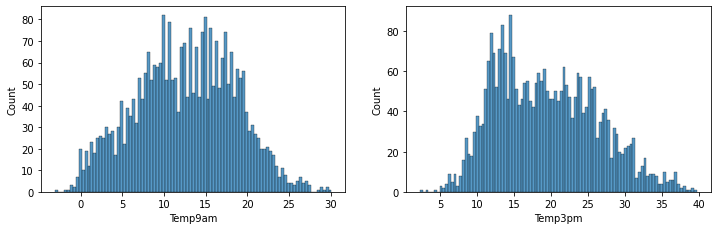

18. MountGinini


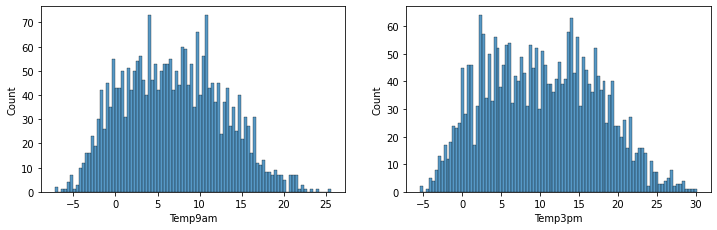

19. Ballarat


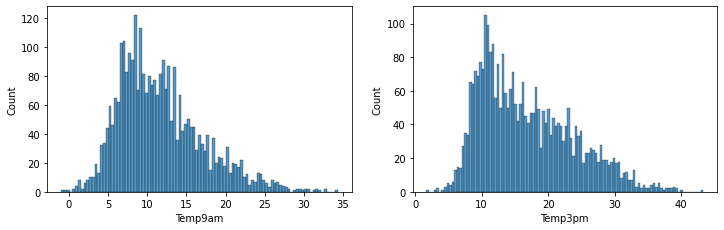

20. Bendigo


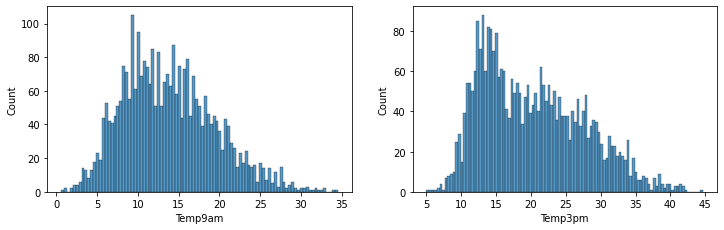

21. Sale


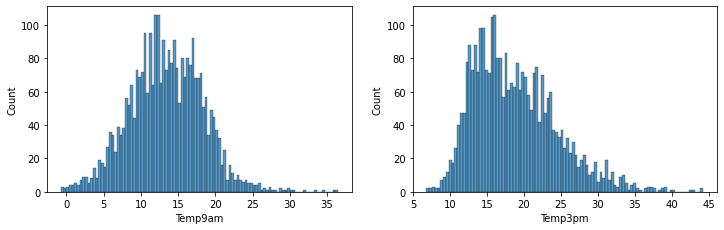

22. MelbourneAirport


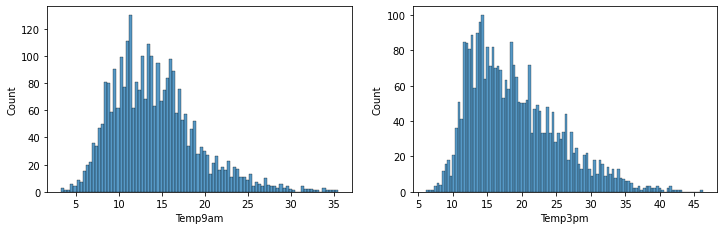

23. Melbourne


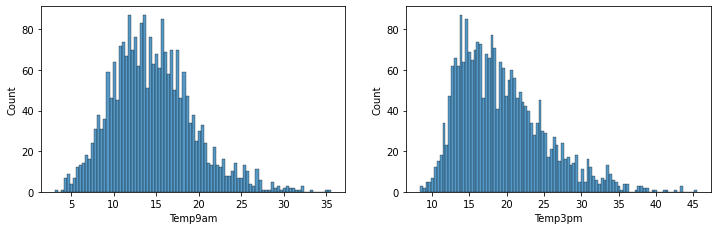

24. Mildura


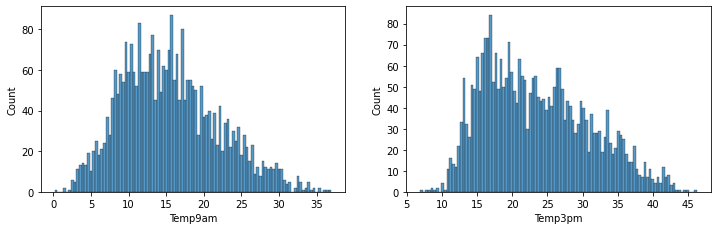

25. Nhil


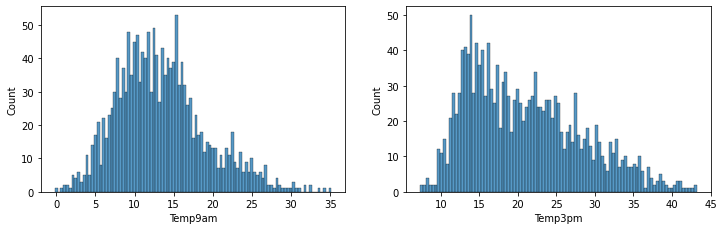

26. Portland


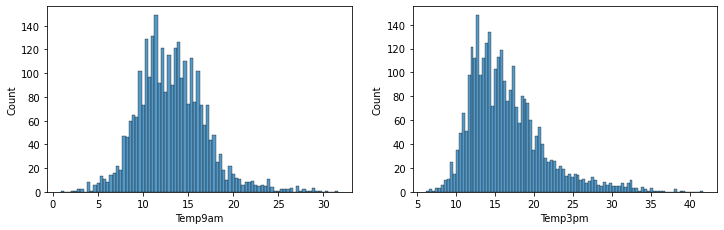

27. Watsonia


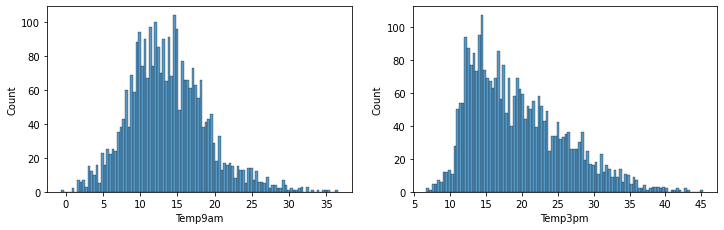

28. Dartmoor


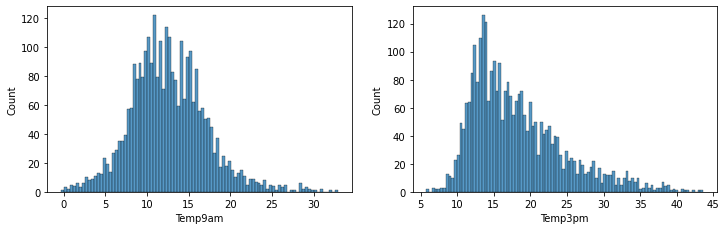

29. Brisbane


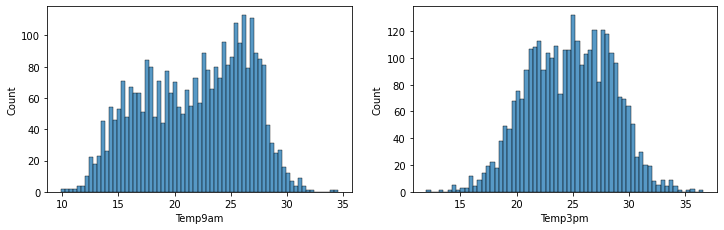

30. Cairns


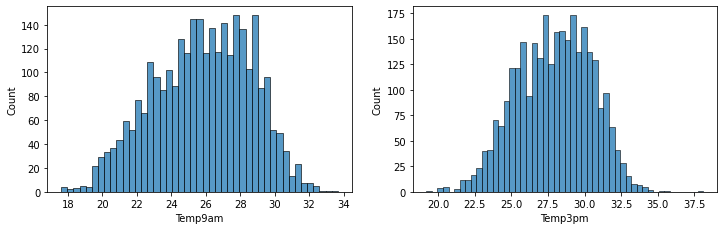

31. GoldCoast


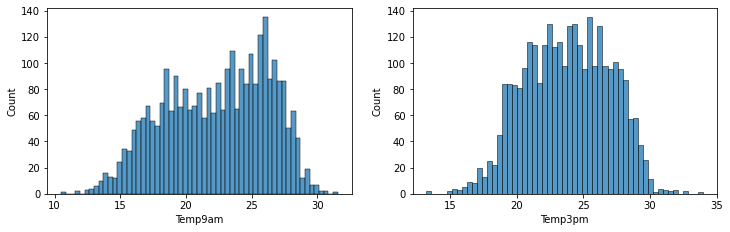

32. Townsville


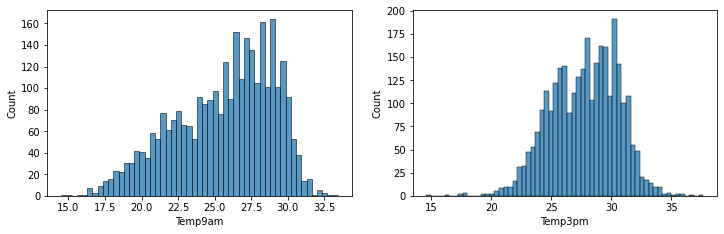

33. Adelaide


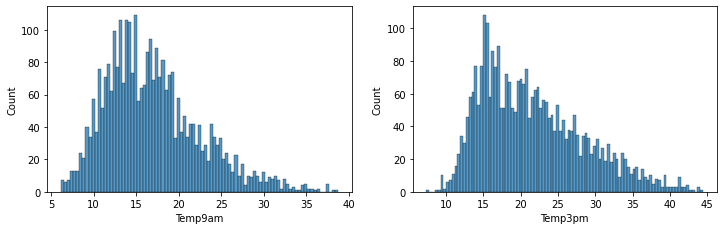

34. MountGambier


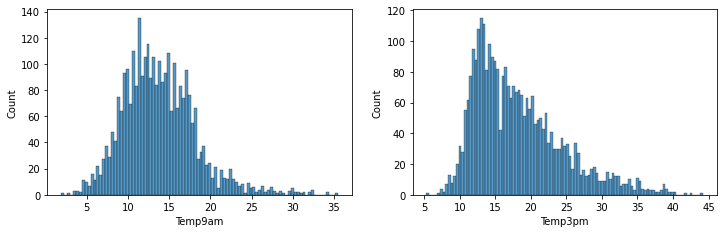

35. Nuriootpa


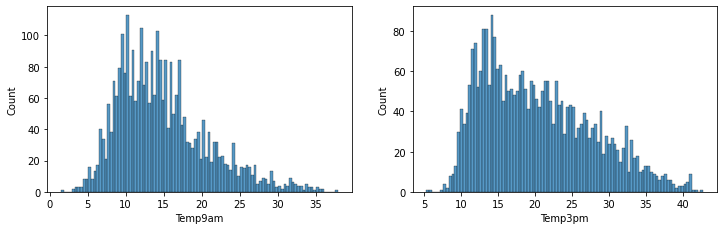

36. Woomera


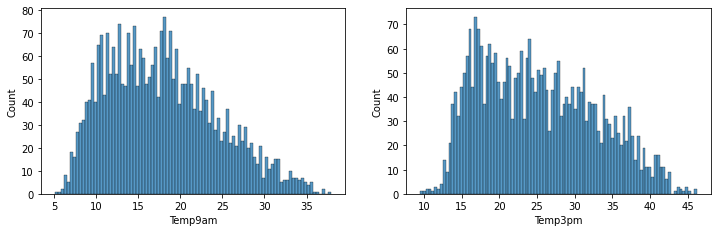

37. Albany


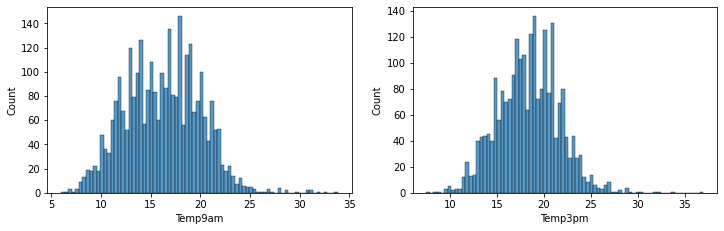

38. Witchcliffe


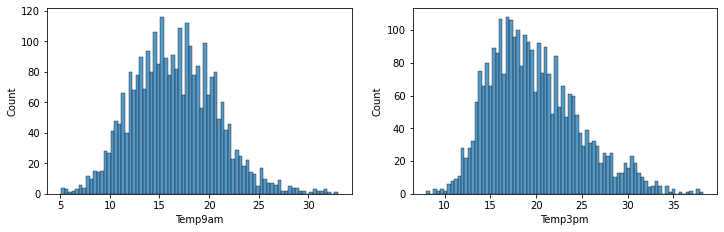

39. PearceRAAF


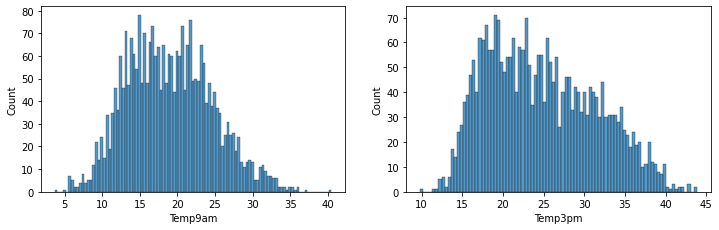

40. PerthAirport


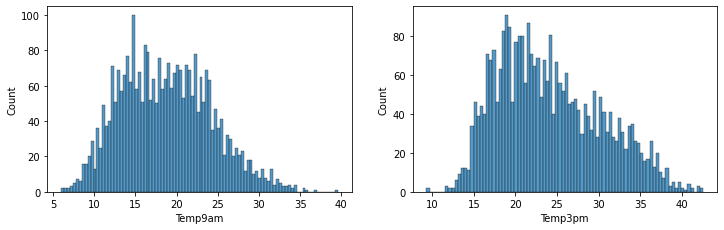

41. Perth


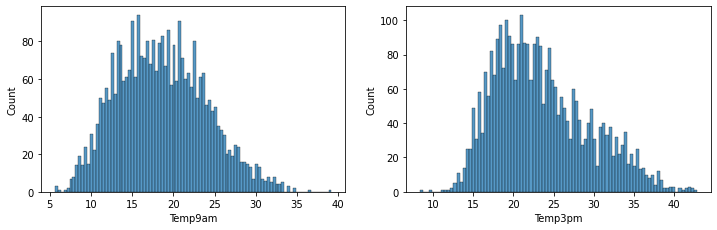

42. SalmonGums


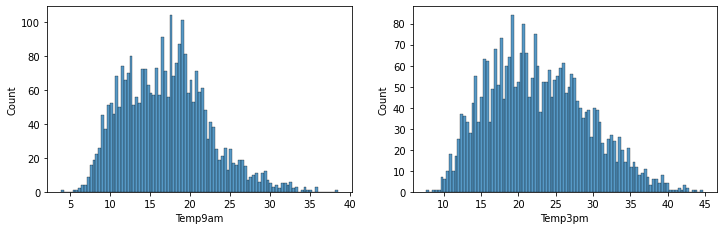

43. Walpole


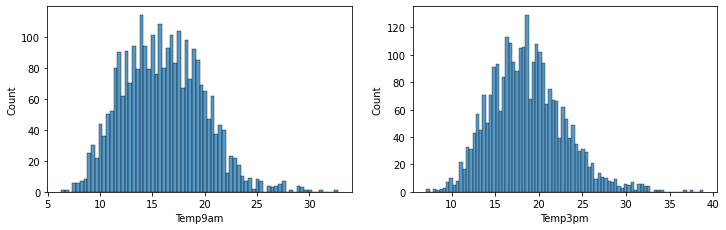

44. Hobart


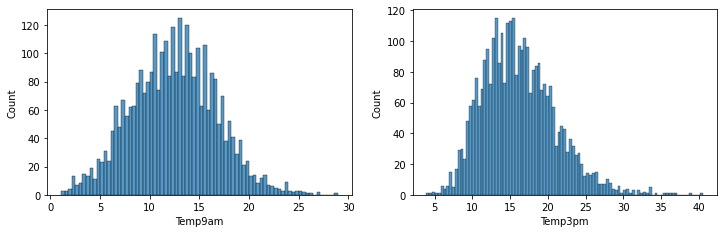

45. Launceston


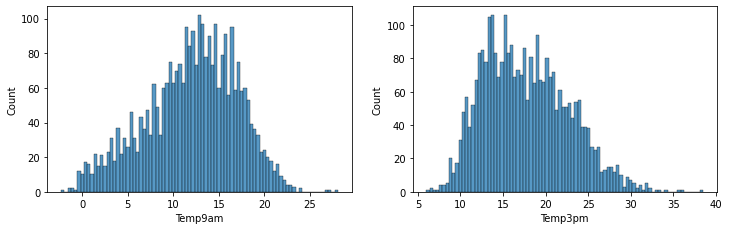

46. AliceSprings


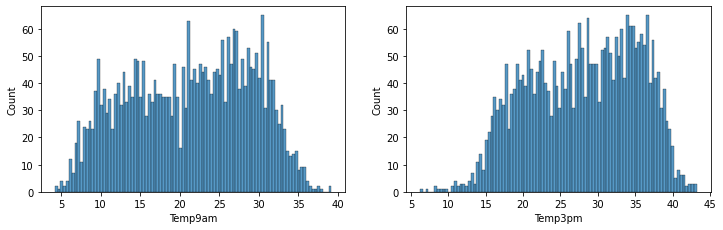

47. Darwin


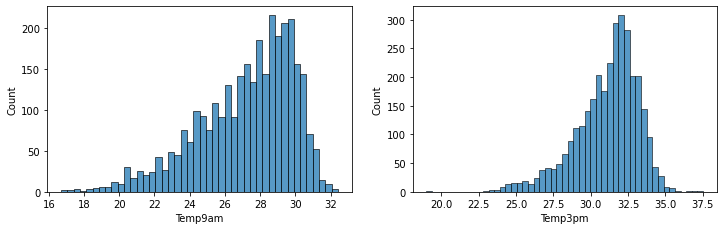

48. Katherine


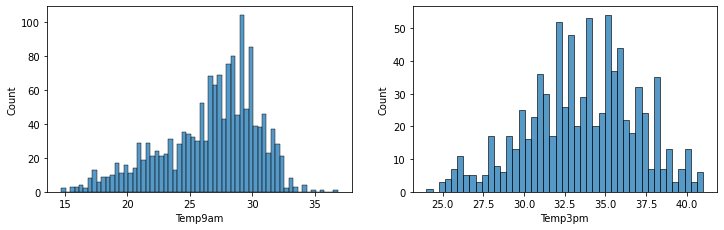

49. Uluru


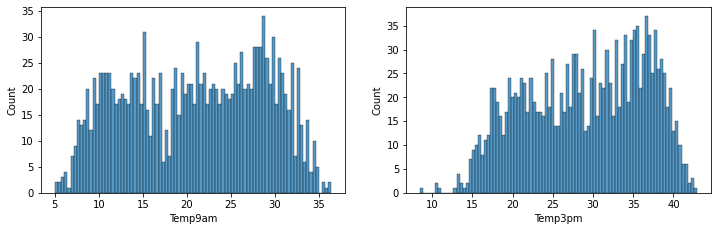

In [90]:
print("DISTRIBUTION AT EACH LOCATION\n")
y=0
z=0
for i in df['Location'].unique():
    y=y+1
    k=y+z
    x=df[df['Location']==i]
    print("%d. %s"%(y,i))
    plt.figure(figsize=(12,200))
    plt.subplot(49,2,k)
    sns.histplot(x['Temp9am'],binwidth=fdchoice("Temp9am"))
    plt.subplot(49,2,k+1)
    sns.histplot(x['Temp3pm'],binwidth=fdchoice("Temp3pm"))
    z=y
    plt.show()

The features show almost similar pattern when plotted against each month but different pattern when plotted against each location.

In [91]:
df.groupby('Month')[['Temp9am','Temp3pm']].describe()

Temp9am                                                       Temp3pm  \
         count       mean       std  min     25%    50%   75%   max    count   
Month                                                                          
1      12847.0  22.527104  4.998497  0.9  18.900  22.40  26.0  40.2  12671.0   
2      10460.0  21.789254  4.845062  0.7  18.200  21.70  25.2  37.9  10321.0   
3      12900.0  19.881682  4.942457  0.7  16.400  19.85  23.2  36.5  12777.0   
4      11226.0  17.672198  4.887015 -2.8  14.400  17.60  20.8  33.1  11076.0   
5      12976.0  14.097919  5.083107 -5.5  10.900  13.80  16.9  31.1  12821.0   
6      12303.0  11.567195  5.080239 -7.0   8.400  11.20  14.4  29.1  12154.0   
7      11712.0  10.838687  5.095975 -7.2   7.775  10.40  13.4  28.1  11624.0   
8      11704.0  12.385347  5.062363 -5.5   9.200  11.90  15.1  29.2  11529.0   
9      11287.0  15.361451  5.219992 -3.3  11.700  14.70  18.2  32.0  11116.0   
10     11743.0  17.251324  5.662825 -4.8  13.100  16.80  20.6  35.5  11561.0   
11     11403.0  19.952539  5.469001 -0.5  15.800  19.60  23.6  37.3  11228.0   
12     10728.0  21.190585  5.244721 -0.4  17.300  20.90  24.6  37.6  10589.0   

                                                         
            mean       std  min   25%   50%   75%   max  
Month                                                    
1      27.654384  6.007973  1.6  23.2  27.2  31.7  46.1  
2      27.129455  5.664963  5.9  23.2  26.8  30.9  46.7  
3      25.339822  5.253400  2.9  21.7  25.2  29.0  42.3  
4      22.229975  5.189371 -1.9  18.7  22.1  25.6  38.4  
5      18.804493  5.029711 -3.9  15.5  18.6  21.6  36.0  
6      16.194397  4.847194 -5.1  13.2  15.8  18.6  33.9  
7      15.647109  5.114721 -5.4  12.5  15.2  18.0  34.9  
8      16.963310  5.375651 -4.4  13.4  16.6  19.9  37.0  
9      19.211731  5.753071 -3.1  15.2  18.5  22.6  39.0  
10     21.803590  6.235540 -2.9  17.4  21.1  26.0  41.0  
11     24.255709  6.283247  0.2  19.6  23.7  28.7  44.1  
12     25.584342  5.968447 -0.3  21.3  25.1  29.9  43.4

In [92]:
df.groupby('Location')[['Temp9am','Temp3pm']].describe()

Temp9am                                                   \
                   count       mean       std   min     25%   50%     75%   
Location                                                                    
Adelaide          3085.0  16.973193  5.574990   6.2  12.900  16.2  20.000   
Albany            2980.0  16.233154  3.782426   6.0  13.300  16.3  19.000   
Albury            3007.0  14.348620  6.373137   0.3   9.200  14.1  19.300   
AliceSprings      3031.0  21.328868  7.742422   4.2  14.800  21.9  27.800   
BadgerysCreek     2912.0  16.574141  4.918529   1.6  13.000  16.9  20.200   
Ballarat          3016.0  11.664125  5.372105  -1.0   7.700  10.7  14.625   
Bendigo           3032.0  13.844789  5.642254   0.6   9.500  13.3  17.500   
Brisbane          3159.0  21.829186  4.650331   9.9  17.900  22.4  25.800   
Cairns            2988.0  25.799465  2.825263  17.6  23.700  26.0  28.000   
Canberra          3401.0  12.681594  5.939465  -1.3   8.300  13.0  17.200   
Cobar             2982.0  18.084507  6.794406   3.7  12.300  18.1  23.000   
CoffsHarbour      2950.0  20.115356  3.947254   8.6  17.000  20.4  23.200   
Dartmoor          2941.0  12.587963  4.557323  -0.3   9.500  12.3  15.400   
Darwin            3192.0  27.186435  2.727579  16.7  25.500  27.8  29.300   
GoldCoast         2980.0  22.354262  3.952650  10.5  19.100  22.8  25.700   
Hobart            3187.0  12.464073  4.265294   1.1   9.500  12.5  15.400   
Katherine         1521.0  26.640500  3.822109  14.7  24.500  27.5  29.400   
Launceston        3024.0  12.027348  4.999791  -2.3   8.900  12.5  15.700   
Melbourne         2433.0  14.636046  4.805460   3.1  11.300  14.2  17.400   
MelbourneAirport  3009.0  14.124925  4.918962   3.3  10.500  13.5  16.800   
Mildura           3006.0  15.530872  6.429657   0.2  10.600  15.0  19.600   
Moree             2854.0  18.804415  5.838133   3.8  14.025  19.7  23.400   
MountGambier      3029.0  13.787356  4.442467   1.9  10.700  13.4  16.400   
MountGinini       2545.0   6.890845  5.889148  -7.2   2.300   6.7  11.100   
Newcastle         2780.0  18.102842  4.930651   5.8  14.000  18.4  22.000   
Nhil              1569.0  13.377693  5.666358  -0.2   9.300  12.7  16.400   
NorahHead         2912.0  18.489389  4.039936   7.9  15.200  18.9  21.600   
NorfolkIsland     2959.0  19.745353  2.659510  12.2  17.600  19.7  22.000   
Nuriootpa         2997.0  14.858992  5.943960   1.5  10.300  13.9  17.800   
PearceRAAF        2747.0  18.961631  5.641237   3.7  14.700  18.7  22.900   
Penrith           2945.0  16.949406  5.193592   2.3  13.200  17.5  20.800   
Perth             3193.0  18.573598  5.346640   5.6  14.500  18.3  22.300   
PerthAirport      3009.0  18.773480  5.471223   6.0  14.500  18.5  22.600   
Portland          2948.0  13.192164  3.782492   0.9  10.600  12.9  15.400   
Richmond          2922.0  16.559651  5.320206   0.8  12.900  17.1  20.400   
Sale              2998.0  13.406071  4.882777  -0.7  10.100  13.3  16.800   
SalmonGums        2953.0  17.043346  5.298066   3.9  12.800  17.0  20.400   
Sydney            3333.0  17.819742  4.897177   6.4  13.800  18.2  21.700   
SydneyAirport     3004.0  18.538981  4.555684   6.4  14.900  18.6  21.800   
Townsville        3033.0  25.631289  3.378393  14.5  23.200  26.3  28.300   
Tuggeranong       2978.0  12.582069  5.968154  -3.1   8.300  12.7  17.100   
Uluru             1518.0  20.991107  7.769164   5.0  14.200  21.4  27.900   
WaggaWagga        2976.0  14.871169  6.703857   0.0   9.400  14.5  20.000   
Walpole           2817.0  16.039297  3.836349   6.3  13.200  15.9  18.700   
Watsonia          2986.0  13.760147  5.219631  -0.6  10.200  13.4  16.900   
Williamtown       2549.0  18.210200  4.821081   6.3  14.300  18.6  21.900   
Witchcliffe       2949.0  16.547338  4.224070   5.1  13.500  16.4  19.500   
Wollongong        2961.0  18.208680  3.696277   6.9  15.300  18.4  21.000   
Woomera           2989.0  17.874875  6.491432   5.1  12.600  17.3  22.200   

            

In [93]:
df[['Temp9am','Temp3pm']].corr()

Temp9am   Temp3pm
Temp9am  1.000000  0.860574
Temp3pm  0.860574  1.000000

Strong positive correlation between these two features (0.860574)

These two features being a temprature related feature behaved very similarly to the "MinTemp" and "MaxTemp" features.

### RainToday & RainTommorow

In [94]:
df['RainToday'].value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [95]:
df[df['Rainfall']>1]['RainToday'].value_counts()

Yes    31455
Name: RainToday, dtype: int64

For "Rainfall">1, "RainToday" has only 'Yes' values.

In [96]:
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [97]:
#In percentage
(df["RainTomorrow"].value_counts() / df.shape[0]) *100

No     77.581878
Yes    22.418122
Name: RainTomorrow, dtype: float64

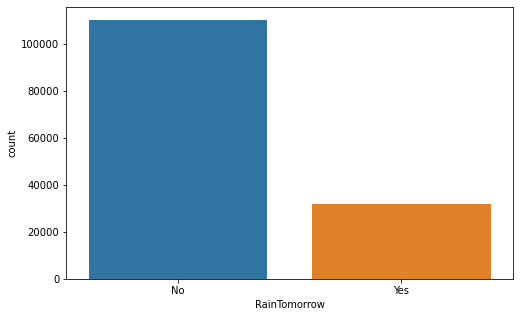

In [98]:
plt.figure(figsize=(8,5))
sns.countplot(df['RainTomorrow'])
plt.show()

As it can be seen that our target variable "RainTommorow" has a larger no. of 'No' entries as compared to 'Yes' entries. This clearly shows how our target variable is very imbalanced.

#### Let's Try to Explore the Data More

In [99]:
df.groupby('Location').mean()[['Evaporation','Sunshine','Cloud9am','Cloud3pm']]

Evaporation  Sunshine  Cloud9am  Cloud3pm
Location                                                   
Adelaide             5.824924  7.752002       NaN       NaN
Albany               4.207273  6.658765  5.190876  4.808703
Albury                    NaN       NaN  6.392356  5.419788
AliceSprings         9.029929  9.581944  2.839200  3.245791
BadgerysCreek             NaN       NaN       NaN       NaN
Ballarat                  NaN       NaN  5.797101  6.286865
Bendigo              3.851730       NaN  4.396618  4.857080
Brisbane             5.408848  8.082782  3.918354  3.879076
Cairns               6.211976  7.575995  4.557974  4.429907
Canberra             4.404717  7.403241  4.873724  4.789279
Cobar                6.720797  8.674364  3.298969  3.851135
CoffsHarbour         3.904267  7.362374  4.321902  4.492799
Dartmoor             3.353097  6.412715       NaN       NaN
Darwin               6.319089  8.499310  4.336572  4.311383
GoldCoast                 NaN       NaN       NaN       NaN
Hobart               3.601226  6.578324  4.840573  4.963879
Katherine            7.333198       NaN  2.555848  3.169611
Launceston           6.166667       NaN  6.305556  5.729620
Melbourne            4.595893  6.465776  5.271069  5.302846
MelbourneAirport     4.644378  6.381283  5.246261  5.263298
Mildura              5.935952  8.468104  3.385221  3.920951
Moree                7.629964  8.896590  3.317166  3.945783
MountGambier         3.437072  6.511167  5.518126  5.474675
MountGinini               NaN       NaN       NaN       NaN
Newcastle                 NaN       NaN  4.125811  4.304535
Nhil                      NaN       NaN       NaN       NaN
NorahHead                 NaN       NaN       NaN       NaN
NorfolkIsland        4.738026  7.021751  4.995866  4.842051
Nuriootpa            5.084132  7.675888  4.674783  4.876620
PearceRAAF                NaN  8.894160  3.813877  3.972911
Penrith                   NaN       NaN       NaN       NaN
Perth                5.606579  8.784536  3.383579  3.469740
PerthAirport         5.662832  8.795306  3.371467  3.444260
Portland             3.421514  6.496751  6.334364  6.068604
Richmond             5.259336       NaN  6.242123  5.505172
Sale                 3.830098  6.683663  5.346314  5.094145
SalmonGums                NaN       NaN       NaN       NaN
Sydney               5.187432  7.179374  4.181523  4.218660
SydneyAirport        5.252450  7.198126  4.276574  4.274875
Townsville           7.197113  8.460627  4.295701  4.014860
Tuggeranong               NaN       NaN       NaN       NaN
Uluru                     NaN       NaN  5.588757  4.825980
WaggaWagga           5.159061  8.197864  3.837486  4.188432
Walpole                   NaN       NaN       NaN       NaN
Watsonia             4.640788  6.378152  5.246082  5.265177
Williamtown          6.957167  7.140044  4.553699  4.393242
Witchcliffe               NaN       NaN       NaN       NaN
Wollongong                NaN       NaN  6.217095  5.862661
Woomera             10.116654  9.063005  2.510468  2.881950

"Evaporation","Sunshine","Cloud9am" and "Cloud3pm" are the features with most no. of its data missing. As we can see here that there are 10 common locations for which the data is missing for all these four features.

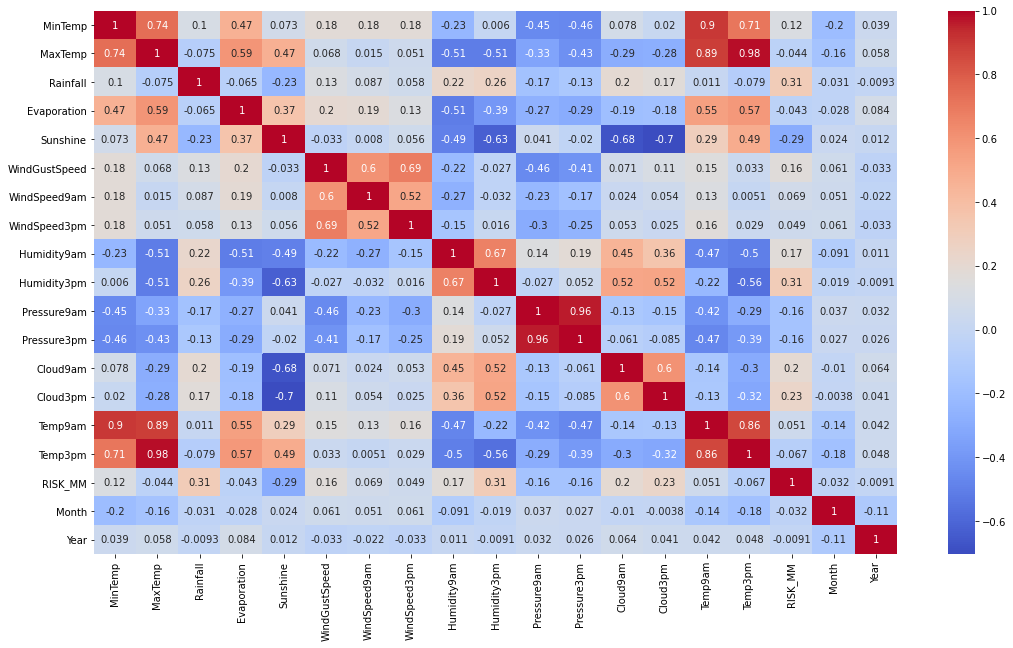

In [100]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

From the correlation heatmap we can see that: 

1) All four temprature features are strongly correlated to each other.

2) The features "Cloud9am" and "Cloud3pm" are negatively correlated with the feature "Sunshine" (-0.68 and -0.7 respectively)